# Toy examples
## 3 examples:
- moving obstacle in the space without changing shape
- static obstacle in the space but increasing dimension
- moving obstacle in the space increasing dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
from skimage.morphology import binary_erosion, convex_hull_image, convex_hull_object
from matplotlib.colors import ListedColormap
from matplotlib.colors import to_rgba
import math
import time
import random
from matplotlib import cm
from collections import deque

from geopy.distance import lonlat, distance

from Astar_netcdf import AStarPlanner
from rrtstar_netcdf import RRTStar
from rrt_netcdf import RRT
show_animation = False


In [1625]:
sx = 10
sy = 10
gx = 90
gy = 70

res = 1
x_min, y_min = 0, 0
x_max, y_max = 100,80

### Scenario 1

In [1626]:
pi = math.pi
r = 10
n = 60
x_obs = [[] for i in range(5)]
y_obs = [[] for i in range(5)]
for k in range(5):
    x_obs[k] = [math.cos(2*pi/n*i)*r + 50 for i in range(n)]
    y_obs[k] = [math.sin(2*pi/n*i)*r + 20+(10*k) for i in range(n)]

x_obsgrande = [[] for i in range(5)]
y_obsgrande = [[] for i in range(5)]
for k in range(5):
    x_obsgrande[k] = 50
    y_obsgrande[k] = 20+(10*k)

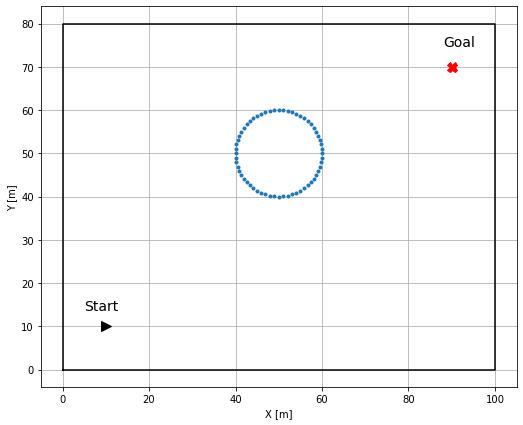

In [1513]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# plt.plot(x_obs, y_obs, '.', label='Obstacles |d| <= 8 [m]')
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+4,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
i =3
plt.plot(x_obs[i], y_obs[i], '.')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
plt.grid()
ax.set_aspect('equal', adjustable='box')
#fig.savefig('Obstacles_8_m.jpg', dpi=300)
plt.show()

In [894]:
# hour = 0
# hours = np.arange(0, 5)
# for i in hours:
#     fig, ax = plt.subplots(1, 1, figsize=(10, 7))
#     plt.plot(sx, sy, ">k", markersize=10)
#     plt.plot(gx, gy, "Xr", markersize=10)
#     plt.text(sx+3, sy+3,'Start',fontsize=14,
#                         ha='right',va='bottom',color='k')
#     plt.text(gx-2, gy+4,'Goal',fontsize=14,
#                         ha='left',va='bottom',color='k')
#     plt.plot(x_obs[i], y_obs[i], '.', color="dodgerblue")
#     plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# #     ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
# #     ax.add_patch(plt.Circle(xy=(50, 40), radius=10+5*i, color='aqua', alpha=0.3))
#     ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10+3*i, color='aqua', alpha=0.3))
#     ax.set_xlabel('X [km]')
#     ax.set_ylabel('Y [km]')
#     plt.grid()
#     ax.set_aspect('equal', adjustable='box')
#     plt.title('Scenario 3') 
#     plt.savefig(r'.\Images' + '\\scenario3_' + str(hour) + '.png', dpi=300)
#     hour = i+1
#     plt.clf()
# plt.show()

### Scenario 2

In [5]:
pi = math.pi
r=10
n = 60
x_obs = [[] for i in range(5)]
for k in range(5):
    x_obs[k] = [math.cos(2*pi/(n+30*k)*i)*(r+5*k) + 50 for i in range(n+30*k)]
    y_obs[k] = [math.sin(2*pi/(n+30*k)*i)*(r+5*k) + 40 for i in range(n+30*k)]

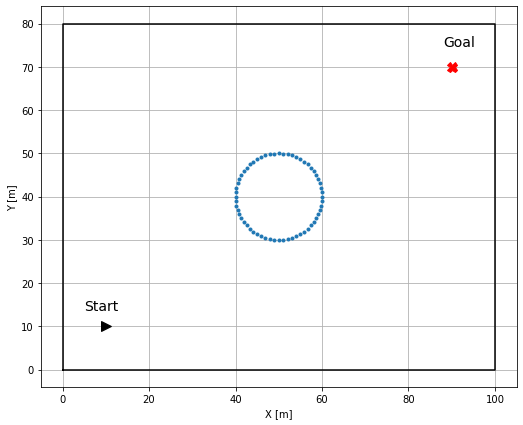

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# plt.plot(x_obs, y_obs, '.', label='Obstacles |d| <= 8 [m]')
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+4,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
# for i in range(len(x_obs)):
i = 0
plt.plot(x_obs[i], y_obs[i], '.')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
plt.grid()
ax.set_aspect('equal', adjustable='box')
#fig.savefig('Obstacles_8_m.jpg', dpi=300)
plt.show()

### Scenario 3

In [7]:
pi = math.pi
r=10
n = 60
x_obs = [[] for i in range(5)]
for k in range(5):
    x_obs[k] = [math.cos(2*pi/(n+20*k)*i)*(r+3*k) + 80-(k*10) for i in range(n+30*k)]
    y_obs[k] = [math.sin(2*pi/(n+20*k)*i)*(r+3*k) + 15+(k*10) for i in range(n+30*k)]
    
x_obsgrande = [[] for i in range(5)]
y_obsgrande = [[] for i in range(5)]
for k in range(5):
    x_obsgrande[k] = 80-(k*10)
    y_obsgrande[k] = 15+(k*10)

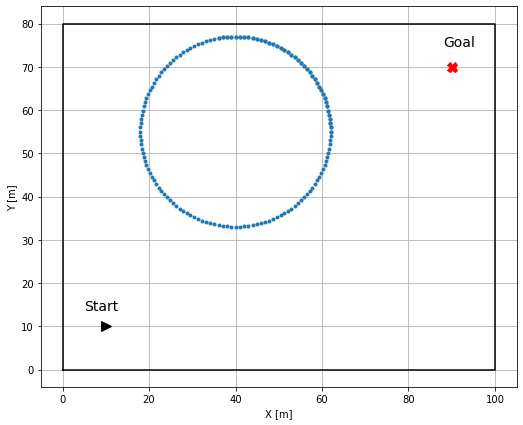

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# plt.plot(x_obs, y_obs, '.', label='Obstacles |d| <= 8 [m]')
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+4,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
# for i in range(len(x_obs)):
#     ax.add_patch(plt.Circle(xy=(x_obs[i], y_obs[i]), radius=1,
#                             color='b', alpha=0.3))
# for i in range(len(x_obs)):
i = 4
plt.plot(x_obs[i], y_obs[i], '.')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
plt.grid()
ax.set_aspect('equal', adjustable='box')
#fig.savefig('Obstacles_8_m.jpg', dpi=300)
plt.show()

## A*

In [490]:
show_animation = False


class AStarPlanner:

    def __init__(self, ox, oy, resolution, rr, xm, ym, xM, yM):
        """
        Initialize grid map for a star planning

        ox: x position list of Obstacles [m]
        oy: y position list of Obstacles [m]
        resolution: grid resolution [m]
        rr: robot radius[m]
        """

        self.resolution = resolution
        self.rr = rr
        self.min_x, self.min_y = xm, ym
        self.max_x, self.max_y = xM, yM
        self.obstacle_map = None
        self.x_width, self.y_width = 0, 0
        self.motion = self.get_motion_model()
        self.calc_obstacle_map(ox, oy)

    class Node:
        def __init__(self, x, y, cost, parent_index):
            self.x = x  # index of grid
            self.y = y  # index of grid
            self.cost = cost
            self.parent_index = parent_index

        def __str__(self):
            return str(self.x) + "," + str(self.y) + "," + str(self.cost) + "," + str(self.parent_index)

    def planning(self, sx, sy, gx, gy):
        """
        A star path search

        input:
            s_x: start x position [m]
            s_y: start y position [m]
            gx: goal x position [m]
            gy: goal y position [m]

        output:
            rx: x position list of the final path
            ry: y position list of the final path
        """
        # k = 1
        start_node = self.Node(self.calc_xy_index(sx, self.min_x), self.calc_xy_index(sy, self.min_y), 0.0, -1)
        goal_node = self.Node(self.calc_xy_index(gx, self.min_x), self.calc_xy_index(gy, self.min_y), 0.0, -1)
        open_set, closed_set = dict(), dict()
        open_set[self.calc_grid_index(start_node)] = start_node
        while 1:
            if len(open_set) == 0:
                print("Open set is empty..")
                break
            # find the index with smallest (cost+distance from goal)
            c_id = min(open_set, key=lambda o: open_set[o].cost + self.calc_heuristic(goal_node, open_set[o]))
            current = open_set[c_id]  # take that point as current point

            # show graph
            if show_animation:  # pragma: no cover
                plt.plot(self.calc_grid_position(current.x, self.min_x),
                         self.calc_grid_position(current.y, self.min_y), "xc")  # x color cyan
                # for stopping simulation with the esc key.
                plt.gcf().canvas.mpl_connect('key_release_event',
                                             lambda event: [exit(
                                                 0) if event.key == 'escape' else None])
                if len(closed_set.keys()) % 10 == 0:
                    plt.pause(0.001)

            if current.x == goal_node.x and current.y == goal_node.y:
                print("Find goal")
                goal_node.parent_index = current.parent_index
                goal_node.cost = current.cost
                break

            # Remove the item from the open set
            del open_set[c_id]

            # Add it to the closed set
            closed_set[c_id] = current

            # expand_grid search grid based on motion model
            for i, _ in enumerate(self.motion):
                node = self.Node(current.x + self.motion[i][0],
                                 current.y + self.motion[i][1],
                                 current.cost + self.motion[i][2], c_id)
                n_id = self.calc_grid_index(node)

                # If the node is not safe, do nothing
                if not self.verify_node(node):
                    continue

                if n_id in closed_set:
                    continue

                if n_id not in open_set:
                    open_set[n_id] = node  # discovered a new node
                else:
                    if open_set[n_id].cost > node.cost:
                        # This path is the best until now. record it
                        open_set[n_id] = node

        rx, ry = self.calc_final_path(goal_node, closed_set)

        return rx, ry

    def calc_final_path(self, goal_node, closed_set):
        # generate final course
        rx, ry = [self.calc_grid_position(goal_node.x, self.min_x)], [
            self.calc_grid_position(goal_node.y, self.min_y)]
        parent_index = goal_node.parent_index
        while parent_index != -1:
            n = closed_set[parent_index]
            rx.append(self.calc_grid_position(n.x, self.min_x))
            ry.append(self.calc_grid_position(n.y, self.min_y))
            parent_index = n.parent_index

        return rx, ry

    @staticmethod
    def calc_heuristic(n1, n2):
        w = 1.0  # weight of heuristic
        d = w * math.hypot(n1.x - n2.x, n1.y - n2.y)
        return d

    def calc_grid_position(self, index, min_position):
        """
        calc grid position

        :param index:
        :param min_position:
        :return:
        """
        pos = index * self.resolution + min_position
        return pos

    def calc_xy_index(self, position, min_pos):
        return round((position - min_pos) / self.resolution)

    def calc_grid_index(self, node):
        return (node.y - self.min_y) * self.x_width + (node.x - self.min_x)

    def verify_node(self, node):
        px = self.calc_grid_position(node.x, self.min_x)
        py = self.calc_grid_position(node.y, self.min_y)

        if px < self.min_x:
            return False
        elif py < self.min_y:
            return False
        elif px >= self.max_x:
            return False
        elif py >= self.max_y:
            return False

        # collision check
        if self.obstacle_map[node.y][node.x]:  #
            return False

        return True

    def calc_obstacle_map(self, ox, oy):
        print("min_x: {}".format(self.min_x))
        print("min_y: {}".format(self.min_y))
        print("max_x: {}".format(self.max_x))
        print("max_y: {}".format(self.max_y))
        self.x_width = round((self.max_x - self.min_x) / self.resolution)
        self.y_width = round((self.max_y - self.min_y) / self.resolution)
#         self.x_width = 62
#         self.y_width = 47
        print("x_width:", self.x_width)
        print("y_width:", self.y_width)

        # obstacle map generation
        self.obstacle_map = [[False for _ in range(self.x_width)]
                             for _ in range(self.y_width)]
        
        for ix in range(self.x_width):
            x = self.calc_grid_position(ix, self.min_x)
            for iy in range(self.y_width):
                y = self.calc_grid_position(iy, self.min_y)
                # for q, _ in enumerate(ox):
                #    d = math.hypot(ox[q] - x, oy[q] - y)
                for iox, ioy in zip(ox, oy):
                    d = math.hypot(iox - x, ioy - y)
                    if d <= self.rr:
                        self.obstacle_map[iy][ix] = True
                        break

    @staticmethod
    def get_motion_model():
        # dx, dy, cost
        motion = [[1, 0, 1],
                  [0, 1, 1],
                  [-1, 0, 1],
                  [0, -1, 1],
                  [-1, -1, math.sqrt(2)],
                  [-1, 1, math.sqrt(2)],
                  [1, -1, math.sqrt(2)],
                  [1, 1, math.sqrt(2)]]

        return motion

In [10]:
grid_size = 1
robot_radius = 1

min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Computational time is 1.584540605545044
Travel time =  6.2808 hours


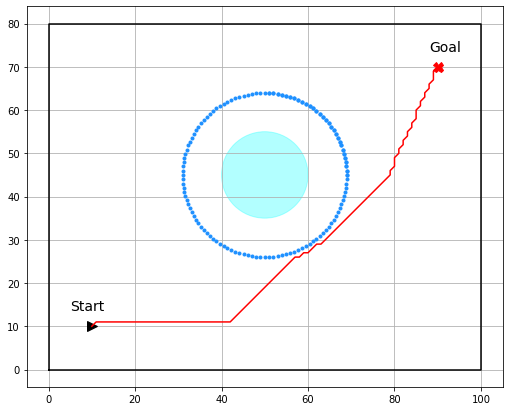

In [11]:
i = 3
start_time = time.time()
a_star = AStarPlanner(x_obs[i], y_obs[i], grid_size, robot_radius, x_min, y_min, x_max, y_max)
rx, ry = a_star.planning(sx, sy, gx, gy)
print("Computational time is {}".format(time.time() - start_time))
rx = list(reversed(rx))
ry = list(reversed(ry))

path_dist = 0
for r in range(len(rx)-1):
    path_dist += np.hypot(rx[r+1] - rx[r], ry[r+1] - ry[r])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
#     ax.add_patch(plt.Circle(xy=(50, 40), radius=10+5*i, color='aqua', alpha=0.3))
# ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10+3*i, color='aqua', alpha=0.3))
plt.plot(x_obs[i], y_obs[i], '.', color="dodgerblue")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

### RRT*

In [12]:
# rrt
rrt_obsx = 50
rrt_obsy = 50
obstacle_list = [[] for i in range(5)]
for i in range(5): # just not to modify the algorithm of RRT*
    obstacle_list[i].append([rrt_obsx, rrt_obsy*(i+1), 10])

In [668]:
class RRT:
    """
    Class for RRT planning
    """

    class Node:
        """
        RRT Node
        """

        def __init__(self, x, y):
            self.x = x
            self.y = y
            self.path_x = []
            self.path_y = []
            self.parent = None

    class AreaBounds:

        def __init__(self, area):
            self.xmin = float(area[0])
            self.xmax = float(area[1])
            self.ymin = float(area[2])
            self.ymax = float(area[3])

    def __init__(self,
                 start,
                 goal,
                 obstacle_list,
                 rand_area,
                 play_area,
                 k,
                 expand_dis,
                 speed,
                 path_resolution,  # changing path resolution reduces a lot the computation time
                 goal_sample_rate,
                 max_iter=1000,
#                  play_area=None
                 ):
        """
        Setting Parameter
        start:Start Position [x,y]
        goal:Goal Position [x,y]
        obstacleList:obstacle Positions [[x,y,size],...]
        randArea:Random Sampling Area [min,max]
        play_area:stay inside this area [xmin,xmax,ymin,ymax]
        """
        self.start = self.Node(start[0], start[1])
        self.end = self.Node(goal[0], goal[1])
        self.min_x_rand = rand_area[0]
        self.max_x_rand = rand_area[1]
        self.min_y_rand = rand_area[2]
        self.max_y_rand = rand_area[3]
        if play_area is not None:
            self.play_area = self.AreaBounds(play_area)
        else:
            self.play_area = None
        self.expand_dis = expand_dis
        self.path_resolution = path_resolution
        self.goal_sample_rate = goal_sample_rate
        self.max_iter = max_iter
        self.obstacle_list = obstacle_list
        self.node_list = []
        self.speed = speed
        self.k = k

    def planning(self, animation=True):
        """
        rrt path planning
        animation: flag for animation on or off
        """
        v = 0
        k = 1
        dist_tot = 0
        self.node_list = [self.start]
        for i in range(self.max_iter):
            rnd_node = self.get_random_node()
            nearest_ind = self.get_nearest_node_index(self.node_list, rnd_node)
            nearest_node = self.node_list[nearest_ind]

            new_node = self.steer(nearest_node, rnd_node, self.expand_dis)

            if self.check_if_outside_play_area(new_node, self.play_area) and \
               self.check_collision(new_node, self.obstacle_list[self.k-1]):
                self.node_list.append(new_node)

            if animation and i % 5 == 0:
                v = self.draw_graph(self.obstacle_list[self.k-1], rnd_node, v)

            dist_tot += self.calc_cost()
            if dist_tot/self.speed >= 3600*k:
                k += 1
                if k > 4:
                    k = 4
            if self.calc_dist_to_goal(self.node_list[-1].x, self.node_list[-1].y) <= self.expand_dis:
                final_node = self.steer(self.node_list[-1], self.end,
                                        self.expand_dis)
                if self.check_collision(final_node, self.obstacle_list[k-1]):
                    return self.generate_final_course(len(self.node_list) - 1), dist_tot

            if animation and i % 5:
                v = self.draw_graph(self.obstacle_list[self.k-1], rnd_node, v)

        return None  # cannot find path

    def steer(self, from_node, to_node, extend_length=float("inf")):

        new_node = self.Node(from_node.x, from_node.y)
        d, theta = self.calc_distance_and_angle(new_node, to_node)

        new_node.path_x = [new_node.x]
        new_node.path_y = [new_node.y]

        if extend_length > d:
            extend_length = d

        n_expand = math.floor(extend_length / self.path_resolution)

        for _ in range(n_expand):
            new_node.x += self.path_resolution * math.cos(theta)
            new_node.y += self.path_resolution * math.sin(theta)
            new_node.path_x.append(new_node.x)
            new_node.path_y.append(new_node.y)

        d, _ = self.calc_distance_and_angle(new_node, to_node)
        if d <= self.path_resolution:
            new_node.path_x.append(to_node.x)
            new_node.path_y.append(to_node.y)
            new_node.x = to_node.x
            new_node.y = to_node.y

        new_node.parent = from_node

        return new_node

    def generate_final_course(self, goal_ind):
        path = [[self.end.x, self.end.y]]
        node = self.node_list[goal_ind]
        while node.parent is not None:
            path.append([node.x, node.y])
            node = node.parent
        path.append([node.x, node.y])

        return path

    def calc_dist_to_goal(self, x, y):
        dx = x - self.end.x
        dy = y - self.end.y
        return math.hypot(dx, dy)

#     def calc_cost(self):
#         a1 = mp(self.node_list[-1].x, self.node_list[-1].y, inverse=True)
#         b1 = mp(self.node_list[-2].x, self.node_list[-2].y, inverse=True)

#         return distance(lonlat(*a1), lonlat(*b1)).m

#     def calc_temp_dist_from_start(self, x, y):
#         dx = x - self.start.x
#         dy = y - self.start.y
#         # the distance is in meter. So distance/speed = time [seconds]
#         return math.hypot(dx, dy) / self.speed

    def get_random_node(self):
        if random.randint(0, 100) > self.goal_sample_rate:
            rnd = self.Node(
                random.uniform(self.min_x_rand, self.max_x_rand),
                random.uniform(self.min_y_rand, self.max_x_rand))
        else:  # goal point sampling
            rnd = self.Node(self.end.x, self.end.y)
        return rnd

    def draw_graph(self, obstacleList, v, rnd=None):
        v += 1
        plt.clf()
        # for stopping simulation with the esc key.
        plt.gcf().canvas.mpl_connect(
            'key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
        """mp.fillcontinents(lake_color='aqua')
        mp.drawcoastlines()
        mp.drawstates()
        mp.drawcountries()"""
        if rnd is not None:
            plt.plot(rnd.x, rnd.y, "^k")
        for node in self.node_list:
            if node.parent:
                plt.plot(node.path_x, node.path_y, "-g")

        for i in range(len(obstacleList)):
            plt.plot(obstacleList[i][0], obstacleList[i][1], ".", color='dodgerblue')

        if self.play_area is not None:
            plt.plot([self.play_area.xmin, self.play_area.xmax,
                      self.play_area.xmax, self.play_area.xmin,
                      self.play_area.xmin],
                     [self.play_area.ymin, self.play_area.ymin,
                      self.play_area.ymax, self.play_area.ymax,
                      self.play_area.ymin],
                     "-k")
        plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
        plt.plot(self.start.x, self.start.y, ">k", markersize=10)
        plt.plot(self.end.x, self.end.y, "Xr", markersize=10)
        plt.pause(0.01)
        plt.savefig(r'C:\Users\giorg\Desktop\Trento\Meccatronica\TESI\Progress\Github repositories\GiorgioCoding\Images'
                    + '\\prova' + str(v)+'.jpg')
        return v
    @staticmethod
    def plot_circle(x, y, size, color="-b"):  # pragma: no cover
        deg = list(range(0, 360, 5))
        deg.append(0)
        xl = [x + size * math.cos(np.deg2rad(d)) for d in deg]
        yl = [y + size * math.sin(np.deg2rad(d)) for d in deg]
        plt.plot(xl, yl, color)

    @staticmethod
    def get_nearest_node_index(node_list, rnd_node):
        dlist = [(node.x - rnd_node.x)**2 + (node.y - rnd_node.y)**2
                 for node in node_list]
        minind = dlist.index(min(dlist))

        return minind

    @staticmethod
    def check_if_outside_play_area(node, play_area):

        if play_area is None:
            return True  # no play_area was defined, every pos should be ok

        if node.x < play_area.xmin or node.x > play_area.xmax or \
           node.y < play_area.ymin or node.y > play_area.ymax:
            return False  # outside - bad
        else:
            return True  # inside - ok

    @staticmethod
    def check_collision(node, obstacleList):

        if node is None:
            return False

        for (ox, oy, size) in obstacleList:
            dx_list = [ox - x for x in node.path_x]
            dy_list = [oy - y for y in node.path_y]
            d_list = [dx * dx + dy * dy for (dx, dy) in zip(dx_list, dy_list)]

            if min(d_list) <= size**2:
                return False  # collision

        return True  # safe

    @staticmethod
    def calc_distance_and_angle(from_node, to_node):
        dx = to_node.x - from_node.x
        dy = to_node.y - from_node.y
        d = math.hypot(dx, dy)
        theta = math.atan2(dy, dx)
        return d, theta

In [1442]:
class RRTStar(RRT):
    """
    Class for RRT Star planning
    """

    class Node(RRT.Node):
        def __init__(self, x, y):
            super().__init__(x, y)
            self.cost = 0.0  # taking into account the cost

    def __init__(self,
                 start,
                 goal,
                 obstacle_list,
                 rand_area,
                 play_area,
                 k,
                 connect_circle_dist,
                 expand_dis,
                 speed,
                 path_resolution,
                 goal_sample_rate,
                 max_iter=10000,
                 # RRT* parameter: planning constant for the recomputing of the cost
                 search_until_max_iter=False):
        """
        Setting Parameter

        start:Start Position [x,y]
        goal:Goal Position [x,y]
        obstacleList:obstacle Positions [[x,y,size],...]
        randArea:Random Sampling Area [min,max]

        """
        super().__init__(start, goal, obstacle_list, rand_area, play_area, k, expand_dis, speed, path_resolution, # play area
                         goal_sample_rate, max_iter)
        self.connect_circle_dist = connect_circle_dist
        self.goal_node = self.Node(goal[0], goal[1])
        self.search_until_max_iter = search_until_max_iter

    def planning(self, animation=True):
        """
        rrt star path planning

        animation: flag for animation on or off .
        """
        v = 0
        self.node_list = [self.start]
        for i in range(self.max_iter):
            # print("Iter:", i, ", number of nodes:", len(self.node_list))
            rnd = self.get_random_node()
            nearest_ind = self.get_nearest_node_index(self.node_list, rnd)  # nearest index
            near_node = self.node_list[nearest_ind]  # nearest node of the list to the rnd point just found
            new_node = self.steer(near_node, rnd, self.expand_dis)  # at each iter new node change of expand_dis

            # adding cost from the near node and random node
            new_node.cost = near_node.cost + math.hypot(new_node.x-near_node.x, new_node.y-near_node.y)
            # self.check_if_outside_play_area(new_node, self.play_area) and
            if self.check_if_outside_play_area(new_node, self.play_area) and self.check_collision(new_node, self.obstacle_list[self.k-1]):
                near_inds = self.find_near_nodes(new_node)  # now we have the indexes of nodes near new_node
                node_with_updated_parent = self.choose_parent(new_node, near_inds)  # arguments: new node and indexes
                if node_with_updated_parent:
                    self.rewire(node_with_updated_parent, near_inds)
                    self.node_list.append(node_with_updated_parent)
                else:
                    self.node_list.append(new_node)
            # mp(new_node.x, new_node.y, inverse=True)

            """if new_node.cost/5 > 3600*self.k:  # comment if global planning
                self.k += 1"""

                # if self.k > 14:
                #    self.k = 14

            if animation:
                v = self.draw_graph(self.obstacle_list[self.k-1], v, rnd)

            if (not self.search_until_max_iter) and new_node:  # if reaches goal
                last_index = self.search_best_goal_node()
                if last_index is not None:
                    return self.generate_final_course(last_index), new_node.cost, i

        print("reached max iteration")

        last_index = self.search_best_goal_node()   # if I want to search until reached max iteration
        if last_index is not None:
            return self.generate_final_course(last_index)

        return None

    def choose_parent(self, new_node, near_inds):
        """
        Computes the cheapest point to new_node contained in the list
        near_inds and set such a node as the parent of new_node.
            Arguments:
            --------
                new_node, Node
                    randomly generated node with a path from its neared point
                    There are not coalitions between this node and the tree.
                near_inds: list
                    Indices of indices of the nodes what are near to new_node

            Returns.
            ------
                Node, a copy of new_node
        """
        if not near_inds:
            return None

        # search nearest cost in near_inds
        costs = []
        for i in near_inds:  # in a for loop
            near_node = self.node_list[i]  # the near node is each of the list with the corresponding list
            t_node = self.steer(near_node, new_node)  # it finds the node attached to new_node and define parent near_n
            if t_node and self.check_collision(t_node, self.obstacle_list[self.k-1]):
                costs.append(self.calc_new_cost(near_node, new_node))  # the function calc the cost as a distance
            else:  # costs is a list
                costs.append(float("inf"))  # the cost of collision node
        min_cost = min(costs)

        if min_cost == float("inf"):
            print("There is no good path.(min_cost is inf)")
            return None

        min_ind = near_inds[costs.index(min_cost)]  # find the index of near node (in the ball) with min cost
        new_node = self.steer(self.node_list[min_ind], new_node)  # segment between the min cost node and new node
        new_node.cost = min_cost

        return new_node

    def search_best_goal_node(self):
        #  compute the distance of each node from the goal
        dist_to_goal_list = [self.calc_dist_to_goal(n.x, n.y) for n in self.node_list]
        #  if the distance if smaller than expand dis -> add the relative index to the goal_inds list
        goal_inds = [dist_to_goal_list.index(i) for i in dist_to_goal_list if i <= self.expand_dis]

        safe_goal_inds = []
        for goal_ind in goal_inds:
            t_node = self.steer(self.node_list[goal_ind], self.goal_node)
            if self.check_collision(t_node, self.obstacle_list[self.k-1]):
                safe_goal_inds.append(goal_ind)

        if not safe_goal_inds:
            return None

        min_cost = min([self.node_list[i].cost for i in safe_goal_inds])
        for i in safe_goal_inds:
            if self.node_list[i].cost == min_cost:
                return i

        return None

    def find_near_nodes(self, new_node):
        """
        1) defines a ball centered on new_node
        2) Returns all nodes of the tree that are inside this ball
            Arguments:
            ---------
                new_node: Node
                    new randomly generated node, without collisions between
                    its nearest node
            Returns:
            -------
                list
                    List with the indices of the nodes inside the ball of
                    radius r
        """
        nnode = len(self.node_list) + 1
        r = self.connect_circle_dist * math.sqrt((math.log(nnode) / nnode))
        # if expand_dist exists, search vertices in a range no more than expand_dist
        # if hasattr(self, 'expand_dis'):
        #    r = max(r, self.expand_dis)
        dist_list = [(node.x - new_node.x)**2 + (node.y - new_node.y)**2
                     for node in self.node_list]  # compute distance of each node from the new_node
        near_inds = [dist_list.index(i) for i in dist_list if i <= r**2]
        return near_inds  # returns the index list of those points with a distance smaller than the ball radius

    def rewire(self, new_node, near_inds):
        """
            For each node in near_inds, this will check if it is cheaper to
            arrive to them from new_node.
            In such a case, this will re-assign the parent of the nodes in
            near_inds to new_node.
            Parameters:
            ----------
                new_node, Node
                    Node randomly added which can be joined to the tree

                near_inds, list of uints
                    A list of indices of the self.new_node which contains
                    nodes within a circle of a given radius.
            Remark: parent is designated in choose_parent.

        """
        for i in near_inds:
            near_node = self.node_list[i]
            edge_node = self.steer(new_node, near_node)
            if not edge_node:
                continue
            # calc the cost as distance from node with new parent and nodes in the ball
            edge_node.cost = self.calc_new_cost(new_node, near_node)

            no_collision = self.check_collision(edge_node, self.obstacle_list[self.k-1])
            improved_cost = near_node.cost > edge_node.cost  # can be True or False

            if no_collision and improved_cost:  # if True change near node with edge node
                near_node.x = edge_node.x
                near_node.y = edge_node.y
                near_node.cost = edge_node.cost
                near_node.path_x = edge_node.path_x
                near_node.path_y = edge_node.path_y
                near_node.parent = edge_node.parent
                self.propagate_cost_to_leaves(new_node)

    def calc_new_cost(self, from_node, to_node):
        d, _ = self.calc_distance_and_angle(from_node, to_node)
        return from_node.cost + d

    def propagate_cost_to_leaves(self, parent_node):  # a recursive way to compute the cost of the path till the start

        for node in self.node_list:
            if node.parent == parent_node:
                node.cost = self.calc_new_cost(parent_node, node)
                self.propagate_cost_to_leaves(node)

Found path!!
The computational time is 2.8813 seconds
Travel time =  5.9259 hours


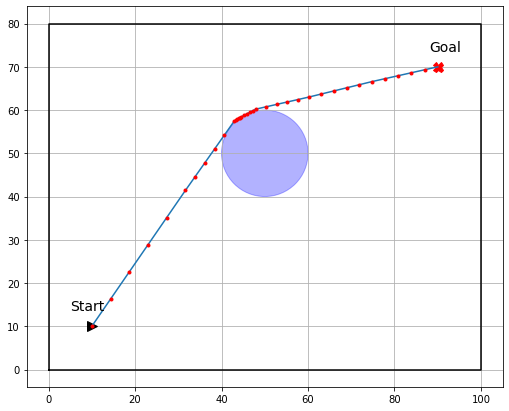

In [15]:
rrt_star = RRTStar(
            start=[sx, sy],
            goal=[gx, gy],
            rand_area=[x_min, x_max, y_min, y_max],
            obstacle_list=obstacle_list,
            k = 1,
            speed = 5,
            path_resolution=1.0,
            connect_circle_dist=150,
            goal_sample_rate=15,
            expand_dis=1)

#%matplotlib
start_time = time.time()
path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
path_star = list(reversed(path_star))
end_time = time.time()
if path_star is None:
    print("Cannot find path")
else:
    print("Found path!!")

print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")
# print("Travel time = ", str(round(cost_tot/5/3600,4)), "hours")

path_dist = 0
for i in range(len(path_star)-1):
    path_dist += np.hypot(path_star[i+1][0] - path_star[i][0], path_star[i+1][1] - path_star[i][1])
print("Travel time = ", str(round(path_dist/18,4)), "hours")


SAMPLING = 5
points = []
for i in range(len(path_star))[:-2]:
    p1 = path_star[i]
    p2 = path_star[i+1]
    
    #print(path_star[x])
    #print(path_star[x+1])
    xs = [p1[0],p2[0]]
    ys = [p1[1],p2[1]]
    x_inter = np.arange(xs[0],xs[1],(xs[1]-xs[0])/SAMPLING)
    y_inter = np.asarray(np.interp(x_inter,xs,ys))
    
    for ii in range(len(y_inter)):
            points.append([x_inter[ii],y_inter[ii]])
            
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
for i in range(len(obstacle_list[0])):
    ax.add_patch(plt.Circle(xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=10,
                            color='b', alpha=0.3))
# plt.plot(x_obs[0], y_obs[0], '.', color="dodgerblue")
retta, = plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot([x for (x, y) in points], [y for (x, y) in points], '.r',label='interp')
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

### APF LIMIT CYCLES

In [606]:
import math
import random
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import time


class Vector2d:
    def __init__(self, x, y):
        self.deltaX = x
        self.deltaY = y
        self.length = -1
        self.direction = [0, 0]
        self.vector2d_share()

    def vector2d_share(self):
        if type(self.deltaX) == type(list()) and type(self.deltaY) == type(list()):
            deltaX, deltaY = self.deltaX, self.deltaY
            self.deltaX = deltaY[0] - deltaX[0]
            self.deltaY = deltaY[1] - deltaX[1]
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None
        else:
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None

    def __add__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX += other.deltaX
        vec.deltaY += other.deltaY
        vec.vector2d_share()
        return vec

    def __sub__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX -= other.deltaX
        vec.deltaY -= other.deltaY
        vec.vector2d_share()
        return vec

    def __mul__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX *= other
        vec.deltaY *= other
        vec.vector2d_share()
        return vec

    def __truediv__(self, other):
        return self.__mul__(1.0 / other)

    def __repr__(self):
        return 'Vector deltaX:{}, deltaY:{}, length:{}, direction:{}'.format(self.deltaX, self.deltaY, self.length,
                                                                             self.direction)


class APF:

    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        """
        :param start: 起点
        :param goal: 终点
        :param obstacles: 障碍物列表，每个元素为Vector2d对象
        :param k_att: 引力系数
        :param k_rep: 斥力系数
        :param rr: 斥力作用范围
        :param step_size: 步长
        :param max_iters: 最大迭代次数
        :param goal_threshold: 离目标点小于此值即认为到达目标点
        :param is_plot: 是否绘图
        """
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        
    def attractive(self):
        att = (self.goal - self.current_pos) * self.k_att  # conical potential
        return att

    def repulsion(self):
        rep = Vector2d(0, 0)
        for obstacle in self.obstacles:
            # obstacle = Vector2d(0, 0)
            t_vec = self.current_pos - obstacle
            if t_vec.length > self.rr:
                pass
            else:
                rep += Vector2d(t_vec.direction[0], t_vec.direction[1]) * self.k_rep * (
                        1.0 / t_vec.length - 1.0 / self.rr) / (t_vec.length ** 2)  # 方向由障碍物指向机器人
        return rep

    def path_plan(self):
        while self.iters < self.max_iters and (self.current_pos - self.goal).length > self.goal_threshold:
            
            f_vec = self.attractive() + self.repulsion()
            self.current_pos += Vector2d(f_vec.direction[0], f_vec.direction[1]) * self.step_size
            self.iters += 1
            self.path.append([self.current_pos.deltaX, self.current_pos.deltaY])
#             print(self.current_pos.deltaX,self.current_pos.deltaY)
            if self.is_plot:
                plt.plot(self.current_pos.deltaX, self.current_pos.deltaY, '.b')
                plt.pause(self.delta_t)
        if (self.current_pos - self.goal).length <= self.goal_threshold:
            self.is_path_plan_success = True
            
            
def check_vec_angle(v1: Vector2d, v2: Vector2d):
    v1_v2 = v1.deltaX * v2.deltaX + v1.deltaY * v2.deltaY
    angle = math.acos(v1_v2 / (v1.length * v2.length)) * 180 / math.pi
    return angle


class APF_Improved(APF):
    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False):
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr  
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        
    def repulsion(self):
        """
        斥力计算, 改进斥力函数, 解决不可达问题
        :return: 斥力大小
        """
        rep = Vector2d(0, 0) 
        for obstacle in self.obstacles:
            obs_to_rob = self.current_pos - obstacle
            rob_to_goal = self.goal - self.current_pos
            obs_to_goal = self.goal - obstacle
            if obs_to_rob.length > self.rr:  
                pass
            else:

                rep = (Vector2d(+obs_to_rob.deltaY, -obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(self.rr**2 - obs_to_rob.deltaX**2 - obs_to_rob.deltaY**2))*1
#                 if self.current_pos.deltaX < 9.5:
#                     rep = (Vector2d(-obs_to_rob.deltaY, +obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX,obs_to_rob.deltaY)*(self.rr ** 2 - obs_to_rob.deltaX ** 2 - obs_to_rob.deltaY ** 2)) * 50
        return rep

In [17]:
grid_size = 0.1
rr = 10
step_size, max_iters, goal_threshold = grid_size, 3000, grid_size
step_size_ = grid_size*3

obs = []
obs.append([50, 40])

start = (sx, sy)
goal = (gx, gy)



Computational time is 0.19357705116271973 seconds
path plan success
Travel time =  5.9222 hours


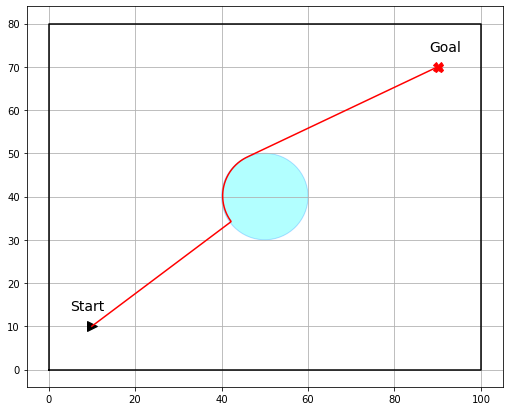

In [18]:
start_time = time.time()
apf = APF_Improved(start, goal, obs, 1, 0.8, rr, step_size, max_iters, goal_threshold, False)
apf.path_plan()
print("Computational time is {} seconds".format(time.time() - start_time))

path = apf.path
path_ = []
i = int(step_size_ / step_size)
while i < len(path):
    path_.append(path[i])
    i += int(step_size_ / step_size)
if path_[-1] != path[-1]:  # 添加最后一个点
    path_.append(path[-1])
# print('planed path points:{}'.format(path_))
if apf.is_path_plan_success:
    print('path plan success')
else:
    print('path plan failed')

sx = 10
sy = 10
x = [sx]
y = [sy]
for i in range(len(path)):
    x.append(path[i][0])
    y.append(path[i][1])
    
path_dist = 0
for i in range(len(x)-1):
    path_dist += np.hypot(x[i+1] - x[i], y[i+1] - y[i])
print("Travel time = ", str(round(path_dist/18,4)), "hours")
    
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0]+3, start[1]+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
for i in range(len(obs)):
    ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obs[i][0], obs[i][1]), radius=10,
                            alpha=0.3))
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# for i in range(len(path)):
#     plt.plot(path[i][0], path[i][1], '.r')
plt.plot(x,y, "-r")
ax.set_aspect('equal', adjustable='box')
plt.grid()
# plt.savefig('immapr.png', dpi=500)
plt.show()

## SUM

### A*

In [1761]:
grid_size = 1
robot_radius = 1
x_obs_sum = []
y_obs_sum = []
# scenario 1
# pi = math.pi
# r = 10
# n = 60
# x_obs = [[] for i in range(5)]
# for k in range(5):
#     x_obs[k] = [math.cos(2*pi/n*i)*r + 50 for i in range(n)]
#     y_obs[k] = [math.sin(2*pi/n*i)*r + 20+(10*k) for i in range(n)]

# x_obsgrande = [[] for i in range(5)]
# y_obsgrande = [[] for i in range(5)]
# for k in range(5):
#     x_obsgrande[k] = 50
#     y_obsgrande[k] = 20+(10*k)
    
# for i in range(len(x_obs)):  
#     x_obs_sum.extend(x_obs[i])
#     y_obs_sum.extend(y_obs[i]) 
# scenario 2
# pi = math.pi
# r=10
# n = 60
# x_obs = [[] for i in range(5)]
# for k in range(5):
#     x_obs[k] = [math.cos(2*pi/(n+30*k)*i)*(r+5*k) + 50 for i in range(n+30*k)]
#     y_obs[k] = [math.sin(2*pi/(n+30*k)*i)*(r+5*k) + 40 for i in range(n+30*k)]
# for i in range(len(x_obs)):  
#     x_obs_sum.extend(x_obs[i])
#     y_obs_sum.extend(y_obs[i]) 

# # # scenario 3
x_obs_sum = []
y_obs_sum = []
pi = math.pi
r=10
n = 60
x_obs = [[] for i in range(5)]
for k in range(5):
    x_obs[k] = [math.cos(2*pi/(n+20*k)*i)*(r+3*k) + 80-(k*10) for i in range(n+30*k)]
    y_obs[k] = [math.sin(2*pi/(n+20*k)*i)*(r+3*k) + 15+(k*10) for i in range(n+30*k)]
    
x_obsgrande = [[] for i in range(5)]
y_obsgrande = [[] for i in range(5)]
for k in range(5):
    x_obsgrande[k] = 80-(k*10)
    y_obsgrande[k] = 15+(k*10)
for i in range(len(x_obs)):  
    x_obs_sum.extend(x_obs[i])
    y_obs_sum.extend(y_obs[i]) 


min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Computational time is 3.695455312728882
Travel time =  7.8015 hours


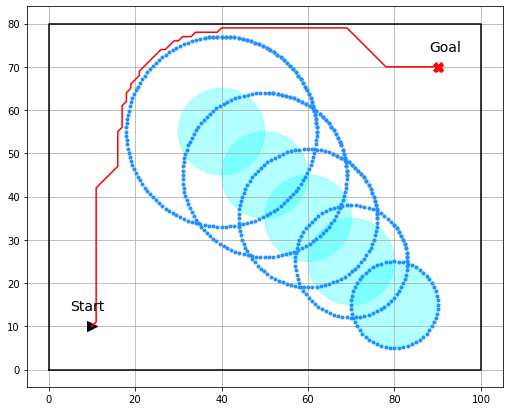

In [20]:
i = 0
start_time = time.time()
a_star = AStarPlanner(x_obs_sum, y_obs_sum, grid_size, robot_radius, x_min, y_min, x_max, y_max)
rx, ry = a_star.planning(sx, sy, gx, gy)
print("Computational time is {}".format(time.time() - start_time))
rx = list(reversed(rx))
ry = list(reversed(ry))

path_dist = 0
for r in range(len(rx)-1):
    path_dist += np.hypot(rx[r+1] - rx[r], ry[r+1] - ry[r])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
for i in range(len(x_obsgrande)):
    ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
#     ax.add_patch(plt.Circle(xy=(50, 40), radius=10+5*i, color='aqua', alpha=0.3))
#     ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10+3*i, color='aqua', alpha=0.3))
plt.plot(x_obs_sum, y_obs_sum, '.', color="dodgerblue")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [1568]:
astarsum1 = [[] for i in range(3)]


In [1581]:
astarsum1[2] = [rx,ry]

In [1582]:
import pickle
file_name = "toyastarsum.pkl"
open_file = open(file_name, "wb")
pickle.dump(astarsum1, open_file)
open_file.close()
# file_name = "sum_astary1.pkl"
# open_file = open(file_name, "rb")
# sum_pathy1 = pickle.load(open_file)
# open_file.close()

### RRT*

In [822]:
# rrt
# scenario 1
rrt_obsx = [50 for k in range(5)]
rrt_obsy = [20+(10*k) for k in range(5)]
obstacle_list = [[] for i in range(2)]
for i in range(5): # just not to modify the algorithm of RRT*
    obstacle_list[0].append([rrt_obsx[i], rrt_obsy[i], 10])

# scenario 2
# rrt_obsx = [50 for k in range(5)]
# rrt_obsy = [40 for k in range(5)]
# obstacle_list = [[] for i in range(2)]
# for i in range(5): # just not to modify the algorithm of RRT*
#     obstacle_list[0].append([rrt_obsx[i], rrt_obsy[i], 10+5*i])
# scenario 3
# rrt_obsx = [80-(k*10) for k in range(5)]
# rrt_obsy = [15+(k*10) for k in range(5)]
# obstacle_list = [[] for i in range(2)]
# for i in range(5): # just not to modify the algorithm of RRT*
#     obstacle_list[0].append([rrt_obsx[i], rrt_obsy[i], 10+3*i])

Found path!!
The computational time is 2.963 seconds
Travel time =  6.6796 hours


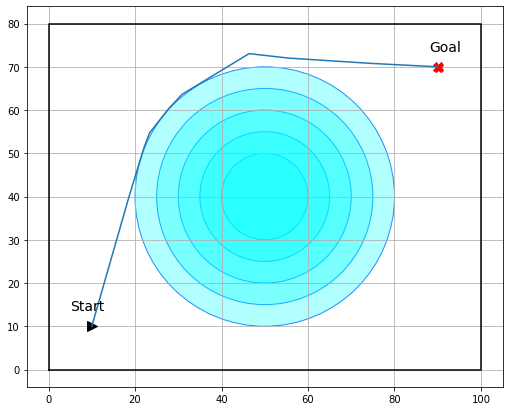

In [631]:
rrt_star = RRTStar(
            start=[sx, sy],
            goal=[gx, gy],
            rand_area=[x_min, x_max, y_min, y_max],
            obstacle_list=obstacle_list,
            k = 0,
            speed = 5,
            path_resolution=1.0,
            connect_circle_dist=150,
            goal_sample_rate=15,
            expand_dis=1)

#%matplotlib
start_time = time.time()
path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
path_star = list(reversed(path_star))
end_time = time.time()
if path_star is None:
    print("Cannot find path")
else:
    print("Found path!!")

print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")
# print("Travel time = ", str(round(cost_tot/5/3600,4)), "hours")

path_dist = 0
for i in range(len(path_star)-1):
    path_dist += np.hypot(path_star[i+1][0] - path_star[i][0], path_star[i+1][1] - path_star[i][1])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
for i in range(len(obstacle_list[0])):
#     ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=10,
#                             fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
    ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=10+5*i,
                        fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=10+3*i,
#                     fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
# plt.plot(x_obs[0], y_obs[0], '.', color="dodgerblue")
plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [1297]:
toyrrtsum = [[] for i in range(3)]

In [1308]:
toyrrtsum[2] = path_star

In [1313]:
import pickle
file_name = "toyrrtsum.pkl"
open_file = open(file_name, "wb")
pickle.dump(toyrrtsum, open_file)
open_file.close()
# file_name = "sum_astary1.pkl"
# open_file = open(file_name, "rb")
# sum_pathy1 = pickle.load(open_file)
# open_file.close()

### APF

In [21]:
grid_size = 1 #0.01
rr = 1.5
step_size, max_iters, goal_threshold = grid_size, 5000, grid_size
step_size_ = grid_size*3

obs = []
# for i in range(len(rrt_obsx)): 
#     obs.append([rrt_obsx[i], rrt_obsy[i]])
# obs.append([50, 40])
for i in range(len(x_obs_sum)):    
    obs.append([x_obs_sum[i], y_obs_sum[i]])
# for i in range(len(x_obsm)):    
#     obs.append([x_obsm[i], y_obsm[i]])
# for i in range(len(x_obs)):
#     obs.append([x_obs[i], y_obs[i]])
start = (sx, sy)
goal = (gx, gy)

In [22]:
x_obs = [math.cos(2*pi/(n+30*4)*i)*(r+5*4) + 50 for i in range(n+30*4)]
y_obs = [math.sin(2*pi/(n+30*4)*i)*(r+5*4) + 40 for i in range(n+30*4)]

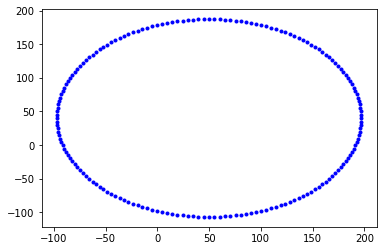

In [23]:
for i in range(len(x_obs)):
    plt.plot(x_obs[i], y_obs[i], ".b")

In [956]:
import math
import random
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import time


class Vector2d:
    def __init__(self, x, y):
        self.deltaX = x
        self.deltaY = y
        self.length = -1
        self.direction = [0, 0]
        self.vector2d_share()

    def vector2d_share(self):
        if type(self.deltaX) == type(list()) and type(self.deltaY) == type(list()):
            deltaX, deltaY = self.deltaX, self.deltaY
            self.deltaX = deltaY[0] - deltaX[0]
            self.deltaY = deltaY[1] - deltaX[1]
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None
        else:
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None

    def __add__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX += other.deltaX
        vec.deltaY += other.deltaY
        vec.vector2d_share()
        return vec

    def __sub__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX -= other.deltaX
        vec.deltaY -= other.deltaY
        vec.vector2d_share()
        return vec

    def __mul__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX *= other
        vec.deltaY *= other
        vec.vector2d_share()
        return vec

    def __truediv__(self, other):
        return self.__mul__(1.0 / other)

    def __repr__(self):
        return 'Vector deltaX:{}, deltaY:{}, length:{}, direction:{}'.format(self.deltaX, self.deltaY, self.length,
                                                                             self.direction)


class APF:

    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        """
        :param start: 起点
        :param goal: 终点
        :param obstacles: 障碍物列表，每个元素为Vector2d对象
        :param k_att: 引力系数
        :param k_rep: 斥力系数
        :param rr: 斥力作用范围
        :param step_size: 步长
        :param max_iters: 最大迭代次数
        :param goal_threshold: 离目标点小于此值即认为到达目标点
        :param is_plot: 是否绘图
        """
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        
    def attractive(self):
        att = (self.goal - self.current_pos) * self.k_att  # conical potential
        return att

    def repulsion(self):
        rep = Vector2d(0, 0)
        for obstacle in self.obstacles:
            # obstacle = Vector2d(0, 0)
            t_vec = self.current_pos - obstacle
            if t_vec.length > self.rr:
                pass
            else:
                rep += Vector2d(t_vec.direction[0], t_vec.direction[1]) * self.k_rep * (
                        1.0 / t_vec.length - 1.0 / self.rr) / (t_vec.length ** 2)  # 方向由障碍物指向机器人
        return rep

    def path_plan(self):
        while self.iters < self.max_iters and (self.current_pos - self.goal).length > self.goal_threshold:
            
            f_vec = self.attractive() + self.repulsion()
            self.current_pos += Vector2d(f_vec.direction[0], f_vec.direction[1]) * self.step_size
            self.iters += 1
            self.path.append([self.current_pos.deltaX, self.current_pos.deltaY])
#             print(self.current_pos.deltaX,self.current_pos.deltaY)
            if self.is_plot:
                plt.plot(self.current_pos.deltaX, self.current_pos.deltaY, '.b')
                plt.pause(self.delta_t)
        if (self.current_pos - self.goal).length <= self.goal_threshold:
            self.is_path_plan_success = True
        
def check_vec_angle(v1: Vector2d, v2: Vector2d):
    v1_v2 = v1.deltaX * v2.deltaX + v1.deltaY * v2.deltaY
    angle = math.acos(v1_v2 / (v1.length * v2.length)) * 180 / math.pi
    return angle

class APF_Improved(APF):
    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr  
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        self.direction = 0
        
#     def repulsion(self):
#         """
#         斥力计算, 改进斥力函数, 解决不可达问题
#         :return: 斥力大小
#         """
#         rep = Vector2d(0, 0) 
#         for obstacle in self.obstacles:
#             obs_to_rob = self.current_pos - obstacle
# #             rob_to_goal = self.goal - self.current_pos
# #             obs_to_goal = self.goal - obstacle
#             if obs_to_rob.length > self.rr:  
#                 pass
#             else:

#                 """rep_1 = Vector2d(obs_to_rob.direction[0], obs_to_rob.direction[1]) * self.k_rep * (
#                         1.0 / obs_to_rob.length - 1.0 / self.rr) / (obs_to_rob.length ** 2) * (rob_to_goal.length ** 2)
#                 rep_2 = Vector2d(rob_to_goal.direction[0], rob_to_goal.direction[1]) * self.k_rep * ((1.0 / obs_to_rob.length - 1.0 / self.rr) ** 2) * rob_to_goal.length
#                 rep +=(rep_1+rep_2)"""

#                 #rep += Vector2d(+obs_to_rob.direction[1], -obs_to_rob.direction[0]) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(9 - (obs_to_rob.deltaX)**2 - (obs_to_rob.deltaY)**2)
#                 #if obs_to_goal <
#                 rep = (Vector2d(obs_to_rob.deltaY, -obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(self.rr**2 - obs_to_rob.deltaX**2 - obs_to_rob.deltaY**2))*100
#                 #if self.current_pos.deltaX < 9.5:
#                 #    rep = (Vector2d(-obs_to_rob.deltaY, +obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX,obs_to_rob.deltaY)*(self.rr ** 2 - obs_to_rob.deltaX ** 2 - obs_to_rob.deltaY ** 2)) * 50
#         return rep
    
    """def repulsion(self):
        rep = Vector2d(0, 0)  # 所有障碍物总斥力
        obstacle = Vector2d(0, 0)          # initialization obstacle
        min_obs = Vector2d(1000, 1000)     # obstacle far away
        obs_to_rob_min = min_obs - self.current_pos
        
        list_dro = []
        list_dpro = []
        list_obs = []
        for obstacle in self.obstacles:
            obs_to_curr = self.current_pos - obstacle
            rob_to_goal = self.goal - self.current_pos
            obs_to_goal = self.goal - obstacle
            curr_to_obs = obstacle - self.current_pos
            
            p1 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
            p2 = np.array([self.goal.deltaX, self.goal.deltaY])
            p3 = np.array([obstacle.deltaX, min_obs.deltaY])
            d_pro = np.cross(p2-p1, p3-p1) / np.linalg.norm(p2-p1)
            if d_pro <= self.rr:  # disturbing obstacles # d_pro
#                 list_dro.append(curr_to_obs.length)
#                 list_dpro.append(d_pro)
                list_obs.append(obstacle)
            obs_to_rob = obstacle - self.current_pos     # D_ro_i 
            if obs_to_rob_min.length > obs_to_rob.length:
                obs_to_rob_min = obs_to_rob
                min_obs = obstacle    # closer obstacle to the robot
                
        #print(f"X:{min_obs.deltaX}, Y:{min_obs.deltaY}")
        obs_to_robinv = min_obs - self.current_pos 
        obs_to_rob = self.current_pos - min_obs
        #print(f"Minima dal ciclo:{obs_to_rob_min.length}, Minima dal calcolo:{obs_to_robinv.length}")
        
        rob_to_goal = self.goal - self.current_pos"""
        
# DEF FATTO COME IL PAPER LOUISE
    def repulsion(self):
        rep = Vector2d(0, 0)  
        obstacle = Vector2d(0, 0)
        list_dro = []   # list of distance robot-obstacle
        list_dpro = []  # list of perpendicular point-line
        list_obs = []   # list of potentially disturbing obstacles
        
        for obstacle in self.obstacles:
            p1 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
            p2 = np.array([self.goal.deltaX, self.goal.deltaY])
            p3 = np.array([obstacle.deltaX, obstacle.deltaY])
            # compute the perpendicular distance between each obstacle and the line of robot-target
            d_pro = np.abs(np.cross(p2-p1,p3-p1) / np.linalg.norm(p2-p1))   # abs is important
            curr_to_obs = obstacle - self.current_pos
#             print(f"d pro is {d_pro}")
            if d_pro <= self.rr-0.01:  # disturbing obstacles # d_pro
                list_dro.append(curr_to_obs.length)
                list_dpro.append(d_pro)
                list_obs.append(obstacle)
                if curr_to_obs.deltaX < -10:  # I'm saying that if the obstacle is overcome, don't consider it anymore
                    list_obs.pop()
                    list_dro.pop()
                    list_dpro.pop()
                    
        
        if len(list_obs) == 0:  #  no disturbing obstacles -> controller OFF
#             print("Controller inactive")
            self.var = False
            rep = Vector2d(0, 0)
            return rep

        min_d_ro = min(list_dro)       # smallest distance from robot
#         print(list_dro)
#         print("------------")
#         er = 0
#         for i in range(len(list_dro)):
#             check = np.allclose(min_d_ro,list_dro[i], rtol=1e-1, atol=1e-1)
#             if check:
#                 er += 1 
#                 if er == 2:
#                     print(check)
#                     print(list_dro)
#         print(min_d_ro)
        temp = list_dro.index(min_d_ro)
        closest_obs = list_obs[temp]     # closest obstacle  
#         print(f"closest obs is {closest_obs.deltaX, closest_obs.deltaY}")
        obs_to_goal = self.goal - closest_obs
        obs_to_curr = self.current_pos - closest_obs
        
        m1 = obs_to_goal.deltaY / obs_to_goal.deltaX
        alpha = np.arctan(m1)
#         print(f"alpha is {m1*180/np.pi}")
        
        alpha_matrix = np.matrix([[np.cos(alpha), -np.sin(alpha),      0,    closest_obs.deltaX], 
                                  [np.sin(alpha),  np.cos(alpha),      0,    closest_obs.deltaY], 
                                  [0,                   0       ,      1,            0         ], 
                                  [0,                   0       ,      0,            1         ]
                                 ])
        alpha_matrix = np.linalg.inv(alpha_matrix)
        robot_array = np.array([self.current_pos.deltaX, self.current_pos.deltaY, 0, 1])
        result = np.matmul(alpha_matrix, robot_array)
        result = np.array(result)
        x0 = result[0][0]
        y0 = result[0][1]
#         print(f"x0 is {x0}")
#         print(f"y0 is {y0}")
#         print(f"obs is {closest_obs.deltaY}")
#         print(f"self.var is {self.var}")
        
#         if obs_to_curr.length > 4:
#             self.var = False
#             print("obs to curr > 4")
  
        
        eps = 0.01
        if x0 < 0:
            r_c = self.rr - eps
        else:
            r_c = self.rr + eps
        
        if y0 >= 0:
            sign = 1
        else:
            sign = -1
        if self.var:  # controller active
            rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
                   ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 100
#             rep = (Vector2d(obs_to_curr.deltaY, -obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 100
        else:         # controller was off
            self.direction = sign
            rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
                   ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 100
#             rep = (Vector2d(obs_to_curr.deltaY, -obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 100
            self.var = True
            
        return rep
        

    # find y0
#         p1 = np.array([closest_obs.deltaX, closest_obs.deltaY])
#         p2 = np.array([self.goal.deltaX, self.goal.deltaY])
#         p3 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
#         y0 = np.cross(p2-p1,p3-p1) / np.linalg.norm(p2-p1) 
#         print(f"y0 is {y0}")
#         m1 = obs_to_goal.deltaY / obs_to_goal.deltaX
#         m2 = -1/m1
#         b1 = self.goal.deltaY - self.goal.deltaX * m1                 # y = m1*x + b1
#         b2 = self.current_pos.deltaY - self.current_pos.deltaX * m2   # y = m2*x + b2
        
#         xi = (b1 - b2) / (m2 - m1)
#         yi = m1 * xi + b1
        
#         obs_to_curr_proj = Vector2d(xi, yi) - closest_obs
#         x0 = obs_to_curr_proj.length
#         print(y0)
    
#         theta = check_vec_angle(obs_to_curr, obs_to_goal)
#         x0 = obs_to_curr.length * math.cos(theta*np.pi/180)
#         print(f"x0 is {x0}")
        
        
        
        
        
        
        
        
        
        
        
#         """
#         斥力计算, 改进斥力函数, 解决不可达问题
#         :return: 斥力大小
#         """
#         rep = Vector2d(0, 0)  # 所有障碍物总斥力
#         obstacle = Vector2d(0, 0)
#         list_dro = []
#         list_dpro = []
#         list_obs = []
#         for obstacle in self.obstacles:
#             obs_to_curr = self.current_pos - obstacle
#             rob_to_goal = self.goal - self.current_pos
#             obs_to_goal = self.goal - obstacle
#             curr_to_obs = obstacle - self.current_pos
#             d_pro = (np.cross(np.array([rob_to_goal.deltaX, rob_to_goal.deltaY]),
#                               np.array([curr_to_obs.deltaX, curr_to_obs.deltaY])) / rob_to_goal.length)

#             if d_pro <= self.rr:  # disturbing obstacles # d_pro
#                 list_dro.append(curr_to_obs.length)
#                 list_dpro.append(d_pro)
#                 list_obs.append(obstacle)

#         print(len(list_obs))
#         if len(list_obs) == 0:
#             self.var = False
#             rep = Vector2d(0, 0)
#             return rep
#         # print("Disturbing obstacles at iter {} are \n{}".format(self.iters, list_obs))
#         min_dro = min(list_dro)
#         print(min_dro)
#         index = list_dro.index(min_dro)
#         closest_obs = list_obs[index]
#         obs_to_goal = self.goal - closest_obs
#         obs_to_curr = self.current_pos - closest_obs
#         y0 = (np.cross(np.array([obs_to_goal.deltaX, obs_to_goal.deltaY]),
#                        np.array([obs_to_curr.deltaX, obs_to_curr.deltaY])) / obs_to_goal.length)
#         m1 = obs_to_goal.deltaY / obs_to_goal.deltaX
#         m2 = -1/m1
#         b1 = self.goal.deltaY - m1 * self.goal.deltaY
#         b2 = self.current_pos.deltaX * (-m2) + self.current_pos.deltaY
#         xi = (b1 - b2) / (m2 - m1)
#         yi = m1 * xi + b1

#         theta = check_vec_angle(obs_to_curr, obs_to_goal)
#         x0 = obs_to_curr.length * math.cos(theta*np.pi/180)
#         # y0sin = obs_to_curr.length * math.sin(theta*np.pi/180)

#         print("Closest obstacle is \n {} \nwith distance {} \n and position {},{}".format(
#             closest_obs, min_dro, closest_obs.deltaX, closest_obs.deltaY))
#         print("reference y0 {}".format(y0))
#         print("angle theta {}".format(theta))
#         # print("x0 is {}".format(x0))
#         # print(self.iters)
#         eps = 0.01
#         print("x0 is {}".format(x0))
#         if x0 < 0:
#             r_c = self.rr - eps
#         else:
#             r_c = self.rr + eps
#         print(y0)
#         if y0 >= 0:
#             sign = 1
#         else:
#             sign = -1
#         if self.var:  # controller active
#             rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    (r_c ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 50
#         else:         # controller was off
#             self.direction = sign
#             rep = (Vector2d(self.direction*obs_to_curr.deltaY, -self.direction*obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX,obs_to_curr.deltaY) *
#                    (r_c ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 50
#             self.var = True
#         return rep
    

In [957]:
# obs = [[30,10], [33.5,15], [47,18.5], [50,21], [80,15]]

# grid_size = 0.1
# rr = 3
# step_size, max_iters, goal_threshold = grid_size, 3000, grid_size
# step_size_ = grid_size*3


# start = (10, 10)
# goal = (60, 10)

Computational time is 6.388614177703857 seconds
path plan success
Travel time =  9.0556 hours


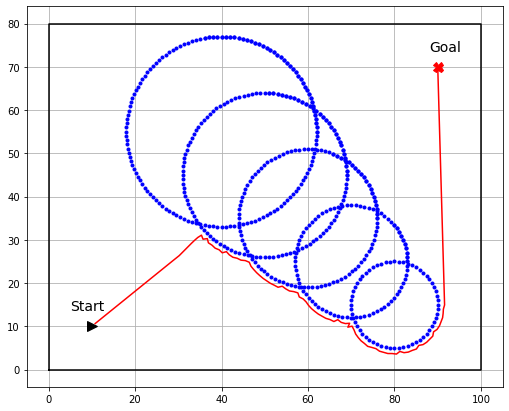

In [958]:
start_time = time.time()

apf = APF_Improved(start, goal, obs, 1, 0.8, rr, step_size, max_iters, goal_threshold, False)
apf.path_plan()
print("Computational time is {} seconds".format(time.time() - start_time))

path = apf.path
path_ = []
i = int(step_size_ / step_size)
while i < len(path):
    path_.append(path[i])
    i += int(step_size_ / step_size)
if path_[-1] != path[-1]:  # 添加最后一个点
    path_.append(path[-1])
# print('planed path points:{}'.format(path_))
if apf.is_path_plan_success:
    print('path plan success')
else:
    print('path plan failed')

sx = 10
sy = 10
# x = [sx]
# y = [sy]
x = []
y = []
for i in range(len(path)):
    x.append(path[i][0])
    y.append(path[i][1])
    
path_dist = 0
for i in range(len(x)-1):
    path_dist += np.hypot(x[i+1] - x[i], y[i+1] - y[i])
print("Travel time = ", str(round(path_dist/18,4)), "hours")
    
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0]+3, start[1]+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
# for i in range(len(x_obs)):
#     plt.plot(x_obs[i], y_obs[i], ".b")
#     ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obs[i][0], obs[i][1]), radius=rr,
#                         fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
# plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# for i in range(len(path)):
#     plt.plot(path[i][0], path[i][1], '-r')
for i in range(len(x_obs_sum)):
    plt.plot(x_obs_sum[i], y_obs_sum[i], ".b")
plt.plot(x,y, "-r")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.savefig('immapr.png', dpi=300)
plt.show()

In [878]:
# toyapfsum = [[] for i in range(3)]

In [959]:
toyapfsum[2] = [x,y]

In [1929]:
import pickle
# file_name = "toyapfsum.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(toyapfsum, open_file)
# open_file.close()
file_name = "alg_rrt.pkl"
open_file = open(file_name, "rb")
alg_rrt = pickle.load(open_file)
open_file.close()

In [1937]:
len(alg_apf)
len(alg_apf[0])
k = 2

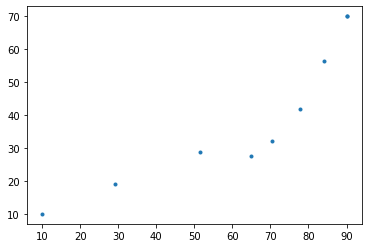

In [1938]:
plt.plot([x for (x, y) in alg_rrt[k]], [y for (x, y) in alg_rrt[k]], '.',label='RRT*')
# for i in range(len(alg_rrt[k])):
#     plt.plot(alg_rrt[k][0], alg_rrt[k][1], '.',label='RRT*')

## GLOBAL


### A*

In [1565]:
grid_size = 1
robot_radius = 1
# scenario 1
# pi = math.pi
# r = 10
# n = 60
# x_obs = [[] for i in range(5)]
# y_obs = [[] for i in range(5)]
# for k in range(5):
#     x_obs[k] = [math.cos(2*pi/n*i)*r + 50 for i in range(n)]
#     y_obs[k] = [math.sin(2*pi/n*i)*r + 20+(10*k) for i in range(n)]

# x_obsgrande = [[] for i in range(5)]
# y_obsgrande = [[] for i in range(5)]
# for k in range(5):
#     x_obsgrande[k] = 50
#     y_obsgrande[k] = 20+(10*k)
# scenario 2
# pi = math.pi
# r=10
# n = 60
# x_obs = [[] for i in range(5)]
# x_obs_sum = []
# y_obs_sum = []
# for k in range(5):
#     x_obs[k] = [math.cos(2*pi/(n+30*k)*i)*(r+5*k) + 50 for i in range(n+30*k)]
#     y_obs[k] = [math.sin(2*pi/(n+30*k)*i)*(r+5*k) + 40 for i in range(n+30*k)]
# for i in range(len(x_obs)):  
#     x_obs_sum.extend(x_obs[i])
#     y_obs_sum.extend(y_obs[i]) 

# # scenario 3
pi = math.pi
r=10
n = 60
x_obs = [[] for i in range(5)]
for k in range(5):
    x_obs[k] = [math.cos(2*pi/(n+20*k)*i)*(r+3*k) + 80-(k*10) for i in range(n+30*k)]
    y_obs[k] = [math.sin(2*pi/(n+20*k)*i)*(r+3*k) + 15+(k*10) for i in range(n+30*k)]
    
x_obsgrande = [[] for i in range(5)]
y_obsgrande = [[] for i in range(5)]
for k in range(5):
    x_obsgrande[k] = 80-(k*10)
    y_obsgrande[k] = 15+(k*10)

In [1497]:
meteo = [[] for i in range(5)]
for i in range(5):
    for j in range(len(map_astar1[i])):
        meteo[i].append([map_astar1[i][j][0],map_astar1[i][j][1]])

In [1757]:

sx = 10
sy = 10
gx = 90
gy = 70

rx_list = []
ry_list = []
rx_list_finale = []
ry_list_finale = []
k = 0
q_count = 0
path_dist = 0
path_dist_list = []
list_sx = []
list_sy = []
list_sx.append(sx)
list_sy.append(sy)
dist = np.hypot(sx - gx, sy - gy)
var1 = True
sx_init = 10
sy_init = 10


In [1758]:
start_time = time.time()
while dist >= grid_size:
    path_cost = 0 
    a_star = AStarPlanner(x_obs[k], y_obs[k], grid_size, robot_radius, x_min, y_min, x_max, y_max)
    rx, ry = a_star.planning(sx, sy, gx, gy)
    rx = list(reversed(rx))
    ry = list(reversed(ry))

    for i in range(len(rx)-1):
        path_cost += np.hypot(rx[i] - rx[i+1], ry[i] - ry[i+1])
    print("Travel distance = {} km".format(path_cost))

    if len(ry) == 1:
        print("The algorithm does not found a path because of rough sea in between or in the survey area")

        q_init = rx_list[-1].index(sx)
        q = rx_list[-1].index(sx)
        while path_dist < 18*(k+1): # km
            if np.hypot(rx_list[-1][q] - gx, ry_list[-1][q] - gy) <= grid_size:
                print("Complete travel in less than {} hours".format(k+1))
                dist = np.hypot(rx_list[-1][q] - gx, ry_list[-1][q] - gy)
                break
            path_dist += np.hypot(rx_list[-1][q] - rx_list[-1][q+1], ry_list[-1][q] - ry_list[-1][q+1])
            # to be conservative I rather use future time window than starting in the future with a past map
            if path_dist > 18*(k+1):  
                path_dist -= np.hypot(rx_list[-1][q] - rx_list[-1][q+1], ry_list[-1][q] - ry_list[-1][q+1])
                path_dist_list.append(path_dist)
                break 
            q += 1

        sx = rx_list[-1][q]
        sy = ry_list[-1][q]
        list_sx.append(sx)
        list_sy.append(sy)
        rx_list.append(rx_list[-1])  # resave the same path
        ry_list.append(ry_list[-1])
        rx_list_finale.extend(rx_list[-1][q_init:q])
        ry_list_finale.extend(ry_list[-1][q_init:q])
    else:
        q = 0
        while path_dist < 18*(k+1): # km
            if np.hypot(rx[q] - gx, ry[q] - gy) <= grid_size:
                print("Complete travel in less than {} hours".format(k+1))
                dist = np.hypot(rx[q] - gx, ry[q] - gy)
                break
            path_dist += np.hypot(rx[q] - rx[q+1], ry[q] - ry[q+1])

            # to be conservative I rather use future time window than starting in the future with a past map
            if path_dist > 18*(k+1):  
                path_dist -= np.hypot(rx[q] - rx[q+1], ry[q] - ry[q+1])
                path_dist_list.append(path_dist)
                break 
            q += 1

        sx = rx[q]
        sy = ry[q]
        list_sx.append(sx)
        list_sy.append(sy)
        rx_list.append(rx)
        ry_list.append(ry)
        rx_list_finale.extend(rx[:q])
        ry_list_finale.extend(ry[:q])

    dist = np.hypot(sx - gx, sy - gy)
    k += 1
    for i in range(len(meteo[k])):
        if np.allclose([sx,sy], meteo[k][i], atol=0.0005, rtol=0.0005):
            print(True)
            rx_list_finale.append(rx[q])
            ry_list_finale.append(ry[q])
            print("USV got lost")
            var1 = False
            break
    if var1:
        print("USV in safe zone")
    else:
        break
print("Computational time is {}".format(time.time() - start_time))
    

min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Travel distance = 104.85281374238556 km
USV in safe zone
min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Travel distance = 87.71067811865466 km
USV in safe zone
min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Travel distance = 70.49747468305829 km
True
USV got lost
Computational time is 1.8205034732818604


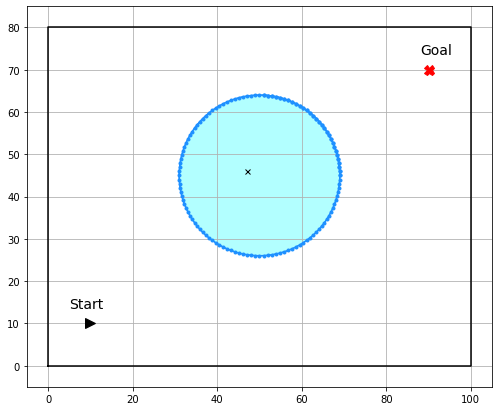

In [1762]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx_init, sy_init, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx_init+3, sy_init+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
i = 3
# ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
# ax.add_patch(plt.Circle(xy=(50, 40), radius=10+5*i, color='aqua', alpha=0.3))
ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(x_obsgrande[i], y_obsgrande[i]), radius=10+3*i,
                fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
# plt.plot(x_obs[0], y_obs[0], '.', color="dodgerblue")
# plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(list_sx[i], list_sy[i], 'xk', markersize=5)
# plt.plot(rx_list[i], ry_list[i], '-')
plt.plot(x_obs[i], y_obs[i], color="dodgerblue", marker=".")
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

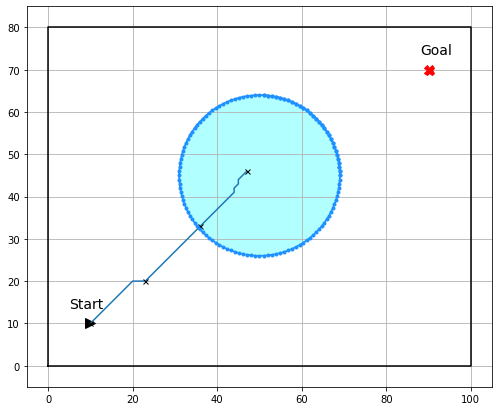

In [1768]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx_init, sy_init, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx_init+3, sy_init+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(rx_list_finale, ry_list_finale, '-')
i = 3
plt.plot(list_sx, list_sy, 'xk', markersize=5)
plt.plot(x_obs[i], y_obs[i], color="dodgerblue", marker=".")
# ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
# ax.add_patch(plt.Circle(xy=(50, 40), radius=10+5*i, color='aqua', alpha=0.3))
ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(x_obsgrande[i], y_obsgrande[i]), radius=10+3*i,
                fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

In [1687]:
# toyastarglo = [[] for i in range(3)]
# toyastarglolist = [[] for i in range(3)]

In [1770]:
toyastarglo[2] = [rx_list_finale,ry_list_finale]
toyastarglolist[2] = [list_sx, list_sy]

In [131]:
import pickle
# file_name = "toyastarglo.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(toyastarglolist, open_file)
# open_file.close()
file_name = "toyastarglo.pkl"
open_file = open(file_name, "rb")
toyastarglo = pickle.load(open_file)
open_file.close()

In [1660]:
len(toyastarglo)

3

### RRT*

In [138]:
class RRTStar(RRT):
    """
    Class for RRT Star planning
    """

    class Node(RRT.Node):
        def __init__(self, x, y):
            super().__init__(x, y)
            self.cost = 0.0  # taking into account the cost

    def __init__(self,
                 start,
                 goal,
                 obstacle_list,
                 rand_area,
                 k,
                 connect_circle_dist,
                 expand_dis,
                 speed,
                 path_resolution,
                 goal_sample_rate,
                 max_iter=1000,
                 # RRT* parameter: planning constant for the recomputing of the cost
                 search_until_max_iter=False):
        """
        Setting Parameter

        start:Start Position [x,y]
        goal:Goal Position [x,y]
        obstacleList:obstacle Positions [[x,y,size],...]
        randArea:Random Sampling Area [min,max]

        """
        super().__init__(start, goal, obstacle_list, rand_area, k, expand_dis, speed, path_resolution,
                         goal_sample_rate, max_iter)
        self.connect_circle_dist = connect_circle_dist
        self.goal_node = self.Node(goal[0], goal[1])
        self.search_until_max_iter = search_until_max_iter

    def planning(self, animation=True):
        """
        rrt star path planning

        animation: flag for animation on or off .
        """
        v = 0
        self.node_list = [self.start]
        for i in range(self.max_iter):
            # print("Iter:", i, ", number of nodes:", len(self.node_list))
            rnd = self.get_random_node()
            nearest_ind = self.get_nearest_node_index(self.node_list, rnd)  # nearest index
            near_node = self.node_list[nearest_ind]  # nearest node of the list to the rnd point just found
            new_node = self.steer(near_node, rnd, self.expand_dis)  # at each iter new node change of expand_dis

            # adding cost from the near node and random node
            new_node.cost = near_node.cost + math.hypot(new_node.x-near_node.x, new_node.y-near_node.y)
            if self.check_collision(new_node, self.obstacle_list[self.k]):
                near_inds = self.find_near_nodes(new_node)  # now we have the indexes of nodes near new_node
                node_with_updated_parent = self.choose_parent(new_node, near_inds)  # arguments: new node and indexes
                if node_with_updated_parent:
                    self.rewire(node_with_updated_parent, near_inds)
                    self.node_list.append(node_with_updated_parent)
                else:
                    self.node_list.append(new_node)
            # mp(new_node.x, new_node.y, inverse=True)

            """if new_node.cost/5 > 3600*self.k:  # comment if global planning
                self.k += 1"""

                # if self.k > 14:
                #    self.k = 14

            if animation:
                v = self.draw_graph(self.obstacle_list[self.k], v, rnd)

            if (not self.search_until_max_iter) and new_node:  # if reaches goal
                last_index = self.search_best_goal_node()
                if last_index is not None:
                    return self.generate_final_course(last_index), new_node.cost, i

        print("reached max iteration")

        last_index = self.search_best_goal_node()   # if I want to search until reached max iteration
        if last_index is not None:
            return self.generate_final_course(last_index)

        return None

    def choose_parent(self, new_node, near_inds):
        """
        Computes the cheapest point to new_node contained in the list
        near_inds and set such a node as the parent of new_node.
            Arguments:
            --------
                new_node, Node
                    randomly generated node with a path from its neared point
                    There are not coalitions between this node and the tree.
                near_inds: list
                    Indices of indices of the nodes what are near to new_node

            Returns.
            ------
                Node, a copy of new_node
        """
        if not near_inds:
            return None

        # search nearest cost in near_inds
        costs = []
        for i in near_inds:  # in a for loop
            near_node = self.node_list[i]  # the near node is each of the list with the corresponding list
            t_node = self.steer(near_node, new_node)  # it finds the node attached to new_node and define parent near_n
            if t_node and self.check_collision(t_node, self.obstacle_list[self.k]):
                costs.append(self.calc_new_cost(near_node, new_node))  # the function calc the cost as a distance
            else:  # costs is a list
                costs.append(float("inf"))  # the cost of collision node
        min_cost = min(costs)

        if min_cost == float("inf"):
            print("There is no good path.(min_cost is inf)")
            return None

        min_ind = near_inds[costs.index(min_cost)]  # find the index of near node (in the ball) with min cost
        new_node = self.steer(self.node_list[min_ind], new_node)  # segment between the min cost node and new node
        new_node.cost = min_cost

        return new_node

    def search_best_goal_node(self):
        #  compute the distance of each node from the goal
        dist_to_goal_list = [self.calc_dist_to_goal(n.x, n.y) for n in self.node_list]
        #  if the distance if smaller than expand dis -> add the relative index to the goal_inds list
        goal_inds = [dist_to_goal_list.index(i) for i in dist_to_goal_list if i <= self.expand_dis]

        safe_goal_inds = []
        for goal_ind in goal_inds:
            t_node = self.steer(self.node_list[goal_ind], self.goal_node)
            if self.check_collision(t_node, self.obstacle_list[self.k-1]):
                safe_goal_inds.append(goal_ind)

        if not safe_goal_inds:
            return None

        min_cost = min([self.node_list[i].cost for i in safe_goal_inds])
        for i in safe_goal_inds:
            if self.node_list[i].cost == min_cost:
                return i

        return None

    def find_near_nodes(self, new_node):
        """
        1) defines a ball centered on new_node
        2) Returns all nodes of the tree that are inside this ball
            Arguments:
            ---------
                new_node: Node
                    new randomly generated node, without collisions between
                    its nearest node
            Returns:
            -------
                list
                    List with the indices of the nodes inside the ball of
                    radius r
        """
        nnode = len(self.node_list) + 1
        r = self.connect_circle_dist * math.sqrt((math.log(nnode) / nnode))
        # if expand_dist exists, search vertices in a range no more than expand_dist
        # if hasattr(self, 'expand_dis'):
        #    r = max(r, self.expand_dis)
        dist_list = [(node.x - new_node.x)**2 + (node.y - new_node.y)**2
                     for node in self.node_list]  # compute distance of each node from the new_node
        near_inds = [dist_list.index(i) for i in dist_list if i <= r**2]
        return near_inds  # returns the index list of those points with a distance smaller than the ball radius

    def rewire(self, new_node, near_inds):
        """
            For each node in near_inds, this will check if it is cheaper to
            arrive to them from new_node.
            In such a case, this will re-assign the parent of the nodes in
            near_inds to new_node.
            Parameters:
            ----------
                new_node, Node
                    Node randomly added which can be joined to the tree

                near_inds, list of uints
                    A list of indices of the self.new_node which contains
                    nodes within a circle of a given radius.
            Remark: parent is designated in choose_parent.

        """
        for i in near_inds:
            near_node = self.node_list[i]
            edge_node = self.steer(new_node, near_node)
            if not edge_node:
                continue
            # calc the cost as distance from node with new parent and nodes in the ball
            edge_node.cost = self.calc_new_cost(new_node, near_node)

            no_collision = self.check_collision(edge_node, self.obstacle_list[self.k])
            improved_cost = near_node.cost > edge_node.cost  # can be True or False

            if no_collision and improved_cost:  # if True change near node with edge node
                near_node.x = edge_node.x
                near_node.y = edge_node.y
                near_node.cost = edge_node.cost
                near_node.path_x = edge_node.path_x
                near_node.path_y = edge_node.path_y
                near_node.parent = edge_node.parent
                self.propagate_cost_to_leaves(new_node)

    def calc_new_cost(self, from_node, to_node):
        d, _ = self.calc_distance_and_angle(from_node, to_node)
        return from_node.cost + d

    def propagate_cost_to_leaves(self, parent_node):  # a recursive way to compute the cost of the path till the start

        for node in self.node_list:
            if node.parent == parent_node:
                node.cost = self.calc_new_cost(parent_node, node)
                self.propagate_cost_to_leaves(node)

In [1270]:
# rrt
# scenario 1
# rrt_obsx = [50 for k in range(5)]
# rrt_obsy = [20+(10*k) for k in range(5)]
# obstacle_list = [[] for i in range(8)]
# for i in range(5): # just not to modify the algorithm of RRT*
#     obstacle_list[i].append([rrt_obsx[i], rrt_obsy[i], 10])
# obstacle_list[5] = [[100,100,1]]
# obstacle_list[6] = [[100,100,1]]
# obstacle_list[7] = [[100,100,1]]
# scenario 2
# rrt_obsx = [50 for k in range(5)]
# rrt_obsy = [40 for k in range(5)]
# obstacle_list = [[] for i in range(8)]
# for i in range(5): # just not to modify the algorithm of RRT*
#     obstacle_list[i].append([rrt_obsx[i], rrt_obsy[i], 10+5*i])
# obstacle_list[5] = [[100,100,1]]
# obstacle_list[6] = [[100,100,1]]
# obstacle_list[7] = [[100,100,1]]
# scenario 3
rrt_obsx = [80-(k*10) for k in range(5)]
rrt_obsy = [15+(k*10) for k in range(5)]
obstacle_list = [[] for i in range(8)]
for i in range(5): # just not to modify the algorithm of RRT*
    obstacle_list[i].append([rrt_obsx[i], rrt_obsy[i], 10+3*i])
obstacle_list[5] = [[100,100,1]]
obstacle_list[6] = [[100,100,1]]
obstacle_list[7] = [[100,100,1]]


In [289]:
obstacle_list

[[[80, 15, 10]],
 [[70, 25, 13]],
 [[60, 35, 16]],
 [[50, 45, 19]],
 [[40, 55, 22]],
 [[100, 100, 1]],
 [[100, 100, 1]],
 [[100, 100, 1]]]

In [1182]:
def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    for x, y in zip(x_[x], y_[y]): 
        yield x, y

map_astar1 = [[] for i in range(5)]
for i in range(5):
    map_astar1[i] = list(points_in_circle_np(10,50,20+(10*i)))

map_astar2 = [[] for i in range(5)]
for i in range(5):
    map_astar2[i] = list(points_in_circle_np(10+5*i,50,40))

map_astar3 = [[] for i in range(5)]
for i in range(5):
    map_astar3[i] = list(points_in_circle_np(10+3*i,80-(i*10),15+(i*10)))

In [1269]:
meteo = [[] for i in range(10)]
for i in range(5):
    for j in range(len(map_astar3[i])):
        meteo[i].append([map_astar3[i][j][0],map_astar3[i][j][1]]) # map_astar1, map_astar2, map_astar3
        
meteo[5] = [100,100]
meteo[6] = [100,100]
meteo[7] = [100,100]
meteo[8] = [100,100]
meteo[9] = [100,100]

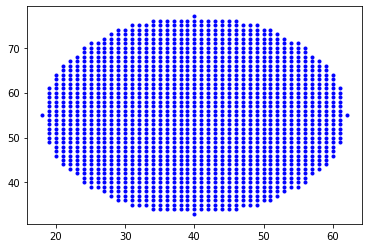

In [296]:
k = 4
for i in range(len(meteo[k])):
    plt.plot(meteo[k][i][0], meteo[k][i][1], '.b')

In [329]:
sx = 10 
sy = 10 
gx = 90   # 50
gy = 70   # 28
sx_init, sy_init = 10, 10

coordx_list = []
coordy_list = []

path_dist = 0
path_dist_list = []
dist = np.hypot(sx - gx, sy - gy)
k = 0
rx_list_finalerrt = []
ry_list_finalerrt = []
list_sxrrt = []
list_syrrt = []
list_sxrrt.append(sx)
list_syrrt.append(sy)
var1 = True
i = 0

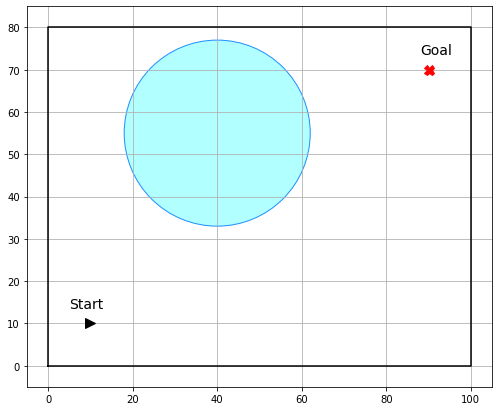

In [304]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx_init, sy_init, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx_init+3, sy_init+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
k = 4
for i in range(len(obstacle_list[i])):
#     ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10, fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10+5*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
    ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10+3*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()
k = 0

In [305]:
start_time = time.time()
while dist >= grid_size:
    try:
        rrt_star = RRTStar(
                start=[sx, sy],
                goal=[gx, gy],
                rand_area=[x_min, x_max, y_min, y_max],
                obstacle_list=obstacle_list,
                k=k,
                speed = 5,
                path_resolution=1.0,
                connect_circle_dist=30, 
                goal_sample_rate=15,
                expand_dis=1)

        path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
#         if path_star is None:
#             print("Cannot find path")
#         else:
        print("Found path!!")
        path_star = list(reversed(path_star))
#         print("Travel time =", str(round(cost_tot/5/3600,4)), "hours")

        q = 0

        while path_dist < 18*(k+1): # km
            if np.hypot(path_star[q][0] - gx, path_star[q][1] - gy) <= 1:
                print("Complete travel in less than {} hours".format(k+1))
                dist = np.hypot(path_star[q][0] - gx, path_star[q][1] - gy)
                break

            path_dist += np.hypot(path_star[q][0] - path_star[q+1][0], path_star[q][1] - path_star[q+1][1])
            if path_dist > 18*(k+1):
                path_dist -= np.hypot(path_star[q][0] - path_star[q+1][0], path_star[q][1] - path_star[q+1][1])
#                 print(path_dist)
                print("path dist must be smaller than {}".format(18*(k+1)))
                break 
            q += 1
        sx = path_star[q][0]
        sy = path_star[q][1]   
        list_sxrrt.append(sx)
        list_syrrt.append(sy)
        coordx_list.append([i[0] for i in path_star])
        coordy_list.append([i[1] for i in path_star])       
        rx_list_finalerrt.extend(i[0] for i in path_star[:q])
        ry_list_finalerrt.extend(i[1] for i in path_star[:q])



    except TypeError:
#         k += 1
        print("Path plan failed")
        print("The algorithm does not found a path because of rough sea in between or in the survey area")
        q_init = coordx_list[-1].index(sx)
        q = coordx_list[-1].index(sx)
        while path_dist < 18*(k+1): # km
            if np.hypot(coordx_list[-1][q] - gx, coordy_list[-1][q] - gy) <= grid_size:
                print("Complete travel in less than {} hours".format(k+1))
                dist = np.hypot(coordx_list[-1][q] - gx, coordy_list[-1][q] - gy)
                break
            path_dist += np.hypot(coordx_list[-1][q] - coordx_list[-1][q+1], coordy_list[-1][q] - coordy_list[-1][q+1])
            # to be conservative I rather use future time window than starting in the future with a past map
            if path_dist > 18*(k+1):  
                path_dist -= np.hypot(coordx_list[-1][q] - coordx_list[-1][q+1], coordy_list[-1][q] - coordy_list[-1][q+1])
                path_dist_list.append(path_dist)
                break 
            q += 1

        sx = coordx_list[-1][q]
        sy = coordy_list[-1][q]
        list_sxrrt.append(sx)
        list_syrrt.append(sy)
        coordx_list.append(coordx_list[-1])  # resave the same path
        coordy_list.append(coordy_list[-1])
        rx_list_finalerrt.extend(coordx_list[-1][q_init:q])
        ry_list_finalerrt.extend(coordy_list[-1][q_init:q])
     
    dist = np.hypot(sx - gx, sy - gy)
    
    k += 1
    for i in range(len(meteo[k])):
        if np.allclose([sx,sy], meteo[k][i], atol=0.05, rtol=0.01):
            print(True)
            rx_list_finalerrt.append(path_star[q][0])
            ry_list_finalerrt.append(path_star[q][1])
            print("USV got lost")
            var1 = False
            break
    if var1:
        print("USV in safe zone")
    else:
        break

print("The computational time is " + str(round(time.time() - start_time, 4)) + " seconds")

Found path!!
path dist must be smaller than 18
USV in safe zone
Found path!!
path dist must be smaller than 36
USV in safe zone
Found path!!
path dist must be smaller than 54
True
USV got lost
The computational time is 0.892 seconds


In [197]:
print(rx_list_finalerrt)
print(path_star)

[10, 18.64059271346302, 23.967245753027598, 32.75097346251229, 32.55335913386031, 32.737348696878676, 33.618894081813956, 44.44066355626027, 49.95366844283805, 51.99697823226409, 59.36052685072478, 63.432456770869, 71.99916546159709, 75.87757944342076, 77.74342288930347]
[[75.87757944342076, 64.54917778018175], [77.74342288930347, 65.26933625958505], [90, 70], [90, 70]]


In [198]:
rx_list_finalerrt.append(path_star[-1][0])
ry_list_finalerrt.append(path_star[-1][1])

In [233]:
rx_list_finalerrt.append(list_sxrrt[-1])
ry_list_finalerrt.append(list_syrrt[-1])

In [231]:
list_sxrrt[-1]

40.21448650208884

In [262]:
k=1
for i in range(len(meteo[k])):
    if np.allclose([list_sxrrt[k],list_syrrt[k]], meteo[k][i], atol=0.05, rtol=0.01):
        print(True)

In [215]:
i = 1

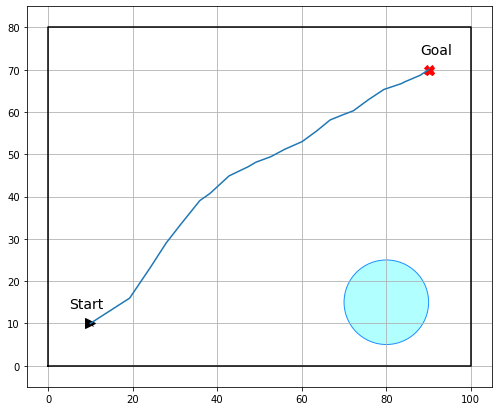

In [307]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx_init, sy_init, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx_init+3, sy_init+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
k = 0
for i in range(len(obstacle_list[k])):
    ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10, fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10+5*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10+3*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(list_sxrrt[k], list_syrrt[k], 'xk', markersize=5)
plt.plot(coordx_list[k], coordy_list[k], '-')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

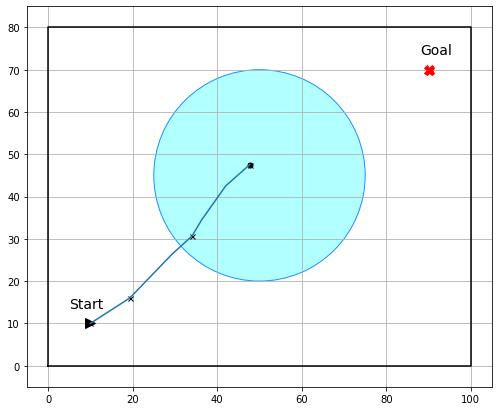

In [318]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx_init, sy_init, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx_init+3, sy_init+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
k = 3
for i in range(len(obstacle_list[i])):
#     ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10, fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
    ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10+5*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(xy=(obstacle_list[k][i][0], obstacle_list[k][i][1]), radius=10+3*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(list_sxrrt, list_syrrt, 'xk', markersize=5)
plt.plot(list_sxrrt[k], list_syrrt[k], '.k', markersize=10)
plt.plot(rx_list_finalerrt, ry_list_finalerrt)
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

In [2379]:
print(list_sxrrt)
print(list_syrrt)

[10, 16.919000561967287, 34.29963518807576, 37.078851170995435, 44.92267768631132]
[10, 15.608127906641434, 31.11948296478778, 48.42289474290833, 59.11810833783785]


In [319]:
# toyrrtglo = [[] for i in range(3)]
# toyrrtglolist = [[] for i in range(3)]
toyrrtglo[2] = [rx_list_finalerrt,ry_list_finalerrt]
toyrrtglolist[2] = [list_sxrrt, list_sxrrt]

In [321]:
import pickle
file_name = "toyrrtglo.pkl"
open_file = open(file_name, "wb")
pickle.dump(toyrrtglo, open_file)
open_file.close()
# file_name = "sum_astary1.pkl"
# open_file = open(file_name, "rb")
# sum_pathy1 = pickle.load(open_file)
# open_file.close()

In [1069]:
grid_size = 0.1 #0.01
rr = 2
step_size, max_iters, goal_threshold = grid_size, 1000, grid_size
step_size_ = grid_size*3

obs = []
# for i in range(len(rrt_obsx)): 
#     obs.append([rrt_obsx[i], rrt_obsy[i]])
# obs.append([50, 40])
for i in range(len(map_x)):    
    obs.append([map_x[i], map_y[i]])

70

### APF

In [1252]:
import math
import random
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import time


class Vector2d:
    def __init__(self, x, y):
        self.deltaX = x
        self.deltaY = y
        self.length = -1
        self.direction = [0, 0]
        self.vector2d_share()

    def vector2d_share(self):
        if type(self.deltaX) == type(list()) and type(self.deltaY) == type(list()):
            deltaX, deltaY = self.deltaX, self.deltaY
            self.deltaX = deltaY[0] - deltaX[0]
            self.deltaY = deltaY[1] - deltaX[1]
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None
        else:
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None

    def __add__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX += other.deltaX
        vec.deltaY += other.deltaY
        vec.vector2d_share()
        return vec

    def __sub__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX -= other.deltaX
        vec.deltaY -= other.deltaY
        vec.vector2d_share()
        return vec

    def __mul__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX *= other
        vec.deltaY *= other
        vec.vector2d_share()
        return vec

    def __truediv__(self, other):
        return self.__mul__(1.0 / other)

    def __repr__(self):
        return 'Vector deltaX:{}, deltaY:{}, length:{}, direction:{}'.format(self.deltaX, self.deltaY, self.length,
                                                                             self.direction)


class APF:

    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        """
        :param start: 起点
        :param goal: 终点
        :param obstacles: 障碍物列表，每个元素为Vector2d对象
        :param k_att: 引力系数
        :param k_rep: 斥力系数
        :param rr: 斥力作用范围
        :param step_size: 步长
        :param max_iters: 最大迭代次数
        :param goal_threshold: 离目标点小于此值即认为到达目标点
        :param is_plot: 是否绘图
        """
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        
    def attractive(self):
        att = (self.goal - self.current_pos) * self.k_att  # conical potential
        return att

    def repulsion(self):
        rep = Vector2d(0, 0)
        for obstacle in self.obstacles:
            # obstacle = Vector2d(0, 0)
            t_vec = self.current_pos - obstacle
            if t_vec.length > self.rr:
                pass
            else:
                rep += Vector2d(t_vec.direction[0], t_vec.direction[1]) * self.k_rep * (
                        1.0 / t_vec.length - 1.0 / self.rr) / (t_vec.length ** 2)  # 方向由障碍物指向机器人
        return rep

    def path_plan(self):
        while self.iters < self.max_iters and (self.current_pos - self.goal).length > self.goal_threshold:
            
            f_vec = self.attractive() + self.repulsion()
            self.current_pos += Vector2d(f_vec.direction[0], f_vec.direction[1]) * self.step_size
            self.iters += 1
            self.path.append([self.current_pos.deltaX, self.current_pos.deltaY])
#             print(self.current_pos.deltaX,self.current_pos.deltaY)
            if self.is_plot:
                plt.plot(self.current_pos.deltaX, self.current_pos.deltaY, '.b')
                plt.pause(self.delta_t)
        if (self.current_pos - self.goal).length <= self.goal_threshold:
            self.is_path_plan_success = True
        
def check_vec_angle(v1: Vector2d, v2: Vector2d):
    v1_v2 = v1.deltaX * v2.deltaX + v1.deltaY * v2.deltaY
    angle = math.acos(v1_v2 / (v1.length * v2.length)) * 180 / math.pi
    return angle

class APF_Improved(APF):
    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr  
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        self.direction = 0
        
#     def repulsion(self):
#         """
#         斥力计算, 改进斥力函数, 解决不可达问题
#         :return: 斥力大小
#         """
#         rep = Vector2d(0, 0) 
#         for obstacle in self.obstacles:
#             obs_to_rob = self.current_pos - obstacle
# #             rob_to_goal = self.goal - self.current_pos
# #             obs_to_goal = self.goal - obstacle
#             if obs_to_rob.length > self.rr:  
#                 pass
#             else:

#                 """rep_1 = Vector2d(obs_to_rob.direction[0], obs_to_rob.direction[1]) * self.k_rep * (
#                         1.0 / obs_to_rob.length - 1.0 / self.rr) / (obs_to_rob.length ** 2) * (rob_to_goal.length ** 2)
#                 rep_2 = Vector2d(rob_to_goal.direction[0], rob_to_goal.direction[1]) * self.k_rep * ((1.0 / obs_to_rob.length - 1.0 / self.rr) ** 2) * rob_to_goal.length
#                 rep +=(rep_1+rep_2)"""

#                 #rep += Vector2d(+obs_to_rob.direction[1], -obs_to_rob.direction[0]) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(9 - (obs_to_rob.deltaX)**2 - (obs_to_rob.deltaY)**2)
#                 #if obs_to_goal <
#                 rep = (Vector2d(obs_to_rob.deltaY, -obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(self.rr**2 - obs_to_rob.deltaX**2 - obs_to_rob.deltaY**2))*100
#                 #if self.current_pos.deltaX < 9.5:
#                 #    rep = (Vector2d(-obs_to_rob.deltaY, +obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX,obs_to_rob.deltaY)*(self.rr ** 2 - obs_to_rob.deltaX ** 2 - obs_to_rob.deltaY ** 2)) * 50
#         return rep
    
    """def repulsion(self):
        rep = Vector2d(0, 0)  # 所有障碍物总斥力
        obstacle = Vector2d(0, 0)          # initialization obstacle
        min_obs = Vector2d(1000, 1000)     # obstacle far away
        obs_to_rob_min = min_obs - self.current_pos
        
        list_dro = []
        list_dpro = []
        list_obs = []
        for obstacle in self.obstacles:
            obs_to_curr = self.current_pos - obstacle
            rob_to_goal = self.goal - self.current_pos
            obs_to_goal = self.goal - obstacle
            curr_to_obs = obstacle - self.current_pos
            
            p1 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
            p2 = np.array([self.goal.deltaX, self.goal.deltaY])
            p3 = np.array([obstacle.deltaX, min_obs.deltaY])
            d_pro = np.cross(p2-p1, p3-p1) / np.linalg.norm(p2-p1)
            if d_pro <= self.rr:  # disturbing obstacles # d_pro
#                 list_dro.append(curr_to_obs.length)
#                 list_dpro.append(d_pro)
                list_obs.append(obstacle)
            obs_to_rob = obstacle - self.current_pos     # D_ro_i 
            if obs_to_rob_min.length > obs_to_rob.length:
                obs_to_rob_min = obs_to_rob
                min_obs = obstacle    # closer obstacle to the robot
                
        #print(f"X:{min_obs.deltaX}, Y:{min_obs.deltaY}")
        obs_to_robinv = min_obs - self.current_pos 
        obs_to_rob = self.current_pos - min_obs
        #print(f"Minima dal ciclo:{obs_to_rob_min.length}, Minima dal calcolo:{obs_to_robinv.length}")
        
        rob_to_goal = self.goal - self.current_pos"""
        
# DEF FATTO COME IL PAPER LOUISE
    def repulsion(self):
        rep = Vector2d(0, 0)  
        obstacle = Vector2d(0, 0)
        list_dro = []   # list of distance robot-obstacle
        list_dpro = []  # list of perpendicular point-line
        list_obs = []   # list of potentially disturbing obstacles
        
        for obstacle in self.obstacles:
            p1 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
            p2 = np.array([self.goal.deltaX, self.goal.deltaY])
            p3 = np.array([obstacle.deltaX, obstacle.deltaY])
            # compute the perpendicular distance between each obstacle and the line of robot-target
            d_pro = np.abs(np.cross(p2-p1,p3-p1) / np.linalg.norm(p2-p1))   # abs is important
            curr_to_obs = obstacle - self.current_pos
#             print(f"d pro is {d_pro}")
            if d_pro <= self.rr-0.01:  # disturbing obstacles # d_pro
                list_dro.append(curr_to_obs.length)
                list_dpro.append(d_pro)
                list_obs.append(obstacle)
                if curr_to_obs.deltaX < -10:  # I'm saying that if the obstacle is overcome, don't consider it anymore
                    list_obs.pop()
                    list_dro.pop()
                    list_dpro.pop()
                    
        
        if len(list_obs) == 0:  #  no disturbing obstacles -> controller OFF
#             print("Controller inactive")
            self.var = False
            rep = Vector2d(0, 0)
            return rep

        min_d_ro = min(list_dro)       # smallest distance from robot
#         print(list_dro)
#         print("------------")
#         er = 0
#         for i in range(len(list_dro)):
#             check = np.allclose(min_d_ro,list_dro[i], rtol=1e-1, atol=1e-1)
#             if check:
#                 er += 1 
#                 if er == 2:
#                     print(check)
#                     print(list_dro)
#         print(min_d_ro)
        temp = list_dro.index(min_d_ro)
        closest_obs = list_obs[temp]     # closest obstacle  
#         print(f"closest obs is {closest_obs.deltaX, closest_obs.deltaY}")
        obs_to_goal = self.goal - closest_obs
        obs_to_curr = self.current_pos - closest_obs
        
        m1 = obs_to_goal.deltaY / obs_to_goal.deltaX
        alpha = np.arctan(m1)
#         print(f"alpha is {m1*180/np.pi}")
        
        alpha_matrix = np.matrix([[np.cos(alpha), -np.sin(alpha),      0,    closest_obs.deltaX], 
                                  [np.sin(alpha),  np.cos(alpha),      0,    closest_obs.deltaY], 
                                  [0,                   0       ,      1,            0         ], 
                                  [0,                   0       ,      0,            1         ]
                                 ])
        alpha_matrix = np.linalg.inv(alpha_matrix)
        robot_array = np.array([self.current_pos.deltaX, self.current_pos.deltaY, 0, 1])
        result = np.matmul(alpha_matrix, robot_array)
        result = np.array(result)
        x0 = result[0][0]
        y0 = result[0][1]
#         print(f"x0 is {x0}")
#         print(f"y0 is {y0}")
#         print(f"obs is {closest_obs.deltaY}")
#         print(f"self.var is {self.var}")
        
        if obs_to_curr.deltaX > 10:
            self.var = False
            print("obs to curr > 10")
  
        
        eps = 0.01
        if x0 < 0:
            r_c = self.rr - eps
        else:
            r_c = self.rr + eps
        
        if y0 >= 0:
            sign = 1
        else:
            sign = -1
        if self.var:  # controller active
            rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
                   ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 10000
#             rep = (Vector2d(-obs_to_curr.deltaY, +obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 100
        else:         # controller was off
            self.direction = sign
            rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
                   ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 10000
#             rep = (Vector2d(-obs_to_curr.deltaY, +obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 100
            self.var = True
            
        return rep

In [1253]:
rr

[10.5, 15.5, 20.5, 25.5, 30.5, 10, 10, 10, 10, 10]

In [1271]:
grid_size = 0.01
# rr = 10.5
rr = [10.5+3*i for i in range(5)]
rr.extend([10,10,10,10,10])
step_size, max_iters, goal_threshold = grid_size, 15000, grid_size
step_size_ = grid_size*3

sx = 10  
sy = 10 
gx = 90   # 50
gy = 70   # 28
sx_init, sy_init = 10, 10

start = (sx, sy)
goal = (gx, gy)

obs = [[] for i in range(10)]
for i in range(5):
    obs[i].append([rrt_obsx[i], rrt_obsy[i]])
obs[5] = [[100,100]]
obs[6] = [[100,100]]
obs[7] = [[100,100]]
obs[8] = [[100,100]]
obs[9] = [[100,100]]
        
apfrx_list = []
apfry_list = []
apfrx_list_finale = []
apfry_list_finale = []
k = 0
path_dist = 0
path_dist_list = []
list_apfsx = []
list_apfsy = []
list_apfsx.append(sx)
list_apfsy.append(sy)
var1 = True
dist = np.hypot(sx - gx, sy - gy)


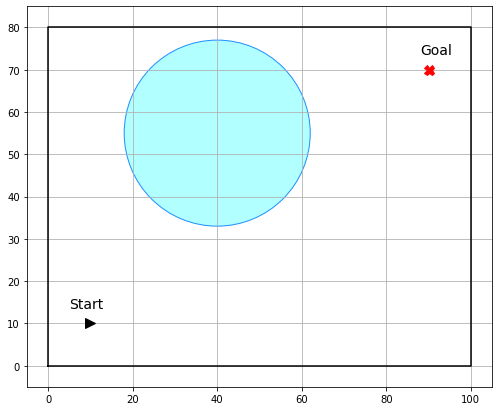

In [1277]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx_init, sy_init, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx_init+3, sy_init+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
k = 4
for i in range(len(obs[i])):
#     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10, fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10+5*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
    ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10+3*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()
k = 0

In [1256]:
# apf = APF_Improved(start, goal, obs[2], 1, 0.8, rr, 0.01, 15000, goal_threshold, False)
# apf.path_plan()
# path = apf.path
# rx = list(np.zeros(len(path)))
# ry = list(np.zeros(len(path)))
# for i in range(len(path)):
#     rx[i], ry[i] = path[i][0], path[i][1]
    
# fig, ax = plt.subplots(1, 1, figsize=(10, 7))
# plt.plot(sx_init, sy_init, ">k", markersize=10)
# plt.plot(gx, gy, "Xr", markersize=10)
# k = 2
# for i in range(len(obs[k])):
#     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10, fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
# #     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10+5*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
# #     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10+3*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
# plt.plot(rx, ry, '-')
# ax.set_aspect('equal', adjustable='box')
# plt.grid()
# plt.xlim(-5, 105)
# plt.ylim(-5, 85)
# plt.show()

In [1278]:
start_time = time.time()
while dist >= grid_size:
    path_cost = 0
    
    apf = APF_Improved(start, goal, obs[k], 1, 0.8, rr[k], step_size, max_iters, goal_threshold, False)
    apf.path_plan()
    path = apf.path
    rx = list(np.zeros(len(path)))
    ry = list(np.zeros(len(path)))
    for i in range(len(path)):
        rx[i], ry[i] = path[i][0], path[i][1]

    for i in range(len(rx)-1):
        path_cost += np.hypot(rx[i] - rx[i+1], ry[i] - ry[i+1])
    print("Travel distance = {} km".format(path_cost))

    if apf.is_path_plan_success:
        print('path plan success')
        q = 0
        while path_dist < 18*(k+1): # km
            if np.hypot(rx[q] - gx, ry[q] - gy) <= grid_size:
                print("Complete travel in less than {} hours".format(k+1))
                dist = np.hypot(rx[q] - gx, ry[q] - gy)
                break
            path_dist += np.hypot(rx[q] - rx[q+1], ry[q] - ry[q+1])

            # to be conservative I rather use future time window than starting in the future with a past map
            if path_dist > 18*(k+1):  
                path_dist -= np.hypot(rx[q] - rx[q+1], ry[q] - ry[q+1])
                path_dist_list.append(path_dist)
                break 
            q += 1

        sx = rx[q]
        sy = ry[q]
        list_apfsx.append(sx)
        list_apfsy.append(sy)
        apfrx_list.append(rx)
        apfry_list.append(ry)
        apfrx_list_finale.extend(rx[:q])
        apfry_list_finale.extend(ry[:q])
    else:
        print("Path plan failed")
        print("The algorithm does not found a path because of rough sea in between or in the survey area")

        q_init = apfrx_list[-1].index(sx)
        q = apfrx_list[-1].index(sx)
        while path_dist < 18*(k+1): # km
            if np.hypot(apfrx_list[-1][q] - gx, apfry_list[-1][q] - gy) <= grid_size:
                print("Complete travel in less than {} hours".format(k+1))
                dist = np.hypot(apfrx_list[-1][q] - gx, apfry_list[-1][q] - gy)
                break
            path_dist += np.hypot(apfrx_list[-1][q] - apfrx_list[-1][q+1], apfry_list[-1][q] -apfry_list[-1][q+1])
            # to be conservative I rather use future time window than starting in the future with a past map
            if path_dist > 18*(k+1):  
                path_dist -= np.hypot(apfrx_list[-1][q] - apfrx_list[-1][q+1], apfry_list[-1][q] -apfry_list[-1][q+1])
                path_dist_list.append(path_dist)
                break 
            q += 1

        sx = apfrx_list[-1][q]
        sy = apfry_list[-1][q]
        list_apfsx.append(sx)
        list_apfsy.append(sy)
        apfrx_list.append(apfrx_list[-1])  # resave the same path
        apfry_list.append(apfry_list[-1])
        apfrx_list_finale.extend(apfrx_list[-1][q_init:q])
        apfry_list_finale.extend(apfry_list[-1][q_init:q])

    dist = np.hypot(sx - gx, sy - gy)
#     print(dist)
    start = (sx, sy)

    k += 1
    for i in range(len(meteo[k])):
        if np.allclose([sx,sy], meteo[k][i], atol=0.05, rtol=0.01):
            print(True)
            apfrx_list_finale.append(rx[q])
            apfry_list_finale.append(ry[q])
            print("USV got lost")
            var1 = False
            break
    if var1:
        print("USV in safe zone")
    else:
        break

# rx_list_finale.extend(rx)
# ry_list_finale.extend(ry)
print("Computational time is {}".format(time.time() - start_time))    

Travel distance = 99.9799999999954 km
path plan success
USV in safe zone
Travel distance = 81.97000000000133 km
path plan success
USV in safe zone
Travel distance = 68.20000000000802 km
path plan success
True
USV got lost
Computational time is 5.5571348667144775


In [1163]:
# print(apfrx_list_finale)
# print(path)

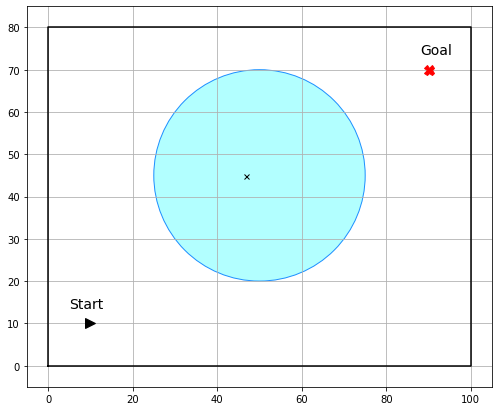

In [1280]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx_init, sy_init, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx_init+3, sy_init+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
k = 3
for i in range(len(obs[k])):
#     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10, fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
    ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10+5*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10+3*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(list_apfsx[k], list_apfsy[k], 'xk', markersize=5)
# plt.plot(apfrx_list[k], apfry_list[k], '-')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

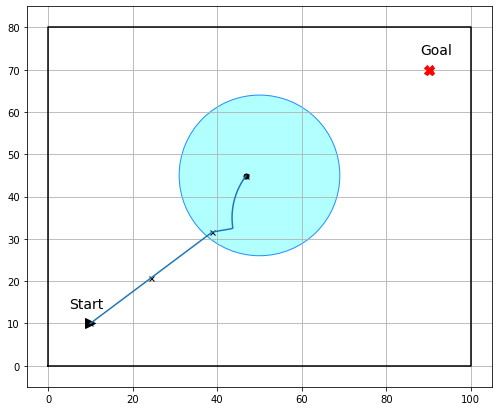

In [1287]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx_init, sy_init, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx_init+3, sy_init+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
k = 3
for i in range(len(obs[i])):
#     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10, fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10+5*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
    ax.add_patch(plt.Circle(xy=(obs[k][i][0], obs[k][i][1]), radius=10+3*k,fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(list_apfsx, list_apfsy, 'xk', markersize=5)
plt.plot(list_apfsx[k], list_apfsy[k], 'ok', markersize=5)
plt.plot(apfrx_list_finale, apfry_list_finale, '-')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

In [1260]:
path_dist = 0
for r in range(len(apfrx_list_finale)-1):
    path_dist += np.hypot(apfrx_list_finale[r+1] - apfrx_list_finale[r], apfry_list_finale[r+1] - apfry_list_finale[r])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

Travel time =  2.0006 hours


In [1268]:
# toyapfglo = [[] for i in range(3)]
# toyapfglolist = [[] for i in range(3)]


In [1288]:
toyapfglo[2] = [apfrx_list_finale, apfry_list_finale]
toyapfglolist[2] = [list_apfsx, list_apfsy]

In [1290]:
import pickle
file_name = "toyapfglolist.pkl"
open_file = open(file_name, "wb")
pickle.dump(toyapfglolist, open_file)
open_file.close()
# file_name = "sum_astary1.pkl"
# open_file = open(file_name, "rb")
# sum_pathy1 = pickle.load(open_file)
# open_file.close()

## LOCAL

### A*

In [1514]:
def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    for x, y in zip(x_[x], y_[y]): 
        yield x, y

map_astar1 = [[] for i in range(5)]
for i in range(5):
    map_astar1[i] = list(points_in_circle_np(10,50,20+(10*i)))

map_astar2 = [[] for i in range(5)]
for i in range(5):
    map_astar2[i] = list(points_in_circle_np(10+5*i,50,40))

map_astar3 = [[] for i in range(5)]
for i in range(5):
    map_astar3[i] = list(points_in_circle_np(10+3*i,80-(i*10),15+(i*10)))

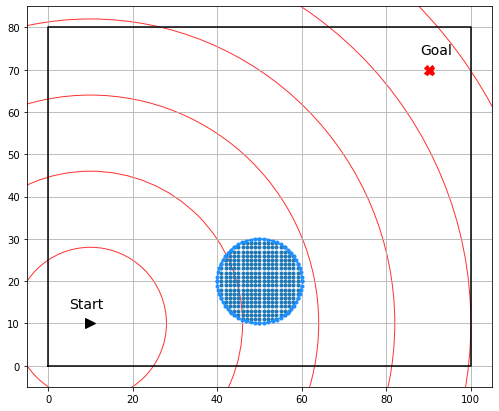

In [1515]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
# for i in range(len(obstacle_list[0])):
#     ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
#     ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=10+5*i,
#                         fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=10+3*i,
#                     fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
# plt.plot(x_obs[0], y_obs[0], '.', color="dodgerblue")
plt.plot([x for (x, y) in map_astar1[0]], [y for (x, y) in map_astar1[0]], ".")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")

for i in range(6):
    ax.add_patch(plt.Circle(xy=(sx, sy), radius=18*(i+1),
                                color='red', alpha=0.8, fill = False))
# for i in range(len(map_astar1)):
#     for j in range(len(map_astar1[i])):
#         plt.plot(map_astar1[i][j][0], map_astar1[i][j][1], ".r")

plt.plot(x_obs[0], y_obs[0], color="dodgerblue", marker=".")
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

In [1777]:
def create_circular_mask(h, w, center=None, radius=None):

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

mask = [np.zeros((80, 100)) for i in range(5)]
# for i in range(5):
#     h, w = 80,100
#     center = (50, 20+10*i)
#     mask[i] = create_circular_mask(h, w, center=center, radius=10)

# for i in range(5):
#     h, w = 80,100
#     center = (50, 40)
#     mask[i] = create_circular_mask(h, w, center=center, radius=10+5*i)

for i in range(5):
    h, w = 80,100
    center = (80-i*10, 15+i*10)
    mask[i] = create_circular_mask(h, w, center=center, radius=10+3*i)

In [1778]:
masksum = np.zeros((80, 100))
for i in range(5-1):
    masksum += np.logical_or(mask[i], mask[i+1]) 
masksum = 100 * (np.array(masksum) > 0)
masksum = np.logical_xor(masksum,binary_erosion(masksum))

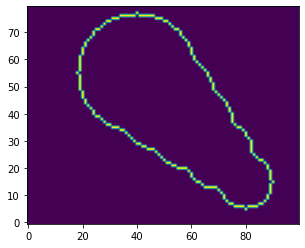

In [1779]:
plt.imshow(masksum, origin="lower")
masksum[50]
x_obsm = []
y_obsm = []
for k in np.arange(0,80,1):
    for j in np.arange(0,100,1):
        if masksum[k][j]:
            x_obsm.append(j)
            y_obsm.append(k)

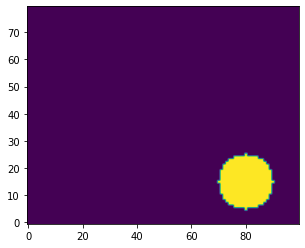

In [1780]:
plt.imshow(mask[0], origin="lower")

In [1781]:
maskfinale = np.zeros((80, 100))
map_x, map_y = [], [] 
oxmeteo, oymeteo =  [], []
for i in range(5):
    for k in range(y_max):
        for j in range(x_max):
            if mask[i][k][j]:
                geo_dist = np.hypot(k-sx, j-sy)
                if 18*(i) < geo_dist < 18*(i+1):
                    oxmeteo.append(j)
                    oymeteo.append(k)
                    maskfinale[k][j] = True
                
map_astar1cont = np.logical_xor(maskfinale,binary_erosion(maskfinale)) 
for k in range(y_max):
    for j in range(x_max):
        if map_astar1cont[k][j]:
            map_x.append(j)
            map_y.append(k) 

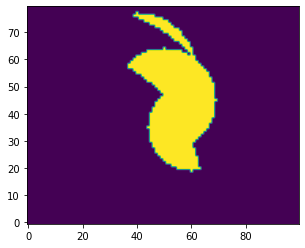

In [1782]:
plt.imshow(maskfinale, origin="lower")

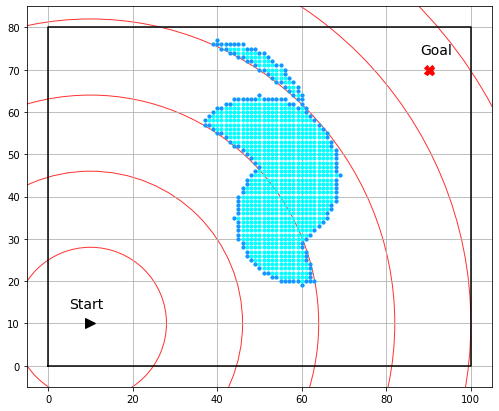

In [1555]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
# for i in range(len(obstacle_list[0])):
#     ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
#     ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=10+5*i,
#                         fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
#     ax.add_patch(plt.Circle(edgecolor="dodgerblue", facecolor="aqua", xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=10+3*i,
#                     fc=to_rgba("aqua",0.3), ec=to_rgba("dodgerblue",1)))
# plt.plot(x_obs[0], y_obs[0], '.', color="dodgerblue")
# plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
for i in range(6):
    ax.add_patch(plt.Circle(xy=(sx, sy), radius=18*(i+1),
                                color='red', alpha=0.8, fill = False))
# for i in range(len(map_astar3[3])):
#         plt.plot(map_astar3[3][i][0], map_astar3[3][i][1], ".b")
plt.plot(oxmeteo, oymeteo, ".", color="aqua")
plt.plot(map_x, map_y, ".", color="dodgerblue")
# plt.plot(x_obsm, y_obsm, ".", color="aqua")
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Computational time is 0.8244237899780273
Travel time =  6.0204 hours


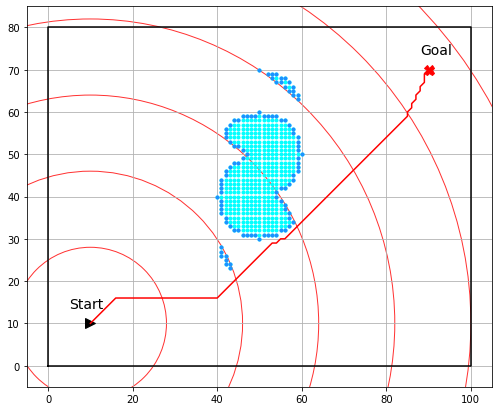

In [336]:
i = 0
start_time = time.time()
a_star = AStarPlanner(map_x, map_y, grid_size, robot_radius, x_min, y_min, x_max, y_max)
rx, ry = a_star.planning(sx, sy, gx, gy)
print("Computational time is {}".format(time.time() - start_time))
rx = list(reversed(rx))
ry = list(reversed(ry))

path_dist = 0
for r in range(len(rx)-1):
    path_dist += np.hypot(rx[r+1] - rx[r], ry[r+1] - ry[r])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
for i in range(6):
    ax.add_patch(plt.Circle(xy=(sx, sy), radius=18*(i+1),
                                color='red', alpha=0.8, fill = False))
plt.plot(oxmeteo, oymeteo, ".", color="aqua")
plt.plot(map_x, map_y, ".", color="dodgerblue")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

In [1499]:
toyastarlocal = [[] for i in range(3)]

In [1602]:
toyastarlocal[2] = [rx, ry]

In [1512]:
import pickle
file_name = "toyastarlocal.pkl"
open_file = open(file_name, "wb")
pickle.dump(toyastarlocal, open_file)
open_file.close()
# file_name = "sum_astary1.pkl"
# open_file = open(file_name, "rb")
# sum_pathy1 = pickle.load(open_file)
# open_file.close()

### RRT*

In [373]:
obstacle_list = [[] for i in range(2)]
for i in range(len(map_x)): # just not to modify the algorithm of RRT*
    obstacle_list[0].append([map_x[i], map_y[i], 1])

In [378]:
rrt_star = RRTStar(
            start=[sx, sy],
            goal=[gx, gy],
            rand_area=[x_min, x_max, y_min, y_max],
            obstacle_list=obstacle_list,
            k = 0,
            speed = 5,
            path_resolution=1.0,
            connect_circle_dist=100,
            goal_sample_rate=15,
            expand_dis=5)

#%matplotlib
start_time = time.time()
path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
path_star = list(reversed(path_star))
end_time = time.time()
if path_star is None:
    print("Cannot find path")
else:
    print("Found path!!")

print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")
# print("Travel time = ", str(round(cost_tot/5/3600,4)), "hours")

path_dist = 0
for i in range(len(path_star)-1):
    path_dist += np.hypot(path_star[i+1][0] - path_star[i][0], path_star[i+1][1] - path_star[i][1])
print("Travel time = ", str(round(path_dist/18,4)), "hours")



Found path!!
The computational time is 7.0689 seconds
Travel time =  6.3826 hours


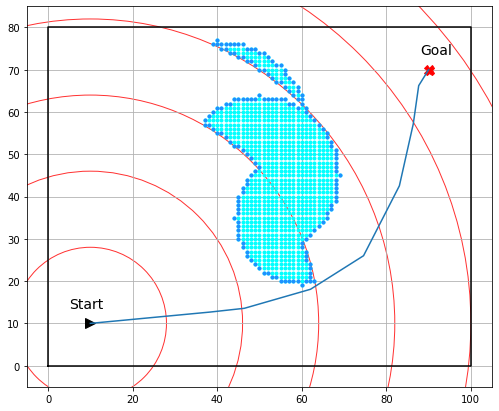

In [379]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')

plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.plot(rx, ry, '-r')
for i in range(6):
    ax.add_patch(plt.Circle(xy=(sx, sy), radius=18*(i+1),
                                color='red', alpha=0.8, fill = False))
plt.plot(oxmeteo, oymeteo, ".", color="aqua")
plt.plot(map_x, map_y, ".", color="dodgerblue")
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

In [348]:
# toyrrtlocal = [[] for i in range(3)]

In [380]:
toyrrtlocal[2] = path_star

In [367]:
toyrrtlocal[1]

[[10, 10],
 [44.834857735137284, 15.443946052879838],
 [66.74455556493531, 17.75378571027666],
 [76.67766943351279, 27.537452498086328],
 [85.16491650752528, 39.70400497312891],
 [85.18851823739115, 44.03924902880409],
 [86.97662019556869, 62.92947212609879],
 [88.94245517531171, 67.52680753178967],
 [90, 70]]

In [381]:
import pickle
file_name = "toyrrtlocal.pkl"
open_file = open(file_name, "wb")
pickle.dump(toyrrtlocal, open_file)
open_file.close()
# file_name = "sum_astary1.pkl"
# open_file = open(file_name, "rb")
# sum_pathy1 = pickle.load(open_file)
# open_file.close()

### APF

In [1061]:
grid_size = 0.1 #0.01
rr = 2
step_size, max_iters, goal_threshold = grid_size, 5000, grid_size
step_size_ = grid_size*3

obs = []
# for i in range(len(rrt_obsx)): 
#     obs.append([rrt_obsx[i], rrt_obsy[i]])
# obs.append([50, 40])
for i in range(len(map_x)):    
    obs.append([map_x[i], map_y[i]])
# for i in range(len(x_obsm)):    
#     obs.append([x_obsm[i], y_obsm[i]])
# for i in range(len(x_obs)):
#     obs.append([x_obs[i], y_obs[i]])
start = (sx, sy)
goal = (gx, gy)

In [913]:
import math
import random
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import time


class Vector2d:
    def __init__(self, x, y):
        self.deltaX = x
        self.deltaY = y
        self.length = -1
        self.direction = [0, 0]
        self.vector2d_share()

    def vector2d_share(self):
        if type(self.deltaX) == type(list()) and type(self.deltaY) == type(list()):
            deltaX, deltaY = self.deltaX, self.deltaY
            self.deltaX = deltaY[0] - deltaX[0]
            self.deltaY = deltaY[1] - deltaX[1]
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None
        else:
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None

    def __add__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX += other.deltaX
        vec.deltaY += other.deltaY
        vec.vector2d_share()
        return vec

    def __sub__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX -= other.deltaX
        vec.deltaY -= other.deltaY
        vec.vector2d_share()
        return vec

    def __mul__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX *= other
        vec.deltaY *= other
        vec.vector2d_share()
        return vec

    def __truediv__(self, other):
        return self.__mul__(1.0 / other)

    def __repr__(self):
        return 'Vector deltaX:{}, deltaY:{}, length:{}, direction:{}'.format(self.deltaX, self.deltaY, self.length,
                                                                             self.direction)


class APF:

    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        """
        :param start: 起点
        :param goal: 终点
        :param obstacles: 障碍物列表，每个元素为Vector2d对象
        :param k_att: 引力系数
        :param k_rep: 斥力系数
        :param rr: 斥力作用范围
        :param step_size: 步长
        :param max_iters: 最大迭代次数
        :param goal_threshold: 离目标点小于此值即认为到达目标点
        :param is_plot: 是否绘图
        """
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        
    def attractive(self):
        att = (self.goal - self.current_pos) * self.k_att  # conical potential
        return att

    def repulsion(self):
        rep = Vector2d(0, 0)
        for obstacle in self.obstacles:
            # obstacle = Vector2d(0, 0)
            t_vec = self.current_pos - obstacle
            if t_vec.length > self.rr:
                pass
            else:
                rep += Vector2d(t_vec.direction[0], t_vec.direction[1]) * self.k_rep * (
                        1.0 / t_vec.length - 1.0 / self.rr) / (t_vec.length ** 2)  # 方向由障碍物指向机器人
        return rep

    def path_plan(self):
        while self.iters < self.max_iters and (self.current_pos - self.goal).length > self.goal_threshold:
            
            f_vec = self.attractive() + self.repulsion()
            self.current_pos += Vector2d(f_vec.direction[0], f_vec.direction[1]) * self.step_size
            self.iters += 1
            self.path.append([self.current_pos.deltaX, self.current_pos.deltaY])
#             print(self.current_pos.deltaX,self.current_pos.deltaY)
            if self.is_plot:
                plt.plot(self.current_pos.deltaX, self.current_pos.deltaY, '.b')
                plt.pause(self.delta_t)
        if (self.current_pos - self.goal).length <= self.goal_threshold:
            self.is_path_plan_success = True
        
def check_vec_angle(v1: Vector2d, v2: Vector2d):
    v1_v2 = v1.deltaX * v2.deltaX + v1.deltaY * v2.deltaY
    angle = math.acos(v1_v2 / (v1.length * v2.length)) * 180 / math.pi
    return angle

class APF_Improved(APF):
    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr  
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        self.direction = 0
        
#     def repulsion(self):
#         """
#         斥力计算, 改进斥力函数, 解决不可达问题
#         :return: 斥力大小
#         """
#         rep = Vector2d(0, 0) 
#         for obstacle in self.obstacles:
#             obs_to_rob = self.current_pos - obstacle
# #             rob_to_goal = self.goal - self.current_pos
# #             obs_to_goal = self.goal - obstacle
#             if obs_to_rob.length > self.rr:  
#                 pass
#             else:

#                 """rep_1 = Vector2d(obs_to_rob.direction[0], obs_to_rob.direction[1]) * self.k_rep * (
#                         1.0 / obs_to_rob.length - 1.0 / self.rr) / (obs_to_rob.length ** 2) * (rob_to_goal.length ** 2)
#                 rep_2 = Vector2d(rob_to_goal.direction[0], rob_to_goal.direction[1]) * self.k_rep * ((1.0 / obs_to_rob.length - 1.0 / self.rr) ** 2) * rob_to_goal.length
#                 rep +=(rep_1+rep_2)"""

#                 #rep += Vector2d(+obs_to_rob.direction[1], -obs_to_rob.direction[0]) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(9 - (obs_to_rob.deltaX)**2 - (obs_to_rob.deltaY)**2)
#                 #if obs_to_goal <
#                 rep = (Vector2d(obs_to_rob.deltaY, -obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(self.rr**2 - obs_to_rob.deltaX**2 - obs_to_rob.deltaY**2))*100
#                 #if self.current_pos.deltaX < 9.5:
#                 #    rep = (Vector2d(-obs_to_rob.deltaY, +obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX,obs_to_rob.deltaY)*(self.rr ** 2 - obs_to_rob.deltaX ** 2 - obs_to_rob.deltaY ** 2)) * 50
#         return rep
    
    """def repulsion(self):
        rep = Vector2d(0, 0)  # 所有障碍物总斥力
        obstacle = Vector2d(0, 0)          # initialization obstacle
        min_obs = Vector2d(1000, 1000)     # obstacle far away
        obs_to_rob_min = min_obs - self.current_pos
        
        list_dro = []
        list_dpro = []
        list_obs = []
        for obstacle in self.obstacles:
            obs_to_curr = self.current_pos - obstacle
            rob_to_goal = self.goal - self.current_pos
            obs_to_goal = self.goal - obstacle
            curr_to_obs = obstacle - self.current_pos
            
            p1 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
            p2 = np.array([self.goal.deltaX, self.goal.deltaY])
            p3 = np.array([obstacle.deltaX, min_obs.deltaY])
            d_pro = np.cross(p2-p1, p3-p1) / np.linalg.norm(p2-p1)
            if d_pro <= self.rr:  # disturbing obstacles # d_pro
#                 list_dro.append(curr_to_obs.length)
#                 list_dpro.append(d_pro)
                list_obs.append(obstacle)
            obs_to_rob = obstacle - self.current_pos     # D_ro_i 
            if obs_to_rob_min.length > obs_to_rob.length:
                obs_to_rob_min = obs_to_rob
                min_obs = obstacle    # closer obstacle to the robot
                
        #print(f"X:{min_obs.deltaX}, Y:{min_obs.deltaY}")
        obs_to_robinv = min_obs - self.current_pos 
        obs_to_rob = self.current_pos - min_obs
        #print(f"Minima dal ciclo:{obs_to_rob_min.length}, Minima dal calcolo:{obs_to_robinv.length}")
        
        rob_to_goal = self.goal - self.current_pos"""
        
# DEF FATTO COME IL PAPER LOUISE
    def repulsion(self):
        rep = Vector2d(0, 0)  
        obstacle = Vector2d(0, 0)
        list_dro = []   # list of distance robot-obstacle
        list_dpro = []  # list of perpendicular point-line
        list_obs = []   # list of potentially disturbing obstacles
        
        for obstacle in self.obstacles:
            p1 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
            p2 = np.array([self.goal.deltaX, self.goal.deltaY])
            p3 = np.array([obstacle.deltaX, obstacle.deltaY])
            # compute the perpendicular distance between each obstacle and the line of robot-target
            d_pro = np.abs(np.cross(p2-p1,p3-p1) / np.linalg.norm(p2-p1))   # abs is important
            curr_to_obs = obstacle - self.current_pos
#             print(f"d pro is {d_pro}")
            if d_pro <= self.rr-0.01:  # disturbing obstacles # d_pro
                list_dro.append(curr_to_obs.length)
                list_dpro.append(d_pro)
                list_obs.append(obstacle)
                if curr_to_obs.deltaX < -2:  # I'm saying that if the obstacle is overcome, don't consider it anymore
                    list_obs.pop()
                    list_dro.pop()
                    list_dpro.pop()
                    
        
        if len(list_obs) == 0:  #  no disturbing obstacles -> controller OFF
#             print("Controller inactive")
            self.var = False
            rep = Vector2d(0, 0)
            return rep

        min_d_ro = min(list_dro)       # smallest distance from robot
#         print(list_dro)
#         print("------------")
#         er = 0
#         for i in range(len(list_dro)):
#             check = np.allclose(min_d_ro,list_dro[i], rtol=1e-1, atol=1e-1)
#             if check:
#                 er += 1 
#                 if er == 2:
#                     print(check)
#                     print(list_dro)
#         print(min_d_ro)
        temp = list_dro.index(min_d_ro)
        closest_obs = list_obs[temp]     # closest obstacle  
#         print(f"closest obs is {closest_obs.deltaX, closest_obs.deltaY}")
        obs_to_goal = self.goal - closest_obs
        obs_to_curr = self.current_pos - closest_obs
        if obs_to_goal.deltaX == 0:
            alpha = np.pi/2
        else: 
            m1 = obs_to_goal.deltaY / obs_to_goal.deltaX
            alpha = np.arctan(m1)
#         print(f"alpha is {m1*180/np.pi}")
        
        alpha_matrix = np.matrix([[np.cos(alpha), -np.sin(alpha),      0,    closest_obs.deltaX], 
                                  [np.sin(alpha),  np.cos(alpha),      0,    closest_obs.deltaY], 
                                  [0,                   0       ,      1,            0         ], 
                                  [0,                   0       ,      0,            1         ]
                                 ])
        alpha_matrix = np.linalg.inv(alpha_matrix)
        robot_array = np.array([self.current_pos.deltaX, self.current_pos.deltaY, 0, 1])
        result = np.matmul(alpha_matrix, robot_array)
        result = np.array(result)
        x0 = result[0][0]
        y0 = result[0][1]
#         print(f"x0 is {x0}")
#         print(f"y0 is {y0}")
#         print(f"obs is {closest_obs.deltaY}")
#         print(f"self.var is {self.var}")
        
        if obs_to_curr.deltaX > 3:
            self.var = False
            print("obs to curr > 3")
  
        
        eps = 0.01
        if x0 < 0:
            r_c = self.rr - eps
        else:
            r_c = self.rr + eps
        
        if y0 >= 0:
            sign = 1
        else:
            sign = -1
        if self.var:  # controller active
#             rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 10000
            rep = (Vector2d(-obs_to_curr.deltaY, +obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
                   ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 10000
        else:         # controller was off
            self.direction = sign
#             rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 10000
            rep = (Vector2d(-obs_to_curr.deltaY, +obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
                   ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 10000
            self.var = True
            
        return rep

In [619]:
start_time = time.time()

apf = APF_Improved(start, goal, obs, 1, 0.8, rr, step_size, max_iters, goal_threshold, False)
apf.path_plan()
print("Computational time is {} seconds".format(time.time() - start_time))

path = apf.path
path_ = []
i = int(step_size_ / step_size)
while i < len(path):
    path_.append(path[i])
    i += int(step_size_ / step_size)
if path_[-1] != path[-1]:  # 添加最后一个点
    path_.append(path[-1])
# print('planed path points:{}'.format(path_))
if apf.is_path_plan_success:
    print('path plan success')
else:
    print('path plan failed')

sx = 10
sy = 10
# x = [sx]
# y = [sy]
x = []
y = []
for i in range(len(path)):
    x.append(path[i][0])
    y.append(path[i][1])
    
path_dist = 0
for i in range(len(x)-1):
    path_dist += np.hypot(x[i+1] - x[i], y[i+1] - y[i])
print("Travel time = ", str(round(path_dist/18,4)), "hours")


Computational time is 5.669361352920532 seconds
path plan success
Travel time =  10.1111 hours


NameError: name 'oxmeteo' is not defined

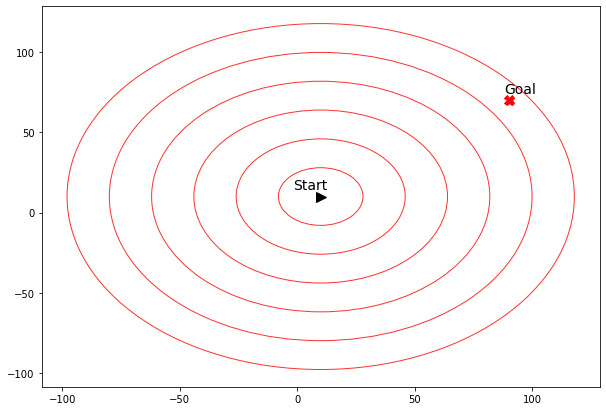

In [620]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx+3, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')

for i in range(6):
    ax.add_patch(plt.Circle(xy=(sx, sy), radius=18*(i+1),
                                color='red', alpha=0.8, fill = False))
plt.plot(oxmeteo, oymeteo, ".", color="aqua")
plt.plot(map_x, map_y, ".", color="dodgerblue")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
for i in range(6):
    ax.add_patch(plt.Circle(xy=(sx, sy), radius=18*(i+1),
                                color='red', alpha=0.8, fill = False))
plt.plot(x, y, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

In [1042]:
# toyapflocal = [[] for i in range(3)]


In [1065]:
toyapflocal[2] = [x, y]

In [1066]:
import pickle
file_name = "toyapflocal.pkl"
open_file = open(file_name, "wb")
pickle.dump(toyapflocal, open_file)
open_file.close()
# file_name = "sum_astary1.pkl"
# open_file = open(file_name, "rb")
# sum_pathy1 = pickle.load(open_file)
# open_file.close()

## Final plots toy examples

In [1664]:
# import pickle
# file_name = "toyastarglo.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(toyastarglo, open_file)
# open_file.close()
file_name = "toyrrtsum.pkl"
open_file = open(file_name, "rb")
toyrrtsum = pickle.load(open_file)
open_file.close()

In [1314]:
for i in toyrrtsum[k]:
    print(i[0])

10
13.239184262201972
28.600830455504074
40.468526309057616
42.03413483163898
44.20456596165575
46.607961199952506
50.668584510308634
63.77423030789721
75.07951004838496
90
90


### SUM

In [1666]:
# toyrrtsum

In [1688]:
k = 2
xrrt = []
yrrt = []
xrrt.extend([i[0] for i in toyrrtsum[k]]) 
yrrt.extend([i[1] for i in toyrrtsum[k]]) 

xapf = []
yapf = []
xapf.extend([i for i in toyapfsum[k][0]]) 
yapf.extend([i for i in toyapfsum[k][1]]) 

xast = []
yast = []
xast.extend([i for i in toyastarsum[k][0]]) 
yast.extend([i for i in toyastarsum[k][1]]) 

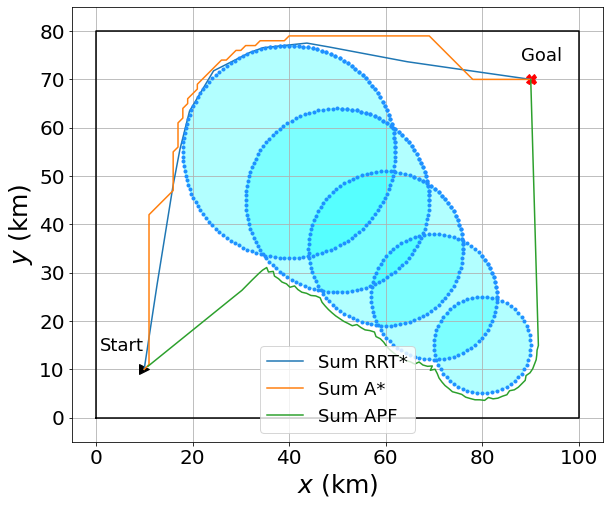

In [1695]:
sx, sy = 10, 10
gx, gy = 90, 70
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=18,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=18,
                    ha='left',va='bottom',color='k')

plt.plot(xrrt, yrrt, "-", label='Sum RRT*')
plt.plot(xast, yast, "-", label='Sum A*')
plt.plot(xapf, yapf, "-", label='Sum APF')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
for i in range(len(x_obsgrande)):
#     ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
#     ax.add_patch(plt.Circle(xy=(50, 40), radius=10+5*i, color='aqua', alpha=0.3))
    ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10+3*i, color='aqua', alpha=0.3))
plt.plot(x_obs_sum, y_obs_sum, '.', color="dodgerblue")
ax.set_aspect('equal', adjustable='box')
ax.legend(prop={"size":18}, loc="lower center")
plt.grid()
ax.set_xlabel("$x$ (km)", fontsize=25)
ax.set_ylabel("$y$ (km)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.savefig("toysum3.png", dpi=300, bbox_inches='tight')
plt.show()

### GLOBAL

In [1697]:
# toyrrtglo

In [1760]:
k = 2
xrrt = []
yrrt = []
xrrtlist = []
yrrtlist = []
xrrt.extend([i for i in toyrrtglo[k][0]]) 
yrrt.extend([i for i in toyrrtglo[k][0]]) 
xrrtlist.extend([i for i in toyrrtglolist[k][0]]) 
yrrtlist.extend([i for i in toyrrtglolist[k][1]]) 

xapf = []
yapf = []
xapflist = []
yapflist = []
xapf.extend([i for i in toyapfglo[k][0]]) 
yapf.extend([i for i in toyapfglo[k][1]]) 
xapflist.extend([i for i in toyapfglolist[k][0]]) 
yapflist.extend([i for i in toyapfglolist[k][1]]) 
xast = []
yast = []
xastlist = []
yastlist = []
xast.extend([i for i in toyastarglo[k][0]]) 
yast.extend([i for i in toyastarglo[k][1]]) 
xastlist.extend([i for i in toyastarglolist[k][0]]) 
yastlist.extend([i for i in toyastarglolist[k][1]]) 


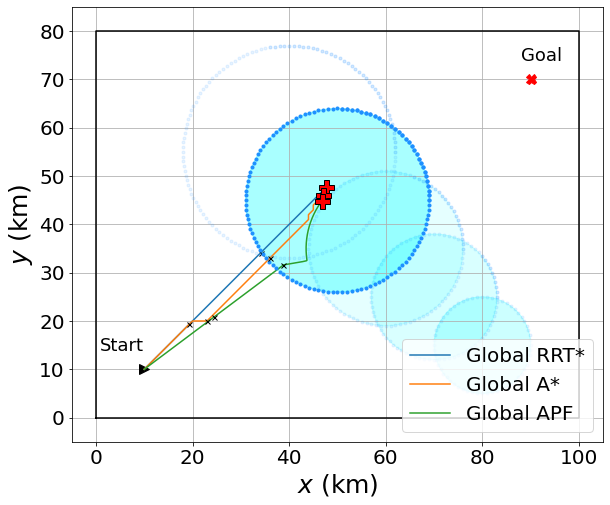

In [1763]:
sx, sy = 10, 10
gx, gy = 90, 70
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=18,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=18,
                    ha='left',va='bottom',color='k')

plt.plot(xrrt, yrrt, "-", label='Global RRT*')
plt.plot(xast, yast, '-', label='Global A*')
plt.plot(xapf, yapf, '-', label='Global APF')
plt.plot(xrrtlist[1:-1], yrrtlist[1:-1], "xk", markersize=5)

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(x_obs_sum, y_obs_sum, ".", color="dodgerblue", alpha=0.1)
for i in range(len(x_obsgrande)):
#     ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.2 - (0.05*i)))
#     ax.add_patch(plt.Circle(xy=(50, 40), radius=10+5*i, color='aqua', alpha=0.2 - (0.025*i)))
    ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10+3*i, color='aqua', alpha=0.2 - (0.05*i)))
i = 3 # time window
# ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10, color='aqua', alpha=0.3))
# ax.add_patch(plt.Circle(xy=(50, 40), radius=10+5*i, color='aqua', alpha=0.3))
ax.add_patch(plt.Circle(xy=(x_obsgrande[i], y_obsgrande[i]), radius=10+3*i, color='aqua', alpha=0.3))
# plt.plot(oxmeteo, oymeteo, ".", color="aqua")
# plt.plot(map_x, map_y, ".", color="dodgerblue")
plt.plot(x_obs[i], y_obs[i], ".", color="dodgerblue")
plt.plot(xrrtlist[-1], yrrtlist[-1], 'Pr', markersize=15, markeredgecolor='k')
plt.plot(xastlist[1:-1], yastlist[1:-1], 'xk', markersize=5)
plt.plot(xastlist[-1], yastlist[-1], 'Pr', markersize=15, markeredgecolor='k')
plt.plot(xapflist[1:-1], yapflist[1:-1], 'xk', markersize=5)
plt.plot(xapflist[-1], yapflist[-1], 'Pr', markersize=15, markeredgecolor='k')

ax.set_aspect('equal', adjustable='box')
ax.legend(prop={"size":20}, loc="lower right")
ax.set_xlabel("$x$ (km)", fontsize=25)
ax.set_ylabel("$y$ (km)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.savefig("toyglo3.png", dpi=300, bbox_inches='tight')
plt.show()

### LOCAL

In [1775]:
k = 2
xrrt = []
yrrt = []
xrrt.extend([i[0] for i in toyrrtlocal[k]]) 
yrrt.extend([i[1] for i in toyrrtlocal[k]]) 

xapf = []
yapf = []
xapf.extend([i for i in toyapflocal[k][0]]) 
yapf.extend([i for i in toyapflocal[k][1]]) 
xast = []
yast = []
xast.extend([i for i in toyastarlocal[k][0]]) 
yast.extend([i for i in toyastarlocal[k][1]])

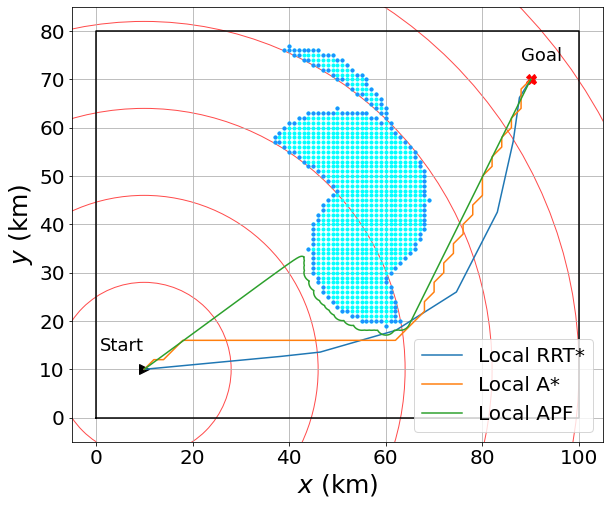

In [1784]:
sx, sy = 10, 10
gx, gy = 90, 70
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=18,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=18,
                    ha='left',va='bottom',color='k')

plt.plot(xrrt, yrrt, "-", label='Local RRT*')
plt.plot(xast, yast, '-', label='Local A*')
plt.plot(xapf, yapf, '-', label='Local APF')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(oxmeteo, oymeteo, ".", color="aqua")
plt.plot(map_x, map_y, ".", color="dodgerblue")
for i in range(6):
    ax.add_patch(plt.Circle(xy=(sx, sy), radius=18*(i+1),
                                color='red', alpha=0.7, fill = False))
ax.set_aspect('equal', adjustable='box')
ax.legend(prop={"size":20}, loc="lower right")
ax.set_xlabel("$x$ (km)", fontsize=25)
ax.set_ylabel("$y$ (km)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.savefig("toyloc3.png", dpi=300, bbox_inches='tight')
plt.show()

# Comparison between RRT*, A*, APF

In [10]:
import cv2 as cv
for i in range(5):
    print(np.random.randint(0,10))
    
len(center)

6
9
2
8
6


10

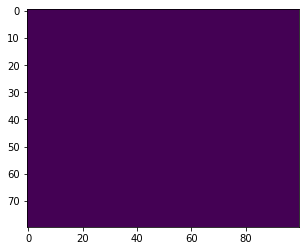

In [507]:
mask = np.zeros((80, 100))
plt.imshow(mask)
plt.show()

def create_circular_mask(h, w, center=None, radius=None):

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask


center = []
for i in range(20):
    a = np.random.randint(10,90)
    b = np.random.randint(10,90)
    center.append((a,b))
#     center = [(np.random.randint, 30), (40, 40), (30,60)]
mask = [np.zeros((80, 100)) for i in range(len(center))]
h, w = 80,100
for i in range(len(center)):
    mask[i] = create_circular_mask(h, w, center=center[i], radius=np.random.randint(2,8))

In [1311]:
def create_circular_mask(h, w, center=None, radius=None):

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask


# center = [(47,50), (53, 52), (65, 43), (60, 49), (68,37), (67,31)] # (62,28), (65,35), (49,54), (44,50)]
center = [(46,56), (52, 57), (58, 53), (63, 47), (66,39), (63,34)]

ushapemask2 = [np.zeros((80, 100)) for i in range(len(center))]
h, w = 80,100
for i in range(len(center)):
    ushapemask2[i] = create_circular_mask(h, w, center=center[i], radius=5)
    

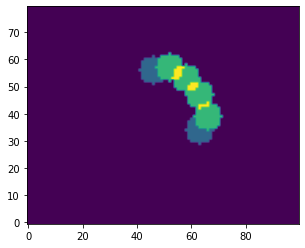

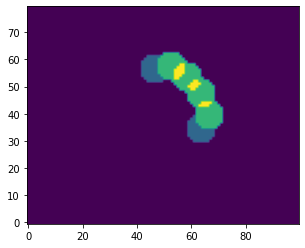

In [1312]:
ushapemask2sum = np.zeros((80, 100))
for i in range(len(ushapemask2)-1):
    ushapemask2sum += np.logical_or(ushapemask2[i], ushapemask2[i+1]) 
    
plt.imshow(ushapemask2sum, origin="lower")
plt.show()

kernel = np.array([[0,1,1,0], [1,1,1,1], [1,1,1,1], [0,1,1,0]], dtype=np.uint8)
dilation = cv.dilate(ushapemask2sum,kernel,iterations = 1)

kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(dilation,kernel,iterations = 1)

plt.imshow(erosion, origin="lower")
plt.show()

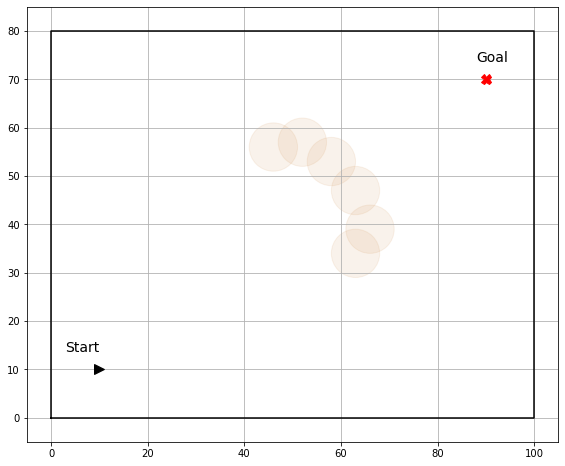

In [1332]:
cont_ushapemask2sum = np.logical_xor(erosion,binary_erosion(erosion))

ushape2_x, ushape2_y = [], [] 
ushape2mask_x, ushape2mask_y = [], [] 
for k in range(y_max):
    for j in range(x_max):
        if erosion[k][j]:
            ushape2mask_x.append(j)
            ushape2mask_y.append(k)             
        if cont_ushapemask2sum[k][j]:
            ushape2_x.append(j)
            ushape2_y.append(k) 
            
sx, sy = 10, 10
gx, gy = 90, 70
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.plot(ushape2mask_x, ushape2mask_y, ".", color="wheat")
# plt.plot(ushape2_x, ushape2_y, ".", color="goldenrod")
for i in range(len(center)):
    ax.add_patch(plt.Circle(xy=(center[i][0], center[i][1]), radius=5, color='peru', alpha=0.1))
ax.set_aspect('equal', adjustable='box')
# ax.legend(prop={"size":20}, loc="lower right")
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
# plt.savefig("scenario1alg.png", dpi=300)
plt.show()

In [1314]:
center

[(46, 56), (52, 57), (58, 53), (63, 47), (66, 39), (63, 34)]

In [1405]:
grid_size = 0.1
rr = 5.4 #5.2
step_size, max_iters, goal_threshold = grid_size, 2000, grid_size
step_size_ = grid_size*3

obs = []
for i in range(len(center)):
    obs.append([center[i][0], center[i][1]])

start = (sx, sy)
goal = (gx, gy)

start_time = time.time()
apf = APF_Improved(start, goal, obs, 1, 0.8, rr, step_size, max_iters, goal_threshold, False)
apf.path_plan()
print("Computational time is {} seconds".format(time.time() - start_time))

Computational time is 0.8714280128479004 seconds


path plan success
Travel time =  7.7556 hours


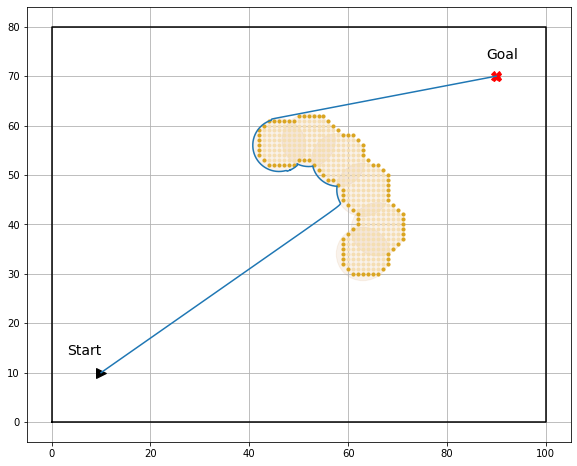

In [1406]:
path = apf.path
path_ = []
i = int(step_size_ / step_size)
while i < len(path):
    path_.append(path[i])
    i += int(step_size_ / step_size)
if path_[-1] != path[-1]:  # 添加最后一个点
    path_.append(path[-1])
# print('planed path points:{}'.format(path_))
if apf.is_path_plan_success:
    print('path plan success')
else:
    print('path plan failed')

sx = 10
sy = 10
x = [sx]
y = [sy]
for i in range(len(path)):
    x.append(path[i][0])
    y.append(path[i][1])
    
path_dist = 0
for i in range(len(x)-1):
    path_dist += np.hypot(x[i+1] - x[i], y[i+1] - y[i])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0], start[1]+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
plt.plot(ushape2mask_x, ushape2mask_y, ".", color="wheat")
plt.plot(ushape2_x, ushape2_y, ".", color="goldenrod")

for i in range(len(center)):
    ax.add_patch(plt.Circle(xy=(center[i][0], center[i][1]), radius=rr, color='peru', alpha=0.1))
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(x,y, "-")
ax.set_aspect('equal', adjustable='box')
plt.grid()
# plt.savefig('apf2.png', dpi=300)
plt.show()

In [1499]:
import math
import random
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import time


class Vector2d:
    def __init__(self, x, y):
        self.deltaX = x
        self.deltaY = y
        self.length = -1
        self.direction = [0, 0]
        self.vector2d_share()

    def vector2d_share(self):
        if type(self.deltaX) == type(list()) and type(self.deltaY) == type(list()):
            deltaX, deltaY = self.deltaX, self.deltaY
            self.deltaX = deltaY[0] - deltaX[0]
            self.deltaY = deltaY[1] - deltaX[1]
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None
        else:
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None

    def __add__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX += other.deltaX
        vec.deltaY += other.deltaY
        vec.vector2d_share()
        return vec

    def __sub__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX -= other.deltaX
        vec.deltaY -= other.deltaY
        vec.vector2d_share()
        return vec

    def __mul__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX *= other
        vec.deltaY *= other
        vec.vector2d_share()
        return vec

    def __truediv__(self, other):
        return self.__mul__(1.0 / other)

    def __repr__(self):
        return 'Vector deltaX:{}, deltaY:{}, length:{}, direction:{}'.format(self.deltaX, self.deltaY, self.length,
                                                                             self.direction)


class APF:

    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        """
        :param start: 起点
        :param goal: 终点
        :param obstacles: 障碍物列表，每个元素为Vector2d对象
        :param k_att: 引力系数
        :param k_rep: 斥力系数
        :param rr: 斥力作用范围
        :param step_size: 步长
        :param max_iters: 最大迭代次数
        :param goal_threshold: 离目标点小于此值即认为到达目标点
        :param is_plot: 是否绘图
        """
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        
    def attractive(self):
        att = (self.goal - self.current_pos) * self.k_att  # conical potential
        return att

    def repulsion(self):
        rep = Vector2d(0, 0)
        for obstacle in self.obstacles:
            # obstacle = Vector2d(0, 0)
            t_vec = self.current_pos - obstacle
            if t_vec.length > self.rr:
                pass
            else:
                rep += Vector2d(t_vec.direction[0], t_vec.direction[1]) * self.k_rep * (
                        1.0 / t_vec.length - 1.0 / self.rr) / (t_vec.length ** 2)  # 方向由障碍物指向机器人
        return rep

    def path_plan(self):
        while self.iters < self.max_iters and (self.current_pos - self.goal).length > self.goal_threshold:
            
            f_vec = self.attractive() + self.repulsion()
            self.current_pos += Vector2d(f_vec.direction[0], f_vec.direction[1]) * self.step_size
            self.iters += 1
            self.path.append([self.current_pos.deltaX, self.current_pos.deltaY])
#             print(self.current_pos.deltaX,self.current_pos.deltaY)
            if self.is_plot:
                plt.plot(self.current_pos.deltaX, self.current_pos.deltaY, '.b')
                plt.pause(self.delta_t)
        if (self.current_pos - self.goal).length <= self.goal_threshold:
            self.is_path_plan_success = True
        
def check_vec_angle(v1: Vector2d, v2: Vector2d):
    v1_v2 = v1.deltaX * v2.deltaX + v1.deltaY * v2.deltaY
    angle = math.acos(v1_v2 / (v1.length * v2.length)) * 180 / math.pi
    return angle

class APF_Improved(APF):
    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False, var = False):
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr  
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threshold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01
        self.var = var
        self.direction = 0
        
#     def repulsion(self):
#         """
#         斥力计算, 改进斥力函数, 解决不可达问题
#         :return: 斥力大小
#         """
#         rep = Vector2d(0, 0) 
#         for obstacle in self.obstacles:
#             obs_to_rob = self.current_pos - obstacle
# #             rob_to_goal = self.goal - self.current_pos
# #             obs_to_goal = self.goal - obstacle
#             if obs_to_rob.length > self.rr:  
#                 pass
#             else:

#                 """rep_1 = Vector2d(obs_to_rob.direction[0], obs_to_rob.direction[1]) * self.k_rep * (
#                         1.0 / obs_to_rob.length - 1.0 / self.rr) / (obs_to_rob.length ** 2) * (rob_to_goal.length ** 2)
#                 rep_2 = Vector2d(rob_to_goal.direction[0], rob_to_goal.direction[1]) * self.k_rep * ((1.0 / obs_to_rob.length - 1.0 / self.rr) ** 2) * rob_to_goal.length
#                 rep +=(rep_1+rep_2)"""

#                 #rep += Vector2d(+obs_to_rob.direction[1], -obs_to_rob.direction[0]) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(9 - (obs_to_rob.deltaX)**2 - (obs_to_rob.deltaY)**2)
#                 #if obs_to_goal <
#                 rep = (Vector2d(obs_to_rob.deltaY, -obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX, obs_to_rob.deltaY)*(self.rr**2 - obs_to_rob.deltaX**2 - obs_to_rob.deltaY**2))*100
#                 #if self.current_pos.deltaX < 9.5:
#                 #    rep = (Vector2d(-obs_to_rob.deltaY, +obs_to_rob.deltaX) + Vector2d(obs_to_rob.deltaX,obs_to_rob.deltaY)*(self.rr ** 2 - obs_to_rob.deltaX ** 2 - obs_to_rob.deltaY ** 2)) * 50
#         return rep
    
    """def repulsion(self):
        rep = Vector2d(0, 0)  # 所有障碍物总斥力
        obstacle = Vector2d(0, 0)          # initialization obstacle
        min_obs = Vector2d(1000, 1000)     # obstacle far away
        obs_to_rob_min = min_obs - self.current_pos
        
        list_dro = []
        list_dpro = []
        list_obs = []
        for obstacle in self.obstacles:
            obs_to_curr = self.current_pos - obstacle
            rob_to_goal = self.goal - self.current_pos
            obs_to_goal = self.goal - obstacle
            curr_to_obs = obstacle - self.current_pos
            
            p1 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
            p2 = np.array([self.goal.deltaX, self.goal.deltaY])
            p3 = np.array([obstacle.deltaX, min_obs.deltaY])
            d_pro = np.cross(p2-p1, p3-p1) / np.linalg.norm(p2-p1)
            if d_pro <= self.rr:  # disturbing obstacles # d_pro
#                 list_dro.append(curr_to_obs.length)
#                 list_dpro.append(d_pro)
                list_obs.append(obstacle)
            obs_to_rob = obstacle - self.current_pos     # D_ro_i 
            if obs_to_rob_min.length > obs_to_rob.length:
                obs_to_rob_min = obs_to_rob
                min_obs = obstacle    # closer obstacle to the robot
                
        #print(f"X:{min_obs.deltaX}, Y:{min_obs.deltaY}")
        obs_to_robinv = min_obs - self.current_pos 
        obs_to_rob = self.current_pos - min_obs
        #print(f"Minima dal ciclo:{obs_to_rob_min.length}, Minima dal calcolo:{obs_to_robinv.length}")
        
        rob_to_goal = self.goal - self.current_pos"""
        
# DEF FATTO COME IL PAPER LOUISE
    def repulsion(self):
        rep = Vector2d(0, 0)  
        obstacle = Vector2d(0, 0)
        list_dro = []   # list of distance robot-obstacle
        list_dpro = []  # list of perpendicular point-line
        list_obs = []   # list of potentially disturbing obstacles
        
        for obstacle in self.obstacles:
            p1 = np.array([self.current_pos.deltaX, self.current_pos.deltaY])
            p2 = np.array([self.goal.deltaX, self.goal.deltaY])
            p3 = np.array([obstacle.deltaX, obstacle.deltaY])
            # compute the perpendicular distance between each obstacle and the line of robot-target
            d_pro = np.abs(np.cross(p2-p1,p3-p1) / np.linalg.norm(p2-p1))   # abs is important
            curr_to_obs = obstacle - self.current_pos
#             print(f"d pro is {d_pro}")
            if d_pro <= self.rr+0.1: #0.1:  # disturbing obstacles # d_pro
                list_dro.append(curr_to_obs.length)
                list_dpro.append(d_pro)
                list_obs.append(obstacle)
                if curr_to_obs.deltaX < -5:  # I'm saying that if the obstacle is overcome, don't consider it anymore
                    list_obs.pop()
                    list_dro.pop()
                    list_dpro.pop()
                    
        
        if len(list_obs) == 0:  #  no disturbing obstacles -> controller OFF
#             print("Controller inactive")
#             print(self.current_pos.deltaX)
            self.var = False
            rep = Vector2d(0, 0)
            return rep
        
        min_d_ro = min(list_dro)       # smallest distance from robot
#         print(list_dro)
#         print("------------")
#         er = 0
#         for i in range(len(list_dro)):
#             check = np.allclose(min_d_ro,list_dro[i], rtol=1e-1, atol=1e-1)
#             if check:
#                 er += 1 
#                 if er == 2:
#                     print(check)
#                     print(list_dro)
#         print(min_d_ro)
        temp = list_dro.index(min_d_ro)
        closest_obs = list_obs[temp]     # closest obstacle  
#         print(f"closest obs is {closest_obs.deltaX, closest_obs.deltaY}")
        obs_to_goal = self.goal - closest_obs
        obs_to_curr = self.current_pos - closest_obs
        if obs_to_goal.deltaX == 0:
            alpha = np.pi/2
        else: 
            m1 = obs_to_goal.deltaY / obs_to_goal.deltaX
            alpha = np.arctan(m1)
        
        alpha_matrix = np.matrix([[np.cos(alpha), -np.sin(alpha),      0,    closest_obs.deltaX], 
                                  [np.sin(alpha),  np.cos(alpha),      0,    closest_obs.deltaY], 
                                  [0,                   0       ,      1,            0         ], 
                                  [0,                   0       ,      0,            1         ]
                                 ])
        alpha_matrix = np.linalg.inv(alpha_matrix)
        robot_array = np.array([self.current_pos.deltaX, self.current_pos.deltaY, 0, 1])
        result = np.matmul(alpha_matrix, robot_array)
        result = np.array(result)
        x0 = result[0][0]
        y0 = result[0][1]
#         print(f"x0 is {x0}")
#         print(f"y0 is {y0}")
#         print(f"obs is {closest_obs.deltaY}")
#         print(f"self.var is {self.var}")
        
#         if obs_to_curr.length > 15:
#             self.var = False
#             rep = Vector2d(0, 0)
#             return rep
#         if obs_to_curr.deltaY > 1.5:
# #             print("cacca")
#             rep = Vector2d(0, 0)
#             return rep
#             print("I'm to far from the closest obstacle")
#             print(closest_obs.deltaX, closest_obs.deltaY)
#             print(y0)

#         print(self.current_pos.deltaX, self.current_pos.deltaY)
#         print(closest_obs.deltaX, closest_obs.deltaY)
        eps = 0.1
        if x0 < 0:
            r_c = self.rr - eps
        else:
            r_c = self.rr + eps
        
        if y0 >= 0:
            sign = 1
        else:
            sign = -1
        if self.var:  # controller active
            rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
                   ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 1000
#             rep = (Vector2d(obs_to_curr.deltaY, -obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 10000
        else:         # controller was off
            self.direction = sign
            rep = (Vector2d(self.direction * obs_to_curr.deltaY, -self.direction * obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
                   ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 1000
#             rep = (Vector2d(+obs_to_curr.deltaY, -obs_to_curr.deltaX) + Vector2d(obs_to_curr.deltaX, obs_to_curr.deltaY) *
#                    ((r_c) ** 2 - obs_to_curr.deltaX ** 2 - obs_to_curr.deltaY ** 2)) * 10000
            self.var = True
#         print(self.direction)
        return rep

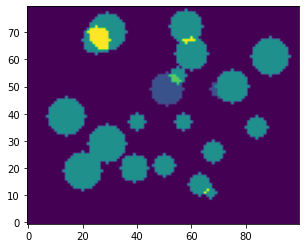

In [578]:
masksum = np.zeros((80, 100))
for i in range(len(mask)-1):
    masksum += np.logical_or(mask[i], mask[i+1]) 
    
plt.imshow(masksum, origin="lower")
plt.show()

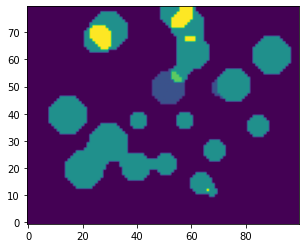

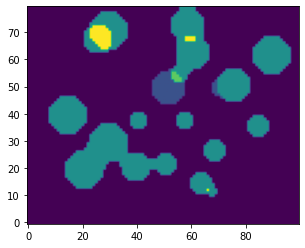

In [579]:
kernel = np.array([[0,1,1,0], [1,1,1,1], [1,1,1,1], [0,1,1,0]], dtype=np.uint8)
dilation = cv.dilate(masksum,kernel,iterations = 1)

plt.imshow(erosion, origin="lower")
plt.show()

kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(dilation,kernel,iterations = 1)




plt.imshow(erosion, origin="lower")
plt.show()


In [577]:
mask.pop(6)
# center

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

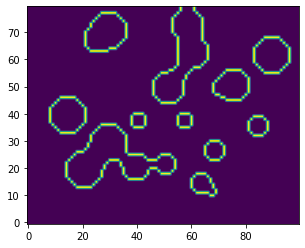

In [580]:
cont_masksum = np.logical_xor(erosion,binary_erosion(erosion))
plt.imshow(cont_masksum, origin="lower")
plt.show()

cont_x, cont_y = [], [] 
mask_x, mask_y = [], [] 
for k in range(y_max):
    for j in range(x_max):
        if erosion[k][j]:
            mask_x.append(j)
            mask_y.append(k)             
        if cont_masksum[k][j]:
            cont_x.append(j)
            cont_y.append(k) 

In [990]:
mappe = [[] for i in range(6)]
mappe[0] = [mask_x, mask_y]
mappe[1] = [cont_x, cont_y]
mappe[2] = [rect_x, rect_y]
mappe[3] = [contrect_x, contrect_y]
mappe[4] = [ushape2mask_x, ushape2mask_y]
mappe[5] = [ushape2_x, ushape2_y]

In [991]:
import pickle
file_name = "mappe.pkl"
open_file = open(file_name, "wb")
pickle.dump(mappe, open_file)
open_file.close()
# file_name = "toyastarlocal.pkl"
# open_file = open(file_name, "rb")
# toyastarlocal = pickle.load(open_file)
# open_file.close()

min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Computational time is 1.2193269729614258
Travel time =  6.4109 hours


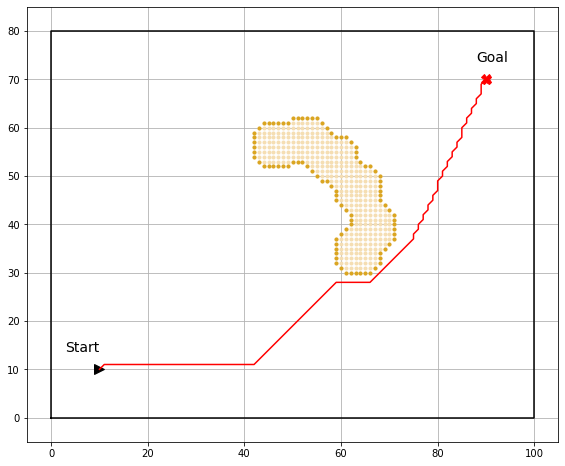

In [1414]:
grid_size = 1
robot_radius = 1

start_time = time.time()
a_star = AStarPlanner(ushape2_x, ushape2_y, grid_size, robot_radius, x_min, y_min, x_max, y_max)
rx, ry = a_star.planning(sx, sy, gx, gy)
print("Computational time is {}".format(time.time() - start_time))
rx = list(reversed(rx))
ry = list(reversed(ry))

path_dist = 0
for r in range(len(rx)-1):
    path_dist += np.hypot(rx[r+1] - rx[r], ry[r+1] - ry[r])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(ushape2mask_x, ushape2mask_y, ".", color="wheat")
plt.plot(ushape2_x, ushape2_y, ".", color="goldenrod")
plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
# ax.legend(prop={"size":20}, loc="lower right")
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

Found path!!
The computational time is 35.2808 seconds
Travel time =  6.1758 hours


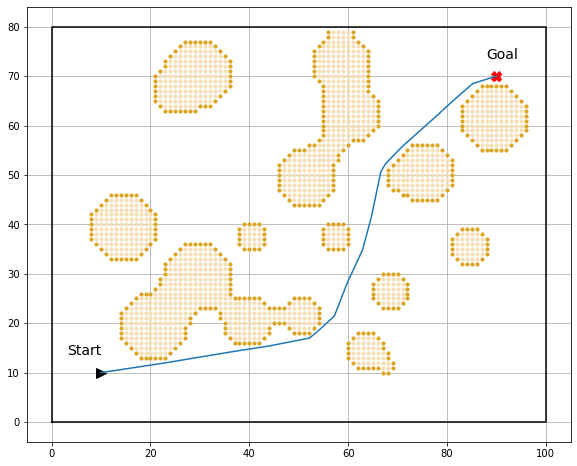

In [1460]:
gy = 70
obstacle_list = [[] for i in range(2)]
for i in range(len(cont_x)): # just not to modify the algorithm of RRT*
    obstacle_list[0].append([cont_x[i], cont_y[i], 1])
    
rrt_star = RRTStar(
            start=[sx, sy],
            goal=[gx, gy],
            rand_area=[x_min, x_max, y_min, y_max],
            play_area=[x_min, x_max, y_min, y_max],
            obstacle_list=obstacle_list,
            k = 1,
            speed = 5,
            path_resolution=1.0,
            connect_circle_dist=70,
            goal_sample_rate=15,
            expand_dis=1)

#%matplotlib
start_time = time.time()
path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
path_star = list(reversed(path_star))
end_time = time.time()
if path_star is None:
    print("Cannot find path")
else:
    print("Found path!!")

print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")

path_dist = 0
for i in range(len(path_star)-1):
    path_dist += np.hypot(path_star[i+1][0] - path_star[i][0], path_star[i+1][1] - path_star[i][1])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
# plt.plot(ushape2mask_x, ushape2mask_y, ".", color="wheat")
# plt.plot(ushape2_x, ushape2_y, ".", color="goldenrod")
# plt.plot(rect_x, rect_y, ".", color="wheat")
# plt.plot(contrect_x, contrect_y, ".", color="goldenrod")
plt.plot(mask_x, mask_y, ".", color="wheat")
plt.plot(cont_x, cont_y, ".", color="goldenrod")
plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [1623]:
# alg_rrt[0] = path_star
alg_rrt[2]

[[10, 10],
 [29.01308005776949, 18.9732893783942],
 [51.47944463085521, 28.743518992692536],
 [64.81969442218379, 27.72350583913724],
 [70.36556467504815, 32.1345463216442],
 [77.77592295956953, 41.7289637425282],
 [84.09269657593916, 56.490789405072206],
 [90, 70],
 [90, 70]]

In [1454]:
grid_size = 0.1
rr = 2
step_size, max_iters, goal_threshold = grid_size, 4000, grid_size
step_size_ = grid_size*3

obs = []
for i in range(len(cont_x)):
    obs.append([cont_x[i], cont_y[i]])

start = (sx, sy)
goal = (gx, gy)

In [1455]:
start_time = time.time()
apf = APF_Improved(start, goal, obs, 1, 0.8, rr, step_size, max_iters, goal_threshold, False)
apf.path_plan()
print("Computational time is {} seconds".format(time.time() - start_time))

KeyboardInterrupt: 

In [ ]:
path = apf.path
path_ = []
i = int(step_size_ / step_size)
while i < len(path):
    path_.append(path[i])
    i += int(step_size_ / step_size)
if path_[-1] != path[-1]:  # 添加最后一个点
    path_.append(path[-1])
# print('planed path points:{}'.format(path_))
if apf.is_path_plan_success:
    print('path plan success')
else:
    print('path plan failed')

sx = 10
sy = 10
x = [sx]
y = [sy]
for i in range(len(path)):
    x.append(path[i][0])
    y.append(path[i][1])
    
path_dist = 0
for i in range(len(x)-1):
    path_dist += np.hypot(x[i+1] - x[i], y[i+1] - y[i])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

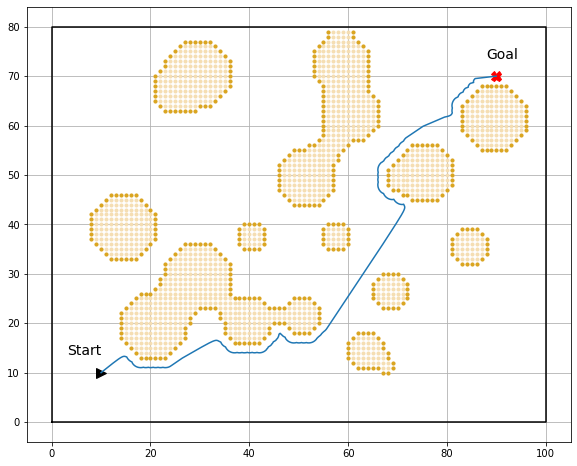

In [987]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0], start[1]+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
plt.plot(mask_x, mask_y, ".", color="wheat")
plt.plot(cont_x, cont_y, ".", color="goldenrod")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot(x,y, "-")
# plt.plot(rx, ry, '-')
ax.set_aspect('equal', adjustable='box')
plt.grid()
# plt.savefig('immapr.png', dpi=500)
plt.show()

## Scenario 2

In [274]:
import skimage

(0, 30)

In [291]:
rect = [np.zeros((80, 100)) for i in range(4)]
start = [(0,30), (65,30), (0,65), (25,65)]
end = [(60,40), (79, 40), (20,75), (79,75)]
for i in range(4):
    rr, cc = skimage.draw.rectangle(start=start[i], end=end[i])
    rect[i][rr, cc] = True
    
rectsum = np.zeros((80, 100))
for i in range(len(rect)-1):
    rectsum += np.logical_or(rect[i], rect[i+1]) 
    
plt.imshow(rectsum, origin="lower")
plt.show()

cont_rectsum = np.logical_xor(rectsum,binary_erosion(rectsum))
plt.imshow(cont_rectsum, origin="lower")
plt.show()

rect_x, rect_y = [], [] 
contrect_x, contrect_y = [], [] 
for k in range(y_max):
    for j in range(x_max):
        if rectsum[k][j]:
            rect_x.append(j)
            rect_y.append(k)             
        if cont_rectsum[k][j]:
            contrect_x.append(j)
            contrect_y.append(k) 

min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Computational time is 2.254838228225708
Travel time =  9.0474 hours


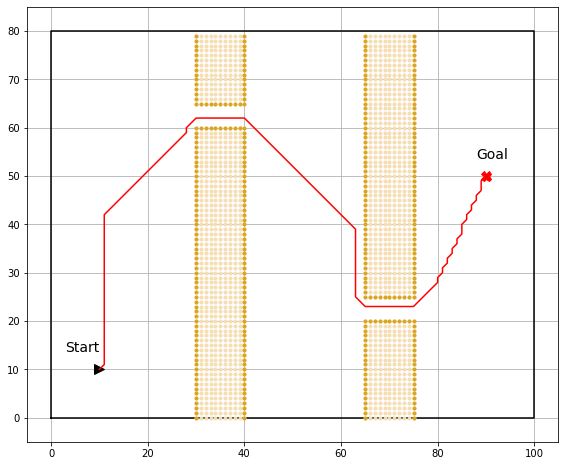

In [1420]:
grid_size = 1
robot_radius = 1
gy = 50
start_time = time.time()
a_star = AStarPlanner(contrect_x, contrect_y, grid_size, robot_radius, x_min, y_min, x_max, y_max)
rx, ry = a_star.planning(sx, sy, gx, gy)
print("Computational time is {}".format(time.time() - start_time))
rx = list(reversed(rx))
ry = list(reversed(ry))

path_dist = 0
for r in range(len(rx)-1):
    path_dist += np.hypot(rx[r+1] - rx[r], ry[r+1] - ry[r])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(rect_x, rect_y, ".", color="wheat")
plt.plot(contrect_x, contrect_y, ".", color="goldenrod")
plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
# ax.legend(prop={"size":20}, loc="lower right")
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

Found path!!
The computational time is 24.2433 seconds
Travel time =  10.886 hours


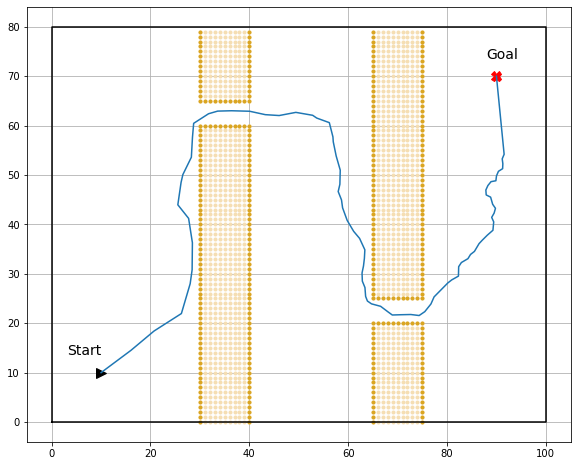

In [673]:
obstacle_list = [[] for i in range(2)]
for i in range(len(contrect_x)): # just not to modify the algorithm of RRT*
    obstacle_list[0].append([contrect_x[i], contrect_y[i], 1])
    
rrt_star = RRTStar(
            start=[sx, sy],
            goal=[gx, gy],
            rand_area=[x_min, x_max, y_min, y_max],
            play_area=[x_min, x_max, y_min, y_max],
            obstacle_list=obstacle_list,
            k = 1,
            speed = 5,
            path_resolution=1.0,
            connect_circle_dist=20,
            goal_sample_rate=15,
            expand_dis=1)

#%matplotlib
start_time = time.time()
path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
path_star = list(reversed(path_star))
end_time = time.time()
if path_star is None:
    print("Cannot find path")
else:
    print("Found path!!")

print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")

path_dist = 0
for i in range(len(path_star)-1):
    path_dist += np.hypot(path_star[i+1][0] - path_star[i][0], path_star[i+1][1] - path_star[i][1])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
plt.plot(rect_x, rect_y, ".", color="wheat")
plt.plot(contrect_x, contrect_y, ".", color="goldenrod")
plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [824]:
grid_size = 0.1
rr = 2
step_size, max_iters, goal_threshold = grid_size, 5000, grid_size
step_size_ = grid_size*3

gx = 90
gy = 50
obs = []
for i in range(len(contrect_x)):
    obs.append([contrect_x[i], contrect_y[i]])

start = (sx, sy)
goal = (gx, gy)

start_time = time.time()
apf = APF_Improved(start, goal, obs, 1, 0.8, rr, step_size, max_iters, goal_threshold, False)
apf.path_plan()
print("Computational time is {} seconds".format(time.time() - start_time))

Computational time is 38.76033544540405 seconds


path plan success
Travel time =  9.9111 hours


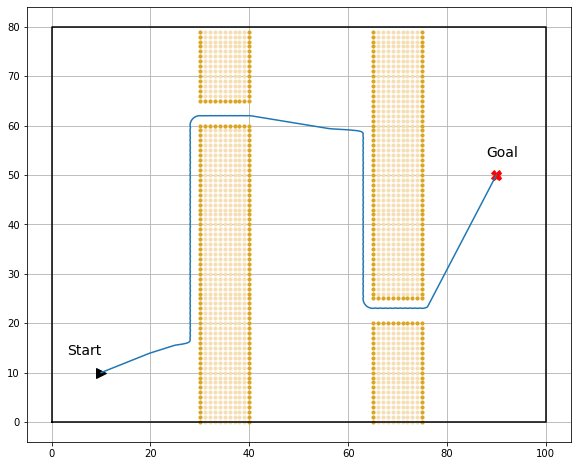

In [825]:
path = apf.path
path_ = []
i = int(step_size_ / step_size)
while i < len(path):
    path_.append(path[i])
    i += int(step_size_ / step_size)
if path_[-1] != path[-1]:  # 添加最后一个点
    path_.append(path[-1])
# print('planed path points:{}'.format(path_))
if apf.is_path_plan_success:
    print('path plan success')
else:
    print('path plan failed')

sx = 10
sy = 10
x = [sx]
y = [sy]
for i in range(len(path)):
    x.append(path[i][0])
    y.append(path[i][1])
    
path_dist = 0
for i in range(len(x)-1):
    path_dist += np.hypot(x[i+1] - x[i], y[i+1] - y[i])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0], start[1]+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
plt.plot(rect_x, rect_y, ".", color="wheat")
plt.plot(contrect_x, contrect_y, ".", color="goldenrod")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(x,y, "-")
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.savefig('apf2.png', dpi=300)
plt.show()

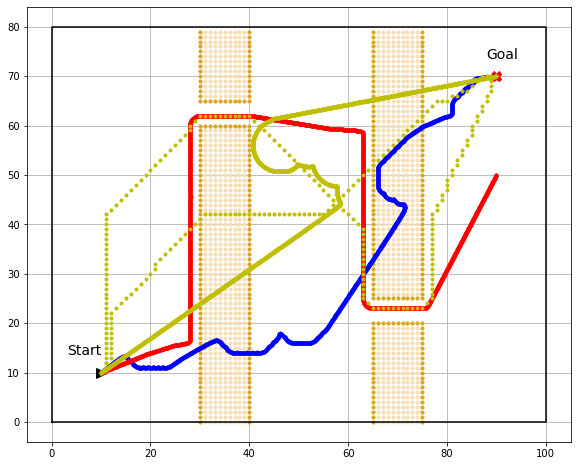

In [1418]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0], start[1]+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
plt.plot(rect_x, rect_y, ".", color="wheat")
plt.plot(contrect_x, contrect_y, ".", color="goldenrod")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
for i in range(len(alg_apf[0][0])):
    plt.plot(alg_apf[0][0][i],alg_apf[0][1][i], ".b")

for i in range(len(alg_apf[1][0])):
    plt.plot(alg_apf[1][0][i],alg_apf[1][1][i], ".r")
    
for i in range(len(alg_apf[2][0])):
    plt.plot(alg_apf[2][0][i],alg_apf[2][1][i], ".y")
    
# for i in range(len(alg_ast[2][0])):
#     plt.plot(alg_ast[2][0][i],alg_ast[2][1][i], ".y")
    
for i in range(len(alg_ast[1][0])):
    plt.plot(alg_ast[1][0][i],alg_ast[1][1][i], ".y")

for i in range(len(alg_ast[0][0])):
    plt.plot(alg_ast[0][0][i],alg_ast[0][1][i], ".y")
ax.set_aspect('equal', adjustable='box')
plt.grid()
# plt.savefig('apf2.png', dpi=300)
plt.show()

In [826]:
alg_apf = [[] for i in range(3)]

In [1407]:
alg_apf[2] = [x, y]

## Scenario3

In [471]:
ushapemask = [np.zeros((80, 100)) for i in range(3)]
# start = [(0,30), (65,30), (0,65), (25,65)]
# end = [(60,40), (79, 40), (20,75), (79,75)]
# for i in range(2):
rr, cc = skimage.draw.ellipse(40, 50,20,25, rotation=np.deg2rad(45))
ushapemask[0][rr, cc] = True

rr, cc = skimage.draw.ellipse(40, 50,12.5,17.5, rotation=np.deg2rad(45))
ushapemask[1][rr, cc] = True

r = np.array([15, 65, 15])
c = np.array([25, 25, 75])
rr, cc = skimage.draw.polygon(r, c)

ushapemask[2][rr, cc] = True

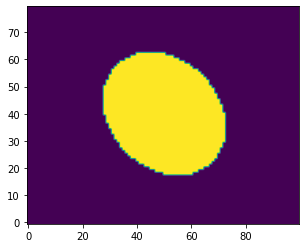

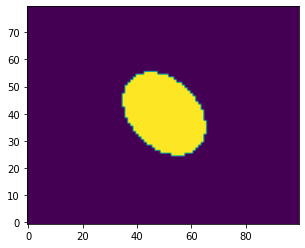

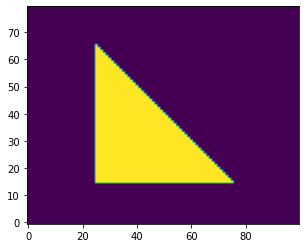

In [472]:
plt.imshow(ushapemask[0], origin="lower")
plt.show()

plt.imshow(ushapemask[1], origin="lower")
plt.show()

plt.imshow(ushapemask[2], origin="lower")
plt.show()

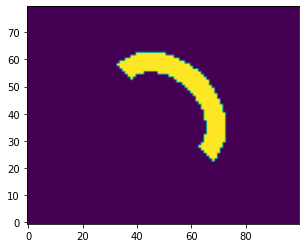

In [473]:
ushapesum = np.zeros((80, 100))
for i in range(1):
    ushapesum += np.logical_xor(ushapemask[i], ushapemask[i+1]) 

ushapefinale = np.logical_and(ushapesum, np.logical_not(ushapemask[2])) 
plt.imshow(ushapefinale, origin="lower")
plt.show()

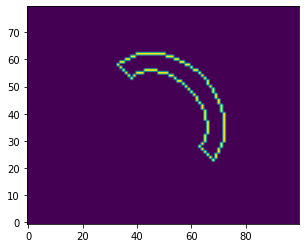

In [474]:
cont_ushape = np.logical_xor(ushapefinale,binary_erosion(ushapefinale))
plt.imshow(cont_ushape, origin="lower")
plt.show()

ushape_x, ushape_y = [], [] 
contushape_x, contushape_y = [], [] 
for k in range(y_max):
    for j in range(x_max):
        if ushapefinale[k][j]:
            ushape_x.append(j)
            ushape_y.append(k)             
        if cont_ushape[k][j]:
            contushape_x.append(j)
            contushape_y.append(k) 

No handles with labels found to put in legend.


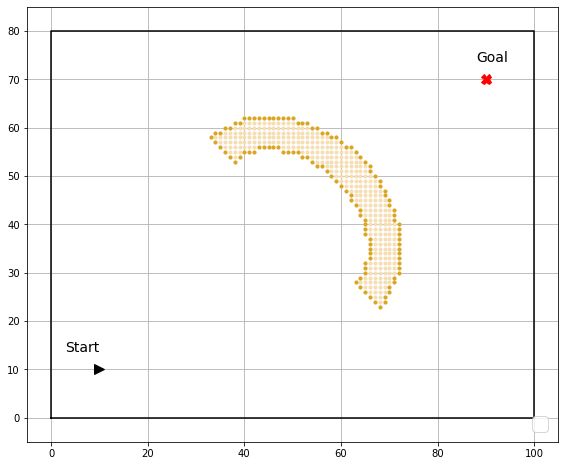

In [488]:
sx, sy = 10, 10
gx, gy = 90, 70
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(ushape_x, ushape_y, ".", color="wheat")
plt.plot(contushape_x, contushape_y, ".", color="goldenrod")

ax.set_aspect('equal', adjustable='box')
ax.legend(prop={"size":20}, loc="lower right")
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.savefig("scenario3alg.png", dpi=300)
plt.show()

min_x: 0
min_y: 0
max_x: 100
max_y: 80
x_width: 100
y_width: 80
Find goal
Computational time is 1.3260021209716797
Travel time =  6.7038 hours


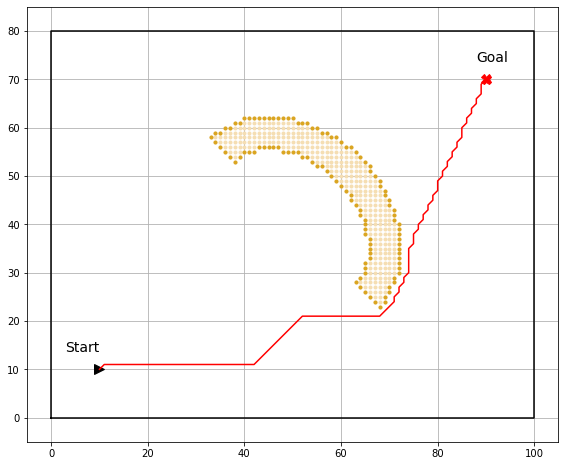

In [683]:
grid_size = 1
robot_radius = 1

start_time = time.time()
a_star = AStarPlanner(contushape_x, contushape_y, grid_size, robot_radius, x_min, y_min, x_max, y_max)
rx, ry = a_star.planning(sx, sy, gx, gy)
print("Computational time is {}".format(time.time() - start_time))
rx = list(reversed(rx))
ry = list(reversed(ry))

path_dist = 0
for r in range(len(rx)-1):
    path_dist += np.hypot(rx[r+1] - rx[r], ry[r+1] - ry[r])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(ushape_x, ushape_y, ".", color="wheat")
plt.plot(contushape_x, contushape_y, ".", color="goldenrod")
plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
# ax.legend(prop={"size":20}, loc="lower right")
plt.grid()
plt.xlim(-5, 105)
plt.ylim(-5, 85)
plt.show()

Found path!!
The computational time is 67.6973 seconds
Travel time =  7.1451 hours


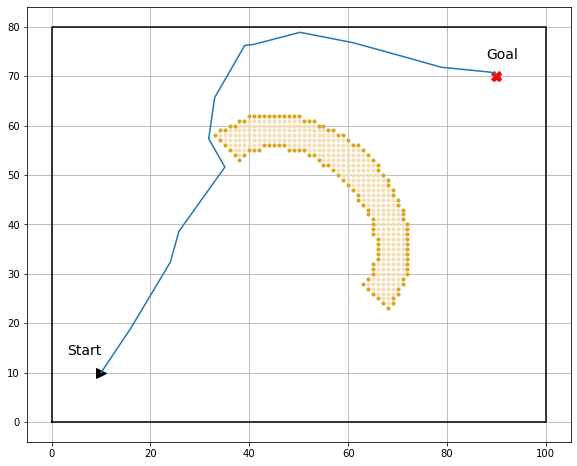

In [680]:
obstacle_list = [[] for i in range(2)]
for i in range(len(contushape_x)): # just not to modify the algorithm of RRT*
    obstacle_list[0].append([contushape_x[i], contushape_y[i], 1])
    
rrt_star = RRTStar(
            start=[sx, sy],
            goal=[gx, gy],
            rand_area=[x_min, x_max, y_min, y_max],
            play_area=[x_min, x_max, y_min, y_max],
            obstacle_list=obstacle_list,
            k = 1,
            speed = 5,
            path_resolution=1.0,
            connect_circle_dist=100,
            goal_sample_rate=15,
            expand_dis=1)

#%matplotlib
start_time = time.time()
path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
path_star = list(reversed(path_star))
end_time = time.time()
if path_star is None:
    print("Cannot find path")
else:
    print("Found path!!")

print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")

path_dist = 0
for i in range(len(path_star)-1):
    path_dist += np.hypot(path_star[i+1][0] - path_star[i][0], path_star[i+1][1] - path_star[i][1])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.text(sx, sy+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(gx-2, gy+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
plt.plot(ushape_x, ushape_y, ".", color="wheat")
plt.plot(contushape_x, contushape_y, ".", color="goldenrod")
plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [729]:
grid_size = 0.5
rr = 8
step_size, max_iters, goal_threshold = grid_size, 5000, grid_size
step_size_ = grid_size*3

obs = []
for i in range(len(contushape_x)):
    obs.append([contushape_x[i], contushape_y[i]])

start = (sx, sy)
goal = (gx, gy)

start_time = time.time()
apf = APF_Improved(start, goal, obs, 0.000001, 0.8, rr, step_size, max_iters, goal_threshold, False)
apf.path_plan()
print("Computational time is {} seconds".format(time.time() - start_time))

Computational time is 38.210654973983765 seconds


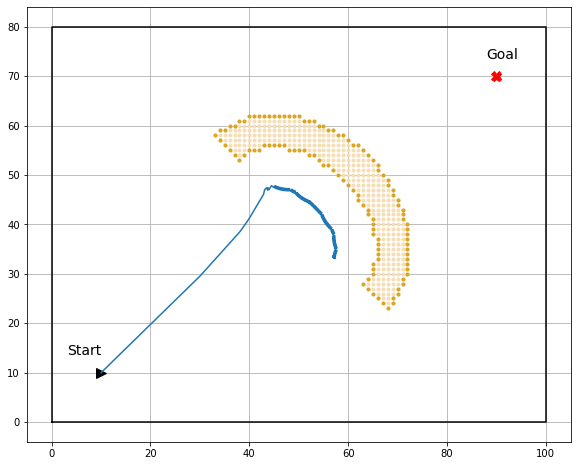

In [731]:
path = apf.path
path_ = []
i = int(step_size_ / step_size)
while i < len(path):
    path_.append(path[i])
    i += int(step_size_ / step_size)
if path_[-1] != path[-1]:  # 添加最后一个点
    path_.append(path[-1])
# print('planed path points:{}'.format(path_))
if apf.is_path_plan_success:
    print('path plan success')
else:
    print('path plan failed')

sx = 10
sy = 10
x = [sx]
y = [sy]
for i in range(len(path)):
    x.append(path[i][0])
    y.append(path[i][1])
    
path_dist = 0
for i in range(len(x)-1):
    path_dist += np.hypot(x[i+1] - x[i], y[i+1] - y[i])
print("Travel time = ", str(round(path_dist/18,4)), "hours")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0], start[1]+3,'Start',fontsize=14,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=14,
                    ha='left',va='bottom',color='k')
plt.plot(ushape_x, ushape_y, ".", color="wheat")
plt.plot(contushape_x, contushape_y, ".", color="goldenrod")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(x,y, "-")
ax.set_aspect('equal', adjustable='box')
plt.grid()
# plt.savefig('immapr.png', dpi=500)
plt.show()

In [681]:
alg_rrt = [[] for i in range(3)]
alg_ast = [[] for i in range(3)]
alg_apf = [[] for i in range(3)]

In [1421]:
alg_ast[1] = [rx, ry]

In [1624]:
import pickle
file_name = "alg_rrt.pkl"
open_file = open(file_name, "wb")
pickle.dump(alg_rrt, open_file)
open_file.close()
# file_name = "toyastarlocal.pkl"
# open_file = open(file_name, "rb")
# toyastarlocal = pickle.load(open_file)
# open_file.close()

### plot finali

In [1471]:
alg_rrt[0][0]

[10, 10]

In [1891]:
k = 2
xrrt = []
yrrt = []
xrrt.extend([i[0] for i in alg_rrt[k]]) 
yrrt.extend([i[1] for i in alg_rrt[k]]) 

xapf = []
yapf = []
xapf.extend([i for i in alg_apf[k][0]]) 
yapf.extend([i for i in alg_apf[k][1]]) 
xast = []
yast = []
xast.extend([i for i in alg_ast[k][0]]) 
yast.extend([i for i in alg_ast[k][1]])

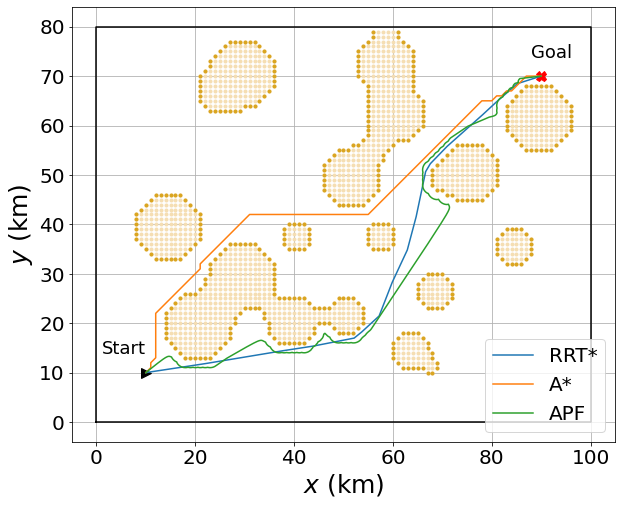

In [1887]:
goal = (90,70)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0], start[1]+3,'Start',fontsize=18,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=18,
                    ha='left',va='bottom',color='k')
plt.plot(mask_x, mask_y, ".", color="wheat")
plt.plot(cont_x, cont_y, ".", color="goldenrod")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(xrrt, yrrt, "-", label='RRT*')
plt.plot(xast, yast, '-', label='A*')
plt.plot(xapf, yapf, '-', label='APF')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("$x$ (km)", fontsize=25)
ax.set_ylabel("$y$ (km)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(prop={"size":20}, loc="lower right")
plt.grid()
plt.savefig('toyalg1.png', dpi=300, bbox_inches='tight')
plt.show()

## Scenario 2

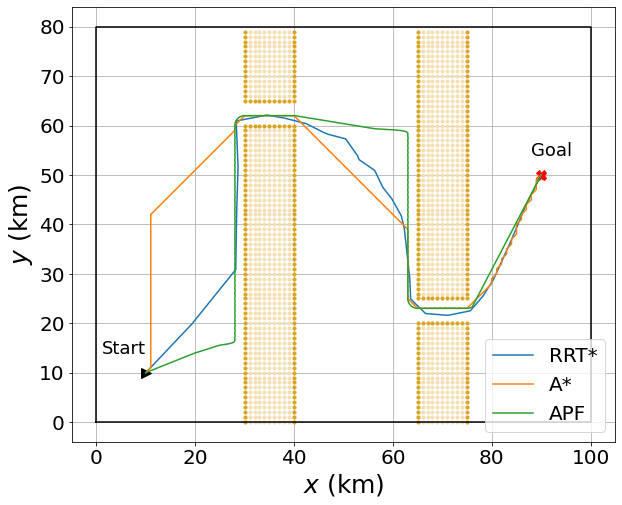

In [1890]:
goal = (90,50)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0], start[1]+3,'Start',fontsize=18,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=18,
                    ha='left',va='bottom',color='k')
plt.plot(rect_x, rect_y, ".", color="wheat")
plt.plot(contrect_x, contrect_y, ".", color="goldenrod")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(xrrt, yrrt, "-", label='RRT*')
plt.plot(xast, yast, '-', label='A*')
plt.plot(xapf, yapf, '-', label='APF')
ax.set_aspect('equal', adjustable='box')
ax.legend(prop={"size":20}, loc="lower right")
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("$x$ (km)", fontsize=25)
ax.set_ylabel("$y$ (km)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.savefig('toyalg2.png', dpi=300, bbox_inches='tight')
plt.show()

## Scenario 3

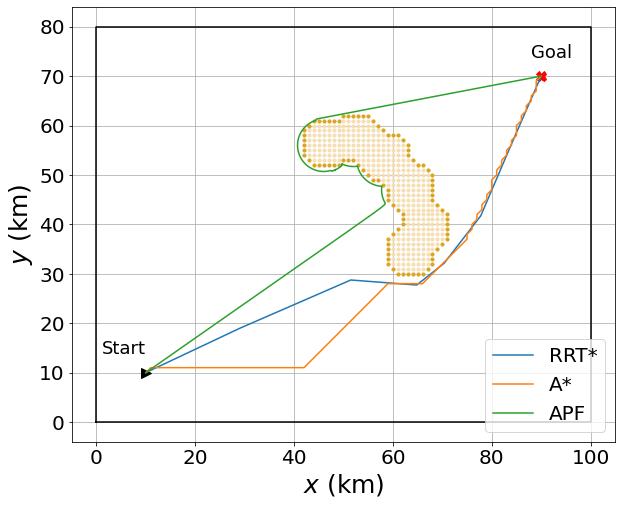

In [1893]:
goal = (90,70)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(start[0], start[1], ">k", markersize=10)
plt.plot(goal[0], goal[1], "Xr", markersize=10)
plt.text(start[0], start[1]+3,'Start',fontsize=18,
                    ha='right',va='bottom',color='k')
plt.text(goal[0]-2, goal[1]+3,'Goal',fontsize=18,
                    ha='left',va='bottom',color='k')
plt.plot(ushape2mask_x, ushape2mask_y, ".", color="wheat")
plt.plot(ushape2_x, ushape2_y, ".", color="goldenrod")
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(xrrt, yrrt, "-", label='RRT*')
plt.plot(xast, yast, '-', label='A*')
plt.plot(xapf, yapf, '-', label='APF')
ax.set_aspect('equal', adjustable='box')
ax.legend(prop={"size":20}, loc="lower right")
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("$x$ (km)", fontsize=25)
ax.set_ylabel("$y$ (km)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.savefig('toyalg3.png', dpi=300, bbox_inches='tight')
plt.show()

In [1790]:
obstacle_list

[[[33, 13, 5],
  [19, 10, 10],
  [93, 63, 9],
  [3, 64, 8],
  [33, 46, 10],
  [46, 70, 5],
  [45, 44, 10],
  [61, 12, 2],
  [27, 39, 10],
  [41, 19, 9]],
 []]

In [1900]:

    
rrt_star = RRTStar(
            start=[sx, sy],
            goal=[gx, gy],
            rand_area=[x_min, x_max, y_min, y_max],
            play_area=[x_min, x_max, y_min, y_max],
            obstacle_list=obstacle_list,
            k = 1,
            speed = 5,
            path_resolution=1.0,
            connect_circle_dist=150,
            goal_sample_rate=15,
            expand_dis=1)

#%matplotlib
start_time = time.time()
path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
path_star = list(reversed(path_star))
end_time = time.time()
if path_star is None:
    print("Cannot find path")
else:
    print("Found path!!")

print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")

path_dist = 0
for i in range(len(path_star)-1):
    path_dist += np.hypot(path_star[i+1][0] - path_star[i][0], path_star[i+1][1] - path_star[i][1])
print("Travel time = ", str(round(path_dist/18,4)), "hours")



Found path!!
The computational time is 7.5152 seconds
Travel time =  5.7625 hours


In [1808]:
obstacle_list = [[] for i in range(2)]
for i in range(5): # just not to modify the algorithm of RRT*
    obstacle_list[0].append([random.randint(x_min+10,x_max-20), random.randint(y_min+10,y_max-15), random.randint(5,6)])

In [1861]:
obstacle_list[0][-2] = [65,45,6]
# obstacle_list[0][-1] = [65,60,6]


In [1860]:
print(obstacle_list[0])

[[77, 55, 5], [40, 30, 5], [60, 30, 5], [45, 49, 6], [65, 60, 6], [70, 40, 5], [50, 37, 5]]


In [1834]:
obstacle_list[0].append([50,30,6])


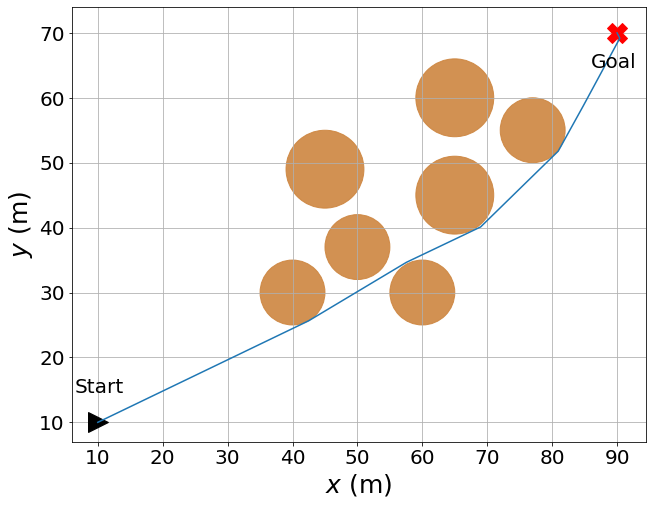

In [1901]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(sx, sy, ">k", markersize=20)
plt.plot(gx, gy, "Xr", markersize=20)
plt.text(sx+4, sy+4,'Start',fontsize=20,
                    ha='right',va='bottom',color='k')
plt.text(gx-4, gy-6,'Goal',fontsize=20,
                    ha='left',va='bottom',color='k')
for i in range(len(obstacle_list[0])):
    ax.add_patch(plt.Circle(xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=obstacle_list[0][i][2], color='peru', alpha=0.9))
plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-',label='RRT*')
# plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.plot(rx, ry, '-r')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("$x$ (m)", fontsize=25)
ax.set_ylabel("$y$ (m)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(7,74)
plt.grid()
# plt.savefig("rrtexam1.png", dpi=300, bbox_inches='tight')
plt.show()